## Week 3: Simple 2-mode Network 

Mael Illien, Jeremy O'Brien, Vanita Thompson

### Assignment:

The [Davis Southern Club women](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis) is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events.

DATASET: [DAVIS](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/davis.dat)

DESCRIPTION: One 18×14 matrix, binary.

BACKGROUND: These data were collected by Davis et al in the 1930s. They represent observed attendance at 14 social events by 18 Southern women. The result is a person-by-event matrix: cell (i,j) is 1 if person i attended social event j, and 0 otherwise.

What can you infer about the relationships between (1) the women, and (2) the social events?

### Load Libraries

In [1]:
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import numpy as np
from scipy import stats
from pylab import rcParams
import math
from IPython.display import display, HTML
%matplotlib inline

## Data Import and Exploration

The Davis Southern Club Women data set was collected by Davis et al. This data set is also included with the NetworkX package and comes as a bipartite graph (clubs, women) with event attendance data.

In [2]:
#loading data from the networkx package
G = nx.davis_southern_women_graph()

Previewing some details, starting with nodes and edges.

In [3]:
G.nodes()

NodeView(('Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14'))

There are 2 modes: women and events. The edges represent women's attendance to a given event.

In [5]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625


There are 32 total nodes.  As this is a 2-mode network, these nodes represent both the number of women plus the number of events.

There are 89 total edges.  These edges represent the total number of attendees at each event. 

The average degree of the 2-mode network is 5.5625, which is a mix of average events attended by women and average number of women at events.

### Visualization

We visualize the 2-mode network using a nodelist to distinguish between women and events.

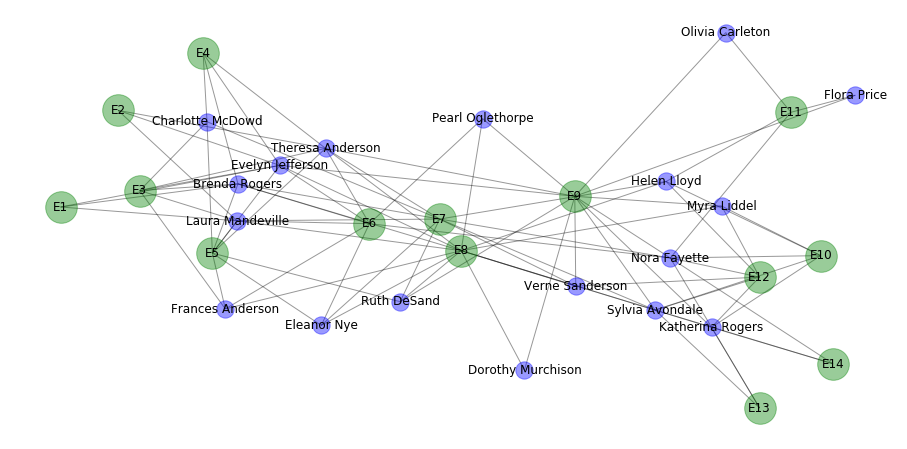

In [24]:
women, events = nx.bipartite.sets(G)
plt.rcParams["figure.figsize"] = (16,8)
plt.axis('off')
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=women, node_color='blue', alpha = 0.4)
nx.draw_networkx_nodes(G, pos, nodelist=events, node_color='green', alpha = 0.4, node_size = 1000)
nx.draw_networkx_edges(G, pos, alpha = 0.4)
nx.draw_networkx_labels(G, pos);

Charting the fourteen events and eighteen women reveals some contours of the graph.  

No event was attended by all women; events E7, E8, and E9 had the most participants.  

Of the women, Evelynn Jefferson, Theresa Anderson, and Nora Fayette attended the most events.  We'll subtantiate this with distance measures below.

There appear to be at least two distinct cliques, each with four events attended almost only by those cliques. Additionally, there are a handful of events attended by women from both cliques, and there are women who do not appear to belong to either of these cliques.  If a woman attended an event with another, we could simply regard them as 'friends'.

In [43]:
print('center =', nx.center(G))
print('diameter =', nx.diameter(G))
print('radius =', nx.radius(G))

center = ['Evelyn Jefferson', 'Theresa Anderson', 'Ruth DeSand', 'Verne Sanderson', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'E6', 'E7', 'E8', 'E9']
diameter = 4
radius = 3


In [44]:
# Extract DegreeView of just the top nodes (women)
G_top_nodes, G_bottom_nodes = bipartite.sets(G)
display(HTML(pd.DataFrame(G.degree(G_top_nodes), columns=["Woman", "Degree"]).sort_values(by=["Degree"], ascending=False).to_html(index=False)))

Woman,Degree
Evelyn Jefferson,8
Theresa Anderson,8
Nora Fayette,8
Sylvia Avondale,7
Laura Mandeville,7
Brenda Rogers,7
Katherina Rogers,6
Helen Lloyd,5
Charlotte McDowd,4
Eleanor Nye,4


In the above analysis, degree represents the number of events a woman attended.   

## Data Analysis - Unipartite Representation

### Women Network

We use the unipartite representation to transform a 2-node network into a 1-node network, where edges are weighted by the number of events women attended in common.  Those who attend events together we can simply regard as "Friends."

In [59]:
# Project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
# Summary statics for women-only node network
print(nx.info(W))

Name: 
Type: Graph
Number of nodes: 18
Number of edges: 139
Average degree:  15.4444


With these edge weights, we can analyze the women nodes on the basis of their friend counts.

In [60]:
print("#Friends, Member")
for w in sorted([(W.degree(w),w) for w in women], reverse=True):
    print('%d %s' % (w))

#Friends, Member
17 Verne Sanderson
17 Theresa Anderson
17 Sylvia Avondale
17 Ruth DeSand
17 Nora Fayette
17 Helen Lloyd
17 Evelyn Jefferson
16 Pearl Oglethorpe
16 Myra Liddel
16 Katherina Rogers
16 Dorothy Murchison
15 Laura Mandeville
15 Frances Anderson
15 Eleanor Nye
15 Brenda Rogers
12 Olivia Carleton
12 Flora Price
11 Charlotte McDowd


Evenlynn Jefferson, Theresa Anderson, and Nora Fayette are again at the top of the list in terms of "friends," with 17 each. 

Charlotte McDowd has only 11 "friends," which corresponds with our 2-mode visualization above.

To analyze this further, we can visualize not only how many connections each woman node has, but with which other nodes those connections are found.

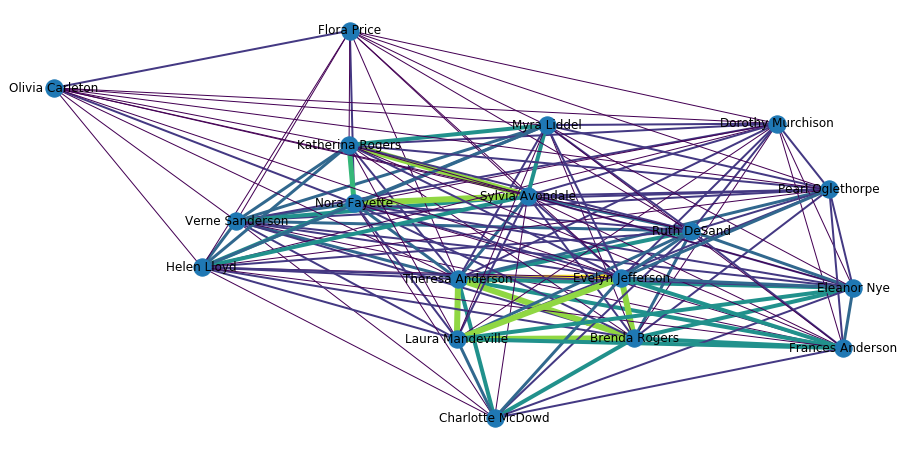

In [61]:
# Visualize the unipartite graph to identify relationships between women.
W = bipartite.weighted_projected_graph(G, women,ratio=False)
weights = [edata['weight'] for f,t,edata in W.edges(data=True)]
plt.rcParams["figure.figsize"] = (16,8)
nx.draw_networkx(W, k=0.1,iterations=20, width=weights, edge_color=weights)
plt.axis('off')
plt.show()

From the graph above, it appears that there are two groups of women with particularly strong relationships: 
- Theresa Anderson, Brenda Rogers, Laura Mandeville and Evelyn Jefferson
- Nora Fayette, Sylvia Avondale and Katherina Rogers

In fact, these women form cliques as shown below.

In [62]:
# A function to trim weak connections from the graph
def trim_edges(g, weight=1): 
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True): 
        if edata['weight'] > weight:
            g2.add_edge(f,to,**edata)
    return g2

The returned cliques below correspond to the what was identified visually in the graph above.

In [79]:
trimmed = trim_edges(W,4)
cliques = list(nx.find_cliques(trimmed))
for i in range(len(cliques)):
    print('Clique', i+1, ':', cliques[i-1])

Clique 1 : ['Theresa Anderson', 'Laura Mandeville', 'Brenda Rogers', 'Evelyn Jefferson']
Clique 2 : ['Sylvia Avondale', 'Katherina Rogers', 'Nora Fayette']


### Social Events Network

We repeat the steps to isolate the unipartite events network.

In [87]:
E = bipartite.weighted_projected_graph(G, events,ratio=False)
print(nx.info(E))

Name: 
Type: Graph
Number of nodes: 14
Number of edges: 66
Average degree:   9.4286


In [88]:
weights = [edata['weight'] for f,t,edata in E.edges(data=True)]
plt.rcParams["figure.figsize"] = (16,8)
nx.draw_networkx(E, width=weights, edge_color=weights)
plt.axis('off')

# JO: this image is no longer rendering, not sure what the error is
plt.show()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA4sAAAHBCAYAAADATy5AAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nOydeZhbZdn/P+cks7SdbpS2lIId9j2UXSCCgPENFlkMAZSlwquAiggySKtRf69GKhgQERQQECgqEAfZKoGwG9mXNmwtLe1035fp7EvO+f3xnDSZJNNJMpkkM3N/rivXJGd9MpM5Od/nvu/vrZmmiSAIgiAIgiAIgiAko5d6AIIgCIIgCIIgCEL5IWJREARBEARBEARBSEPEoiAIgiAIgiAIgpCGiEVBEARBEARBEAQhDRGLgiAIgiAIgiAIQhoiFgVBEARBEARBEIQ0RCwKgiAIgiAIgiAIaYhYFARBEARBEARBENIQsSgIgiAIgiAIgiCkIWJREARBEARBEARBSEPEoiAIgiAIgiAIgpCGiEVBEARBEARBEAQhDRGLgiAIgiAIgiAIQhoiFgVBEARBEARBEIQ0RCwKgiAIgiAIgiAIaYhYFARBEARBEARBENIQsSgIgiAIgiAIgiCkIWJREARBEARBEARBSEPEoiAIgiAIgiAIgpCGiEVBEARBEARBEAQhDRGLgiAIgiAIgiAIQhr2Ug9AEAQhF2pnz5sEzAQcwDhgGxAFHmiYM2NjKccmCIIgCIIwlNBM0yz1GARBEPqkdva8Y4DZwOmACYxIWt0GaMCzwJyGOTPeKf4IBUEQBEEQhhYiFgVBKHtqZ8+7ErgFqGbn6fMG0A5c1zBnxl3FGJsgCIIgCMJQRcSiIAhlh6ZpDcBkIIZus2u2iqqaw05jzAnnsyV0B53rlhBr3sLUK+/DPm7yjv1aPv0PTe8+Sef6pegjxy7ubtywf6negyAIgiAIwmBHahYFQShXvj5t1jONwCvxBbGWrYzY+yjGHu9l3dzr03bQR4xm9NFn0bV5Fe3L5+9TO3ve0Q1zZrxbxDELgiAIgiAMGcQNVRCEcmY2KvUUANuo8Yw+cgaVUzIHDEfUTmfUQV/CNnoXQNOt/QVBEARBEIQ8ELEoCEJZUjF573EoM5v+XKe+Vjt73sQCDUkQBEEQBGFYIWmogiCUJV0bl/9txe/Pq1QmpzD+lEsZPd2d62FMVJuNQIGHJwiCIAiCMOQRsSgIQlky4Ws/eq3m0FO/0s/DjKjY3DjDpXs/ALYDTdZjO9ASNoJGf8cpCIIgCIIwVBGxKAhCWaLZ7DWFOE5Fc+uxVNj/RMwwMAwbMNp6jHDp3lZ6isgm0kVlNs+bw0awuxDjFQRBEARBKBdELAqCUJaYse7mjMu7OzENw9qmC7O7E81eqV4bMYg/TBOzuxObxkjbAfvEHXFM4DPgNdMwF9DZ+Zm5tXGZuXlrK0pAjiEhJpOfT+llefx5jUv3dpC/2OwhVsNGsLPfv0BBEARBEIR+In0WBUEoOzRNa0Cz7aHZK2zxZdW105nk8bH8t2ekbT9t1jMANEdfYPO/b+uxbpc9jzWOGedahJoc24vMk2QbgQXA/KSfi0JRf1c243XpXg0YSe9iM5vnya8NCiQ8gfawEZQLvSAIgiAIOSNiURCEssGlew8Avgtc0jV65KcNV557PLpekfcBDYO9XptPVUtHfMnHwPPACqAWmG49xmbYu8PaPllALghF/Y15jycLLOFZRe4Cs7fndvonNlPrPOVLQxAEQRCGCSIWBUEoKS7dWw2cA1wBHAT8Fbg3bASX1M6e9zhwFvm0zzBNqpub2HXNKsPe3PVB1frWWs1kgrXWAJ4DHgKeBCahROPhJATkXr0cuYGeAnI+sDwU9ZflxdSleyvpXVzmGgGtBlrIX2ym1nnGBvK9C4IgCILQP0QsCoJQEly690CsKCJKcN0NPJVcr1c7e94xwCuoFM+c0AyDiSuXU9nRrhYYZkPFto77qza3HwGcAcQjlo3AY8CDwOtx0ed2+MYCDnoKyENRUb9UGlHiMTmV9eNQ1N+e67jLGZfutQM15C82k5+PAtopjPBsChvBrFKGBUEQBEHIHhGLgiAUDSuK6AEuBw4gEUX8vLd9amfPuxK4hdwEY6u9o/2m3ZYvOxU4ucca0/xr5Zb2Gyu3dLhRPRiPTlr7OSra+FAo6m9IPajb4bNb404WkNOBiRnGEAM+JaUWMhT1b8zhfQxZXLpXp7B1nt30Q2ymPO+QdFtBEARBELEoCEIRcOneg1FRxIuB94B7gKezdf1MEozV7Cwl1TRNNK0NuK5hzoy7nJ6ADvwv8DuS6xINcwu69gPg0ZrF2w5CRTcvBnZPOtqrKOEYDEX9Tb2d0u3wacBu9BSQh6NEpZZhlzX0TGFdACwJRf2SkpknVp1nNf0Tm8nPdQrTUqUJaBXhKQiCIAxWRCwKgjAguHTvCOBcVBRxX+B+4L6wEVyaz/FqZ887GpgNfA3VAmPEjpWG0amZVI7Yun1T667jTm+YM+Pd5H2dnsAU4HZrPCTtF0LXr4jU161wO3w24DSUcPxG0vHbgMdRaaovZSvq3A7fSFTaarKAPByVfplKK/AhPQXkh6GoP2P7EGFgceneKgpX51kFNNM/Z9v48+awETQG8r0LgiAIQjIiFgVBKCgu3XsISiBeCLyDiiI+U6iastrZ8yai0kcdFZsbp9ubWys7dp84d+9XPpht7+weBRwQivo/y7Sv0xM4C7gTmLpjoWG2o3EDmnZnpL4uBuB2+MaghOVM4KSkQ6wGHgYeDEX9n+Y6drfDpwN701NATgf2yLC5CSyhp4CcD6wpVzMdIR2rznM0+YvN5OcjUZMXhWip0hQ2gt0D+d4FQRCEwY+IRUEQ+o1L944EvCiRuBdwHyqK2DDA5z0XuCBsBM91O3z3AZcBN4Wi/lm97eP0BMYAc4Dv91jRHVuA3XZxpL7uw+TFbodvL1SK6kyU0IvzDipN9R+hqH9zf96H2+GbQEI4xn8eTOaekJtJd2NdmG1PSGHwYtV5jqJwdZ6dFKalSlPYCO7oTyMIgiAMHUQsCoKQNy7dexiqFvFC4E1UFHFesSIWLt17MvDrsBE8ye3wHQ+8DqwH9uxLPDk9gROBv6DadShM08Awb8am/1+kvq6Hk6lVm3giKk31fNQNN0AX8AwqTfXZUNSfVR1mX7gdviprbMkC8nBgfIbNO1E9IXvUQoai/m2FGIsw9LDqPEdQuDpPKJDwBNqkzlMQBKE8ELEoCEJOWFHE81BRxGkkoojLSzCWg4B/hY3ggZaY+wgVkTsnFPU/0df+Tk+gCpgF/IxEKw3ojq3CbrsoUl/3aqb93A7fCFT/x5nAV0mY7mwC/oESju8XOl3Ueo97ki4g9+lll+Wkm+kskzRWodBYdZ65CszenleQnblQNqK0Reo8BUEQ8kfEoiAIWeHSvQ6UQPwm8AYqivjvUtY9uXTvBGBx2AjuAuB2+K4FbgXmhaL+M7I9jtMTOBgVZTyhx4rO7r9Taf9BpL6u1wid2+GbgoqszkQZ2sT5GJWm+nAo6l+T7VjywaqxTO4JeThwGMohNJXtQJSeAvKjodYTUhi8uHRvBYWr8xwBtFCYlipNYSMorsWCIAwrRCwKgtArLt07CpVyeTnKFOY+4P6wEVxR0oFZWDVcHcCosBHsdDt8u6JaU9iAaaGof1W2x7LabFwB3EQirQ66Y03Ad7DbgpH6ul4vmFbU7wiUaPwWsKu1ygDCqGjjk6GovzX7d5g/Vk/I/ekpII8AJmXYPAYsJL0n5IZijFUQBgqX7rVRuDrPGqCdwrRUacq2dZAgCEIpEbEoCEIaLt07HSUQLwAiqChiqBzdE126dy1wVNgIrgFwO3yPotJkfx6K+v25Hs/pCUxFOaae1WNFe+d/qK78ZqS+bnVfx3A7fBXA6Sjh+HUSKa7bgSBKOEZKkQ7qdviSe0LGfx5A5v6Va0kRkMBi6QkpDEesOs+RFK7OM0aBhCfQLnWegiAMBCIWBUEAwKV7a1BRxCtQTebvRUURs47OlQKX7l0AzAwbwfkAbofPBTwPNAD7hKL+nOuVnJ6Ahuq1eAfqd6GIGV10dv+UEZW3Rurrsjqu5XR6Pko4Hpu0ahkqTfWhUNSfV+/JQmH1hDyE9FrImgybt5HoCRkXkB+Gov6m4oxWEAY/lvDcWZ1nrjWfNgonPFtEeAqCEEfEoiAMc1y69whUFPF84DVUFPG5wVKb49K9YeB3YSP4POzoZbgUZb7jCkX9L+R7bKcnMA6Vlnp5jxVtnUuosJ0defKGj3M5ntvhOwjlpnoxyb0e4T+oaOM/Q1F/Y77jLSTW73EvegrI6SiDnUzEe0ImRyJXiZmOIAw8Lt1bSeHqPKuBZgrQyxNoHizfJUJpqZ09bxJWD2VgHLANVV//QMOcGRtLObbhjohFQRiGuHTvaFSK6eWoGra/AH8NG8E+UyzLDZfu/RvwbNgIPhxf5nb4fgH8H/BoKOq/oL/ncHoCJ6F+R/vvWGgYptbScbc5esQ1kfq6nHrMuR0+G3AK6ovxG6jUNlD1UP9CCccXyjHd0+3w7YISj8kC8mCS3WQTbCFdQH5aqPYigiAUHqvOs4bC1HmOQmUjFKKlSlPYCEo/2SFG7ex5xwCzUaUbJsqUKk4boAHPAnMa5sx4p/gjFEQsCsIwwqV7j0IJxPOAV1BRxOcH88yvS/f+HlgZNoK3xpe5Hb49UW0juoCpoah/U3/P4/QEqlEtNmYB9h0r2jq3aN2xC/7z/M/D+RzX7fCNBjwo4fjlpFVrgYeBB0NRf04RzGLjdvgqUT0hkwXk4cAuGTbvInNPyK3FGa0gCMXCMiHLts4zGyHaRWFaqjQBHZJuW1pqZ8+7ErgFFc3OVDcfx0BNpl7XMGfGXcUYm5BAxKIgDHFcuncMqt3F5cAEElHEAW3nUCxcunc2MDZsBGclL3c7fP9GzVReG4r6byvU+ZyewGGo3+Fxycu1bS3PmyOrvJGnZ23P99huh68WlaJ6CbBv0qr3UNHGfxRC+BYDyx12D9IF5L697LKCdDOdZfnUnAqCMPSw6jyrKVw/T40CtVQBWkV45kaSUBzZ17ZJtCKCseiIWBSEIYj1pXo0SiCeC7yEiiKGh1qDapfu/V/gxLARvCx5udvh+wZQj4piHVbI2jmnJ2ADvg/cSLIJTEdXh97Uds1rr/6qX19kltA6HhVtPB8Ya63qBuahhOO8wZjOaUVSD6OngHSQuSdkE4mekHEB+VEo6m8rzmgFQRiquHRvFYWr86wkUefZX+HZPNS+p+NomtYATEbTTM1eNQKg5rDTGHPC+WwJ3UHnuiXEmrcw9cr7sI+bnLZ/rK2JNfdcgWl0LzDaW6YXefjDFhGLgjCEcOnesagef5ejBMZfgAfCRnBtSQc2gLh079eBK8JG8Izk5VZq5EpUTebxoaj/zUKf2+kJfAH4EzAjebm2reVTrTs247VXf7Wsv+dwO3wjUO03ZgL/g3I9BFUP+A+UcHx3MBvJWDWc+9FTQE4n2Yk2gQEsoqeAnB+K+tcXZ7SCIAg9celeO4Wr8xyJiqAVwtm2qZxaXlli8TvTZj3zfVR7Kh0g1rKV1kWvUzl5b9bNvb5Xsbj52dvp2rwao71pc+fG5bumbSAMCCIWBWGQY0URj0EJRA/wAiqK+OJQnZ1MxqV7jwP+GDaCx6auczt8NwPXA/eFov7vDMT5rTYb5wG3k9zwvitm6Ju2/9GYMv7H2bbZ6AurR+KFKOF4WNKqT1Gi8eFQ1D/oTIp6w+3wTSZzT0hbhs3XkyIgUT0hy+ZGSRAEoS+sOs9RFKbOswbopDDOtk1hI5iTmVsqmqY1VEzeu273S2+fS4ZsEtOIseLmszKKxY7Vn7LlxXsZPd1N84Lnjd0u/t1u4pJaHEQsCsIgxYoiXogSiaNJ1CIOqwiLS/fuBbwcNoK1qevcDt8BwEKgBZgykL0AnZ7ALsDvgB7psFpj6yZ9W4vn1Xdveq2Q53M7fNNRovFCYKK12ERNFjwI/CsU9bcW8pzlgBVpzdQTcnSGzdtRPSGTBWRUekIKgjAcsCaTR1C4Ok+TfgjPF836p3Y5+bJXar54tgdNy1osmkaMdQ/+mF1O/yFdGxpoXhAydrs4cEPDnBmBwv22hN4QsSgIgwjrwn8cSiB+A9V8/h7gpeEQRcyES/eOAjYCozIZDLgdvteALwHfDUX99w70eJyewKmov8k+OxbGDPR1257VWzvOfSV6S0EFnNvhq0Clp84EzkTVzoCqnwmihON/hrJRjNUTspZ0ATmtl10+J8WNFVg5mFN5BUEQBhqrznOMWV0xzthl9FSzumKKWWHfDbs+ybTrE7DZJmDTx5k2fSw2fTQ2fZRp10dgs1WbdlvFuy//rqKzqxVsCUPx8adcyujpbqB3sbj97Sfo2rqaCf/zA5qjL9AcfZ7dLrp5bsOcGZcU+3cwHBGxKAiDAJfuHQdchBKJI1Fi5MHhFkXsDZfubQEmh41gc+o6t8N3CUowvRWK+r9YjPE4PYERwC9QKbA7Uia1prZ229qtV7/y4a1/GYjzWj0Qz0e5qSa/1wbgIWBuKOpfMhDnLkfcDt94evaEPBw4lMw9IbeSLiA/GYwmQoIgCH3h9AR0lLfBLsB469Hb89TXmTI5+uTd0I1MdH0P20EnZFyfSSx2N21m3cM/Ycq3b8M2YnSyWHy6Yc6MM/MZh5AbIhYFoUyxoojHowTi2UAIJRJfGa5RxN5w6d5lwGlhI7g0dZ3b4RuJ6lk4BnCEov4PizUupycwHZUefPSOhaaJvnbrJ7b1jV97eemdywfq3FYK7iWoVhx7Jq36L0o8PxaK+hsH6vzlimV8dCDptZATMmzehaoHTRaQC0JR/+bijFYQBKF3rJr50fQt9jIJv7Go9iFF493QjUw67Qr0Q5wZ12cSi62fvcHGJ29Grx6ltunuxOzqRKuoajc7WmpM0xy0faIHCyIWBaHMcOne8agb/MtRKYXxKKIUcveCS/e+BfwobAQzOp66Hb4/Ad8D/hCK+q8p5ticnoAd+CHgJ7mfVFunYV++8c6KT1ddM5Di30rR/DIqTdWDMk4AVc/3JEo4hoezEYzVqmQq6QJyXzLfTK2ip4CcDywdyqm+giAMDJbgG0H2Yi9V+GUy/CpL3n32N+ZuzktbOOKUGnS9xzqzuxPTMFh567ns/t27sI+dhGavxOzuwmhPJA21fPoaLR+/Ykw4/Yf+Nff/8JfFfg/DERGLglAGWFHEE1EC8Uzg3yiR+Ko0+u0bl+59GvhL2Ag+lWm92+E7EtXYfgswNRT1txdzfABOT6AWuAtVX7gDfd3WzbYVm857eeXdLw30GNwOXw1KMF4CnEJCCK0DHgYeKmbktdyxfl/xnpBxAelA3dil0kzmnpBDzmRIEIR0nJ5AFb2nbfYV5avMcMhi0IT6XmwE4k6ndtTE5lhgV+t1rixHmcstBBbZt3d2VW5pP+U/H93+rc7uFsykmsXq2ulM8vhY/tsz0g4ybdYzacuaoy/QvOA5cUMtIiIWBaGEuHTvLiSiiDaUQHwobAQ3lXRggwyX7r0PeCNsBHs1sHE7fO8DRwDfDEX9jxRtcElYM8jfAm5DfQkrOrtN+7L1L9gXrz33hY5HthdjLG6H7wuoz95MVI/DOB+goo1/D0X98kWcgtUTcl/SzXR2z7C5AXxGTwG5AFgnZjqCUH5YmSDjyC/KNzLDIYtBK6rmeitK+G3t5fUWlPCbAEwGvoBqRXQgsEce521H9bxdmPJYHKmva7FS/r8BXGXYtBM7d62me0wVAJumTKW9ZjRoeWXBGsATDXNmePLZWcgdEYuCUGSsKKITJRC/DsxDicTXJIqYHy7dOwfVA+rG3rZxO3zfB+4EXgxF/V8p2uAy4PQEdgVuRYm1HeibtnfYP1/3E9uarX8s1mfBSsE8DiUaL0DdKAF0A8+ihOMzoai/X/21hjpuh28SPc10pqNuwjKliG0gXUAuGs6pwIJQKJKMW7Ixakl9npdxSwHoJLO425nw2wpsjdTX9bg2WxHOfVHXn9RHTR5jW0dSlDDp+YpMPYTdDt/uwBXA5abGbl3jqujcpRr0hDDsrK7u3rBnLWhaPlHLVuDkhjkz3s1jXyEPRCwKQpFw6d4JqPS/y61F8SiimGX0E5fuvRaYFjaCvdYjuh2+cSijm2pgn1DUn2aGU2ycnsBXUampe+1YGDNM+9J1S2yfrz/7xZa/fVLM8bgdvmrUBMYlwOkkhM4W4BGUcHxHomLZYf0+D6GngDwcZbaUSjvwET0FZHQ4mhAJgpWFUUPuYm88asKrqMYtFjGyEHe9rGuL1NfldF21Jh0zCcK9AH0nu2aiG1hCepRwUaS+bltfO1uTjk7gKuAbJti7ayronFCNWZk2X/YkcP3qvfd3o2m3mTY9+7GaZiuadl3DnBl3Zb2P0G9ELArCAGJFEU9CCcQZwNMokRiRKGLhcOneC4EZYSP4rZ1t53b4HkJF834Tivp9RRlcHzg9gVHA/wHXkvQFrzW2xuyLVv/VvnrL1WEj2FbscbkdvsmolNmZKIETZyGqDcfDoah/ZbHHNdixbqpqSReQtb3sspSeAnI+sEIEuzAYsNoI5dOaYTz51cr1FxNVv7czsdeb8GvKVfD1hZUWW0tmUZjJwbkvtpEuCBcCSyP1dV25Hszt8I1CfU9charnprtSNzsnVGHUVKUK9o+AayL1dS9a+9699QuTLt9wcK1p6rqJpvUuGk0TzTQZub3xqY//fNFZuY5T6B8iFgVhAHDp3l1RN9nfReXX3w3MDRvBLSUd2BDFpXtdwA1hI7jT9FK3w3cS8CqwBphWTml/Tk/gKFSbjSN2LDRN07Zsw3b7krXffrHp4SdKNTa3w3c4Ktp4IarWBdRN1UuoaOPjoai/pUTDGxJYkW8HPQXkoWQ2vthGuoD8RFKFhYHA6QlUkp9py3igqgRDBmXckk2UL/X59kh9XdFbMTg9gTEk6gfjjwNQ9eS5mt+YqN66mUThxkIIWrfDty/KYfwyrNKFmGZ2dI6122ITR6eK/E2AD7gvUl/Xbe1/IcpUrWPdIbWXbaud4gG+Zo092UCsDdOsqG5uso/ZspnKjvYWYL9Ifd3a/r4HIXtELApCgbCiiCejoohfQ6Va3AO8LlHEgcWlew9HiXHHzrazojqLUF/AXw9F/elWayXEmkW+FvgVKl0WAK21o9v+yco37Ss3fytsBEsWzXM7fHaUm+slwFkkbgSbgX+ihONr0kKiMLgdvgrUDWOygJxOsjlSgm4SPSF3CMlQ1C9mWQJOT8CGuqnPJ8o3KsMhi0EbOdTuJT3flk+UbKCxUmv3IHOUMJNBVl+00rvBTMGzUaw2TG5UFNGNleprdHRs6xylV3VPm2BD15OFbRfwB8Afqa9rTDrOgcC7qM/VFaGo/x6A2tnzJqIm2R2oz+o2IGrv7Hh4t4alYdTkGcBfI/V1lxX6/Qm9I2JREPqJS/fGL3CXo4rU7wEelihi8XDp3inA+2EjOKWvbd0O30+Am4AnQ1H/2QM+uDxwegL7oKLRpyUvt63a3GFfuHqO3tR2Y9gIlvRmyO3wjQfOQ332j09atRyYi2rDsbgUYxvKWBMeU+gpHqejJkAy1WmtJt1MZ4kI+sGHZdwyhtyifPHnmepki0EXuadzxo1bit7iqBBYqbf7kYgOJkcK8xHea8gcJVydyWCm0FjX+kuB7wP7AJim2WVub97SVWnauw6aqlFh2yVltyeA6yP1dUtSjjUSeBtVy/134KJsUuqdnoALeN56aQJHR+rr3u/P+xKyR8SiIOSBS/fGG51fjpphewIlEt+QKGLxceneCtQsa1VfDe7dDt9uwErUjfUeoah/XRGGmDPWLPRM4BbUDZ+iq7ur4uOV620NG775QiwYKdX4knE7fPuhoo2XoOzY47yBijY+Gor6+zRJEPLHqh3K1BMyk51/C6onZFxAxntCSirxAGP9X48id9OWuHFLrsYlhcAgt3TO5Netha7jKwesv+NEMkcJa8ndYKcLWExmg5mitFNKxSo/+AFwEVZqqGkYG81NW7u66eroPGrvbqor90vZLQpcG6mvy9g32O3w/RX4Nuq9HROK+puzHY/TE3gaiDdjfA348lD8bJUjIhYFIQdcuncS6kL3XVSKTDyKKDfCJcale7cA+2XjLut2+B4HzgFmhaL+mwZ8cP3A6QlMQvVl/Gbycn1jY0fFhyue0htbfxA2gmXRD9FKUzoZJXLPJTGL3oFKy34QeL6cakWHMlZPyH1I7wk5NcPmJqonZLKAXACsFTOddKzoUa5iL/68FMYtoIxb8onyNRUjglWOOD2BCpS7aCZROD6PQ25BpYuntqFYFq/nKyVW6vs3UKmmzvhys7PrY3PdxnGx7s71nScc0GiOHnFKyq4bgZ8B9/dW8+l2+C4F7kfdOx0bivo/ymVsTk/gAJRJTvz/59xIfV19LscQ8kPEoiD0gRVFPBUVRfwq8DhKJL4lUcTywaV7FwLnhI3gp31t63b4vobqb7kE2H8w3Aw7PYGvAX8mOXJnGN32T1e12z9ff70WM+7pK6paTKxI1zdQwvFUEjPt64G/AQ+Gov5oiYY3rHE7fBPp2RPycOBgMveE3Ei6gFwUivrLriYsVywhkE9rhvEk1RQXmWZyN23ZCjSWwrhlsOD0BMaRbjBzIKpfYa7i3gCWkSF1NFJfV5Y1xG6HbwrqHucKVJo7pmk20dr2vrFm/f5mrPvTDudBK8xxo85D05KzFTpRk5k3JtclZjj+oaj00xHApaGo/4F8xun0BG4DfmS9XAYclNpnUig8IhYFoRdcunc3ElHEZlQN2d/CRlD6npUhLt37GvDzsBF8ta9trYjLclSE5cuhqL/PfcoBpydQA/iBq0lKc9K2t7ZUfLBsqW1L88ywEfygZAPsBbfDtycqlWkm6oYszgJUtPHvoah/fSnGJiisnpAH01NATkc1N0+lA/iYngJyQSl6QiYZt+TTgL1Uxi3t5NF8HVXHN+hFeqmwaj73JHOUcLc8DtlM5mb1SwZDvaVV/3wiKtX0XCxRbJrmQnNr4yJz3aSVtJsAACAASURBVMbjTcN4vfOEA943Jo+7HGXOk8y/UHWJn/dxnhqUoc0BwAOhqP/SfMfs9AR2QaXrxkszbojU192c7/GE7BCxKAhJWFHEr6Bm2E4D6lFRxHckiljeuHTvP4FHw0YwmM32bofvV8DPUf0CLx7QwRUYpydwLHAvqkZNYZqG7fN17RULV/9V64r9NGwES1LnsjOsm5NjUaLxAhJpXDHgWZRwfCYU9Zf9jdZwwPp7fYF0N9a9etmlgZ4Ccj6wvK/IvVX/FTduydahM/48k5gtBl3k13x90Bq3DBacnsBIYH/SBeH+9GzLkC2ryGwws2Yw1sxZJjPx3ojxHrox0zCeNdduaDS3NrqBZzuP3HtebNrEHwFfTDnEAlRd4stZnEtDtcj4FmqC6dhQ1N/an/E7PYEfArdbL5tQrTRksnEAEbEoCOyIIl6KiiI2oqKIfy/HG24hMy7d+yfg47ARvDOb7d0OXy2q4XkHsHso6t86gMMrOFYK3fXAL0juZdbe1VT5/ucdtvWNVwGPleskh9vhq0KZFcwETieR6rUNeAQlHN8aDCnCww23wzeWRE/Iw4HpJhyKRpVp0zB1DWwapq5j2rQ2o0Jfa1boW4wKvcm0652mTdPRtORo4HhKZ9yyjfzq+FoGo1AYKlgTDJPJHCWclschO1E1u6mC8LNIfV1TIcZcatwO3z4keiPGJ+o2ml3djxjLV42iveMc4NGuA3Z/uPvgPb+H6qubzAZUXeJfs01pdjt8l6Pup1pQhjZ9lon0hfXdF0X9rQHuidTXXdHf4wq9I2JRGLZYUUQXKop4KqpP3D3Au+V6gy30jkv3/j9ACxvBX2a7j9vhex71GbgqFPVnJTLLDacnsD/qy/jLycv11Zu3VkaXR7X2rsvDRvCzkgwuS9wO3ySUgc9M4IikVZ8BDwFzQ1H/ilKMbbjh9ASqyacBu2mOR9MqSjJoNcGXj1vnsDVuGSw4PYFKlElTarP6A8kvqryRzFHC5UOxptMyHfsqKor4NRLlC2+ZrW3/NJatPATTPAu4LzZ53J87TzjgYuAGekZgO4Hfo+oSs55Adzt804E3UZOZF4Wi/r/1/x0pnJ7A6cC/rZcGcESkvk5q4AcIEYvCsMOle3dHRRG/g7ppuBv4h0QRBzcu3ft94LCwEfxetvu4Hb7zgEdRaTVHDNYoljXLfhkQQNVvKbpjzRXzG0zbyk23aTAnbAQL3qi50LgdvsNQovFCEnVEJvAyKtr4eC5268MRa+Y92wbsqcIvnzS9/mOYaIYZwzBbga1orEfTVpg2bTmatoXehd+2oXiTP9xwegLjyRwl3IfMxks7I4bKGsnUhqJPt+yhgNvhG0eiN+K+1uIO4BFj89awuXbDmahJ8jvM6oo72k8/0g38lvS6xHrgJ5H6uqU5nn8M8J517ntCUX/BI39OTyAE/I/18kXAJdH+gUHEojAscOleG2p27XJUBOYx4J6wEXyvlOMSCodL954LfDNsBD3Z7mOlQq4GJgBHh6L+Qf15cHoCu6FqObzJy7UtzWsr31nSpbd2XBk2gs+WZnS54Xb47Kio70zgbBKpti2oG5gHgVeGanN5y7hlLPm1ZqgpwZBB3YzGhVyvKZxat9Fib+7axdbaPVXvjO2ldRsHaiaHkdlwppWePSEXAB/KhMHgw/pMTyO9Wf2BwKQ8DrmdzFHCzyP1dZ2FGPNgw+3wOUj0Roy7lq4A/hRbtvJDWlp/gEofvxW4p+2c4w5BuZkel3Ko+cA1kfq6nM3frDrFR1HfQwuA40NRf8EnKp2ewCHW8eOTCWdF6uueKvR5BBGLwhDHpXunoiIu30Hl298DPBI2gkOiBkFI4NK9JwG/CRvBL+Wyn9vhuxW4FrgrFPVnHZUsZ5yewJnAn0jup2eY7fZPVzbbF699TTO5JmwEV5ZsgDlizZJ7UcLxxKRVK4G5qDYcZZdqa0V8R5Nfa4ax5N7YuxB0k4dpC8q4Je8bQitdbh/S3VhTIx2gIs2L6Skg5wNrBmt2wFDCcm3uzWCmaie79sYKMovCdRJJ2tEb8WxUqulJSateME3zDuOTxZ2Y5izU/9JNwENt5xw3ERVJ/FbK4daj6hIfyDdi73b4rgL+iDKfOSoU9S/O5zjZ4PQE7kCJY1CtsA4ZrhMFA4mIRWHIYUUR3ago4pdQM1x/CRvB90s6MGFAceneA4Enw0bwgD43TsLt8B2CavS7HWV00zIQ4ys2Tk9gDHAjKg0p0WajtWN15ZufjdIbW38D/CFsBAeVFb/b4dsXuMR6JBtZvImKNj5aSLMiS/CNJL/WDOPIPYWuEJhk2Yohw7qyMm5xO3wTSBeQB5O5991m0t1YFw6FnpDlhvV/sTuZexPumcch2+nZfiL+/LNIfd2QuCYXGrfDtxuJ3oi7W4ubgQdMw/iz8cnig4CfogT6HODRtnOOqwJ+gjJHS61LvBWYk0tdYoYxHQP8F6gAzgtF/Vm5k+eL0xPYFSUS4/WrP47U1/1+IM85HBGxKAwZXLp3D+B/rcdaVBTx0bARlHSlYYBL9+4CfB42guP73DgFt8P3Bsoe/NuhqP/Bgg+uhDg9gROAv6BusBWm2W1r2LCi4sMVbVrMuDJsBCMlG2CeWJGoL6GijV4SqZedwFMo4fhcXCg4PYEq8mvNMB6oLMqbSmc7uZu2bAW2D2XjFit9/CDSW3qMy7B5J4mekDsikaGof1txRju4sf5v9iVzPWE+6c7ryRwlXDGUP7OFwkrxPB4VRTwXJcoAPgXuNJtb/2E0rPw6MAt1/bgReLrtnONA1YH/loSwjPNPVF3isn6ObTzwPlAL3BmK+q/qz/GyxekJXIsSuqDMrvaN1NdtKsa5hwsiFoVBjUv32klEEZ3AP1BRxPklHZhQdCx32w5gVNgI5pSG4nb4/hfVtzASivpzSmMdDFg3fDeg0osSwqere23lW4vtto3b5wE/CRvBjSUaYlY4PQE7mcRdzJxsa+8+QYuZx4A5zWrZgKlr3aZda0fX7GhadYmG3UJ2Ub5U4bctUl/XXYoBD0asm+g9SReQe/eyy3J6Csj5QMNwTWN1egITyCwI9yb3tibdqGhPcqQwbjAzqFoUlQtuh28EyjH6KhKO0QbwJHBHbOGSN+iOXYaKGC5BicSXw0bQdHoCx6PqEo9NOewHqLrE1wowPg34F3AWytjmxFDU39Hf42aD5Zj7EbCftehPkfq6H+xkFyFHRCwKgxKX7t2TRBRxNYkooqSrDGNcuncNcEzYCK7OZT+3w1eDikbXAAeFov6FAzG+UuP0BA5C/a84k5frGxo/rHx78RStK/Yz4N6wERywGX6nJ6CTMG7JvjWD+jl6oMbVBx3kULtHzzo+qZ8pIZYrY4+ekMChQKbJg+0o8ZgsID8ORf3txRntwGJNttSSLggPAHbN45CNqIhWapRwaaS+TlJ/C4Db4dsL1Rvxf1HXQYBNqGyRu2IfLdpmrb8GeAvlev0WgNMT+AIqkvjNlMOuQ6WnPlQoJ2G3w/dj4BbUZ+KIUNTfryhlrlh1+k9aL2PA4ZH6uo+LOYahjIhFYdBgRRG/hooingD8HRVFXFDSgQllg0v3zgcuDRvBD3Ld1+3w/QVlhBQIRf3XF3xwZYIl1i5HGR2M2bHCMDZXzG/YbFu+casG39vZ79CqV6ohv9YM4yiFcYtposVMMEww2YauLTPt2iI0bTN9CL/+GLcI5YfltLs/CfEYf2Ry5IyhBFCygFwQivo3FGe0ueP0BEaTuZZwP3JPqTZRUdhMqaMbyqm+dahgpdi7UFHEGSSul28DdwKPxT5aVAP8CCUUQ8Bvw0bwI9hhMBSvS0yeFOlACbrfRurrCmby53b4vgj8B1VHfE4o6n+iUMfOFus7KQycZi16LlJf5y72OIYqIhaFssele6ehZtUuQ7mi3QMEJYoopOLSvc8Dt4SN4HO57ut2+I5DmaRsBPYIRf1DOiLk9ASmohxTz+yxoqNzha1h4wRGVn0cmzJ+PnbbaNKF3zgyG4wMNCawjRxNW+xNnS1V61pP0lR944yksTeiDLAeBN4YrimIgsIyDEkWkIejRFemNMy1pLuxLg5F/UXp+WjdHO9BeqP6A0l2Qc6eVtLTRhcCi2WypDhYrs8zUe6e8ZTKTuARVA3g25Y3w3XWdo8Bvwsbwc9hx0TgRSgzm9S6xMeAGyL1dQ0FHvMEVDrrnsDvQ1H/jwt5/FxwegIOayzx/9evRerrBkWrqHJHxKJQllhRxBkol6/jgL+hoogflnRgQlnj0r0PA8+FjeDcXPe1ai6iqBS1c0NRf32hxzcQWPUaufbhiz8vlXFLE7mbtmwFGvtrguF2+Cai0rIuAY5KWrUYeAiYG4r6l/fnHMLQwe3wjQQOoaeAPJzM5i5twIf0FJDR/vSEdHoC1SjhkCl1NFNfyr5YS+Yo4SoxmCkNbofvMBK9EeN/05XAn4F7Q1H/Rpfu3Q8VLfQA9wO3ho3gmvgxnJ7Aiai6xKNTDv8+qi7xPwMwbh14GpXx9SZwcqknWZ2ewN2ozBlQn2uHpET3HxGLQlnh0r21JKKIDcDdwD/DRrC1hMMSBgku3XsrsDpsBG/JZ3+3w/cj1BduKBT1n17Qwe0Eq5ZoHLm3ZhhPovFysWkld9OWLZSRcYvb4TsUJRovAqYkrXoFFW2sD0X90pNV6IF1k7wX6WY6mVpGmMDnpJvprI5Hsq0o4UQyN6vfi9zTtrtQkx89zGVQBjONOR5LGACs3ohnoVJNT05a9SJwB/BMKOrvduleBzAb+AoqBfWPYSO4Ob6x0xOYhiopOD/lFOus/R4aqEkAt8N3A6omcguqTnHFQJwnF5yewGTUZz9e3351pL7ujyUc0pBAxKJQcly6twI4AzUbdCzwMCqK+FFJByYMOly6dxYwPmwEb8hnfyulZg3Kjrw2ly8/KwVoDPm1ZhiT4ZDFoJOegk5DRVES4zHNmNbYuqDioxX7AP/oPmDqTcbEMWsj9XVFcborBlYN22mo1K5zSNT5tAKPo4Tjy8VKMRQGJ26Hbxcy94SsSN3W1Gg1KvRGo9pOrNo2xqi2jzIqddBy0oVbyWwws6xcJmSEnrgdvsnAd4ErSaQLN6OuMX8KRf2fALh07/EoE5qjUG0h7g4bwR0TV1Zd4ixUSmpqXWIAVZc4YG3D3A7fl4CXUX1kzwhF/fMG6ly54vQEfoIS0KC+3/aL1NdtKeGQBj0iFoWS4dK9e6EMRS5Fzbzeg4oiSn2EkBcu3XsZ8KWwEbw0n/2dnoA26vPGx0ydc40q25/bd68Jkr3wG0vuFvOFIEZ+zde3Am2pBhVW2ttPUTciiZtcw1hc+faSVba1W2uBq8JG8N8D+q5KhNvhG4vq23gJqo9jnFXAXOChoeqWKxQGpycwlniE0DAP1ttjx+idsQP1LmM3vSOm2zpiaEb6vZcJGFU2jEobRpWOUWUjVmUzsOnLSG9WvxDYJAYz5Y9V4vBFVKrpeSSuq4tQUcSHQlH/dpfu1VDGNrNRrrU3AQ+EjeAON15rUvJiVF1icjYEqPrrGyL1dQOaRu92+CahagN3B24KRf2zBvJ8uWK1ivqERNucP0Tq664p4ZAGPSIWhaJiRRHPREURj0LdfP0lbAQ/KenAhCGBS/eeAXyv7ZzjziW/1gzjKZ1xSyP51fE1DcQNo9MTOBRlz/7F5OXa9rZ5Va99fJDWFVsA/ChsBFcW+tzlgtvh2wd1Y3YJKh0wztuoSMCjoah/c6Z9haGNddO+J5l7E+62051NE63bRO+IoXfGsHXE0Dtipt5l9BZWXEGKGyuwLBT1S41hGWP1RrwAlWp6pLXYAJ5CicSXQlG/afUIPhs1STcCJQQfCRvBHtFhpyfgRJVJJNdaA7wLXBupr4sM1HuJ43b4bMCzKFEbAU4JRf1lF8V2egIe4J/Wy27g0Eh93aISDmlQI2JRKAou3bsPiSjiIlQUsT55xkwQkkkybsle7BnGJEwmYNOL35pB0UR+dXzbC9XvqpA4PQEbypp9DsmGHqa5xv7JqtcqPlvjQs1+3xY2gkPWRMCqUTsRlaZ6Hol6mC6UwcODwLOhqH/I/g6GK05PYCS9G8yMyOOQq8jsOrq6ZvG2GlRPyORUVgeZe0I2oQy5kgXkR6GoXzJzSozb4atFXTe/Q6I34mas3ohxAy1r8vwCVCSxBfgN8FRqn1unJ1CLus6el3KqtagMkIeLZU7kdvh+DvwK1etxeijqz6mncbGw6oBfAU6yFj0Tqa/7eulGNLgRsSgMGC7dW4kq4L4c9cX3ECqKKClcwwRLbGQybsnmeT5Of4WgDcPs0ruMMcAmo8r2OtkJv21D1XXN6QnsiWqzcUaPFZ3dz1W98lGV3tIxEdWbseCOe+WG5Y55Nira6CKRerwR1fv1IeADacMxeLBuLCeTWRBOI3eDmU7gM9IF4We59rez6mn3I72lR6bopYESoskCcn4o6l+f4/iFHLEmlL6CSjX9OonPzHvAH1FZCO0ALt1bjZo4/wmwDLgReDFsBFNLAkaTqEusSlrVjqpLvGkg6xJTcTt8p6J6GWqAOxT1P1+sc+eD0xM4EhV1jf8tvhqprwuXcEiDFhGLQsFx6d59UQXc30bljd8D/EuiiIOTJOOWXBw644+xJRgymGYXmpaNwEt7Hqmv63A7fFNRqV8xVM/Fsm3AXSysG2ovcDvqxlphmo36mi2PVL69ZIamnPyuDxvBjSUaZlGxPicXoiKOByet+ggVbfxbKOpfW4qxCek4PYEKYB8yp47mc63aSOYoYcNAZwpYRimpAvJAMtdNrydFQAKfiWFT/7FqnOO9Efe3Fnei+hreAbwdnzhy6d4xKGOba1AiZk7YCL6RekzrO3cmSkSmTgo8Aswa6LrEVKwepPNR1/5fh6L+XxTz/Pni9ATuRwlzUNflI8T8KXdELAoFwYoino2KIjpIRBElR7wMsG70R5F7H754A/ZSGLcY5GHaUv3UOwvRtSkvdDzSr5YHbofvaVQkrS4U9efVimMo4vQExgO/Q7W4SWCYr1dGPl1k29x0BvBz1P//sKipsgwsjkTd4H0LmGCtMoDnUcLxSUkRLA7WZzRTlHAfcq9JNlAGbKmCcFGkvq6s6lWtGrlMPSFHZ9i8ncw9IaVVTBa4Hb5DUALxEhJZMKtI9EbcMcHo0r27AlcD30ddD34bNoLRTMd1egInAb8nUeMY5x1Uv8TXC/k+ssGqU3wB+DLKAdU1WCYanJ7AFFQrjfjf6HuR+rq7SjikQYmIRaFfWI1iv4u6SfqYRBRxyNjqlxOWU2U+rRnGk8G+vUhsIz+3zryMW1y6dyngChvBz/szaLfDdxbwBOrG8GBJK+yJ0xM4BfX/vm/S4k6tqe0vVS99eKRmmDbgyrAR/KA0IywNboevEtWk+hLUZEP8/64RFW14CPivfJ76h5Xi/gUyRwkn5XHIJjI3q/98MLeJsdIja+nZzmM66neXidSekAuAlfJ53ZESfCbKsOaUpFUvo6KITyWbvbh071RUCum3UWYrN4eN4JJMx3Z6AnsBNwPnpqxag0pF/Vux6hJTcTt8vwZ8qAj19FDUv64U48gXpyfwM8BvvdyEaqWxrYRDGnSIWBzC1M6eNwkl4hyo6NA2VEH8Aw1zZuSdJubSvVWoXmSXA4cCDwD3ho3gZ/0d83DASoXKVezFn2cyOigGzeRu2rIVaCy2cYtL974JXBM2gm/25zhW0+QVqDQgZyjq/28hxjeUcHoCI1BRxOtJjtiY5scV0eVP2Jeu/y4qbeoXYSM47JqBux2+XVEGFjOBo5NWfY4SjXNDUf+yUoxtsOD0BEahooKpzer3J7/r4QrSm9UvBNYOpzYUbodvPInIY1xAHkLmScWtpAvIT0JRf2dxRltarFYR8d6Ie1iLW1D/w3eGov6Pk7e3SnF+ghJ+DwC3ho3gqkzHtuoSfwpcS3pd4s3AzZH6upaCvZkccTt8/4NyPzWBr4Si/pdLNZZ8sb6nFpKYIAlE6uuuL+GQBh0iFocgtbPnHYNy1zod9Q+e7NjWhir2fRaY0zBnxjvZHtelew9AXTAvQYnOe4Anh2MU0ZrVHkt+Ub6aDIcsBu3kULuX/BhMxi0u3fsUavLiqf4ey+3wzUHN6j4Qivrz6t04HHB6AoejnP6OSVps0hW7t/r5+ZVaZ7cLNcP+aKqJw3DB7fAdjLp2XozqTxbnNVSa6j9DUf/2/pxjoCYIBxorTX4KmaOEe+ZxyHZ6N5gp2Y13uWNFxQ8kvRZyQobNu1CeBMkCcsFQaSVjpZYfi4oingdUWqs+A+4EHgxF/T0mwFy69zDUvddXUYZgt4eN4KZMx7fuIeJ1iZNTVv8dmB2pr1tRmHeTH26Hbw9UP8VdgV+Eov5fl3I8/cHpCZyPmrgE9dk9OFJflzHKK6QjYnGIUTt73pXALagZ153VmRmoL9TrGubM6DV/23LtOge4AvUl8gDqRnzQ/5NZNyjJxi25CL/SGLeoi1y2Ddd7PI/U1w0LgyGX7r0PeCNsBO/t77HcDt9+qJuDVmD31JsDIYF18/NDlP37yKRVK22rNt9e+c6Si1CGID8YzlkIVv3PaSjh+A0Sk3ltwOOoaMWLudQEDdQEYaGxmmX3ZjCTqa6uL9aTuVn9inJsRTMYsUTTVNIF5H697LKSngJyPrB0sPSEdDt81cD5KJEYzwYwUS1y7kD9b/Z4Ly7d+0VUdPAYVL3hXWEj2OvEj9MTONna7oiUVW+j6hLTTG+KjZVZ8xLgRNVZnj5Y/oaZsO73IsAJ1qJ/RerrvlHCIQ0qRCwOIZKE4si+tk2ilQyC0aV7DyQRRfwAFUV8KmwEyyrtxLoAjCS/BuzjAFvxR73DuCVr05ak563DKVUqH1y6dw7QFDaCNxbieG6H72VUYf+Voaj/7kIccyhj9QT7M+DuscI0g1UvfRTVt7deY62/MWwEh7Xhi9vhG4NKVZtJoh8YwGrgYeChUNT/yc6OUegJwkLg9AQmkFkQ7t3HGDMRA5aQ2WBma6HGLOSG2+EbDRxGek/ITL0nm0n0hIwLyI9CUX9rcUbbN26HbxqJ3ojxSOoW4F7gz6GovyF5e5fu1VCTPj9Ffa5vBv66s2ua0xOIb+dJWbUalcHy91LVJabidvhuQqXSrkHVKZZtZkK2OD2BY4G3khadGqmvG3RptaVAxOIgR9O0BmAymmZq9qoRADWHncaYE85nS+gOOtctIda8halX3od9XCLTYevL99PyyWsYHS3oVaNMvbrmrpM3Hf1j1EXsCtSs4V+B+/prFJINlnFLrq0Z4s9LZdzSSB5unSjjlrL4QhiKuHTvtcC0sBG8phDHczt8F6Ju3N8NRf3H9LW9sGMS55vAH1ApTHG2as3t/qrwguM0NQt/VdgI/rskgywz3A7fXqgU1Zmom88476LSVP+RmuJXyAnCXLEiybVkFoW79r5nrzSS2WBmaaS+rqwmKYXMWFHzfekZgZyOSjFOxUBlbSQLyPnFNE+xoqanoaKIXycxkfE+id6IPcSfS/fqKJObn6JKSuYAj4SNYK+lGk5PYAyJusTKpFVtKPH4u3JKj3Y7fGegIqkx4JRQ1D9k+uc6PYG5wEXWywXAUZKF0DciFgc5llj8zrRZz3wfOAvrYhdr2UrrotepnLw36+ZenyYWuzavwjZ6V/TKarq3bzQ2zJ3VfUBTbcdu2p5vAHcDT+/s4pcJy7hlHLmbtown82xkMWghd9OWeAN2ucCUIS7deyEwI2wEv1WI41l29GtQn+3poah/QSGOOxxwegK7osTMJSmrXq54b+lD9hUbf4ay7/9R2AiuLPoAyxDrBvZE1O/sfFSqPKgU9Gde+OhmZ8zsGp3rBKHZ3cXm5+6kddF/0exVpn3Mrrd1rF38477GYxlwpJrLHIAymKncya6ZMIHlZBaFGyRrYmhiGcQkRyCnoz5HmTJ7NpAiIFE9IQvWG8+K6F+Can1xoLW4i0RvxLdS3V9duteOMquajRJ5NwJP7Kw9kDWhcikqNT/VofdvqLrEsrruWRHWD1D3ZbNCUf9NJR5SQXF6AnugJini95zfidTX3VfCIQ0KRCwOcjRNa6iYvHfd7pfePpcMznCmEWPFzWel3Tgk0920iQ2P/gJ7S8ftR55e92NUPV4+Ub5SGrfkatqyBSX4ZMZ6iOHSvS7ghrAR/Eqhjul2+P6Imn3+Yyjqv7pQxx0uOD0BF2oSaq+kxe3EjN9Uz3vPrsWMq4CbgNtynaQaylgTFWehoo1fBfRXF97BwVNPb2xxn7WpfWzNXmhaVhOEW195gI5VnzDx3F8Qa95irJ97fZfR0XK2aZohKxI8lcxRwql5DL2NzM3qF0fq68om9VAoHVZtYLwnZLKQHJNh83ZUQ/VkARnN1RDKMpmK90aM36+sBu4C/hKK+ten7mP5NnwblZK5AiUSw30ZdTk9gS+j6hKnp6x6C1WX2C+37oHAMjh6DTgOmAecOZjrFHvD6Qn8Evh/1sv1wP6R+rp+mYsNdXJtTiuUITWHnOpCzdjmROMbQRpffxSzqx372Ml84cy6K+jihygzhGLTDWxPeTSmPO/t0U7i/ZtJj9TXycuqgElOTyCXfQZ0G5lVLxgbyK/P2s64FyUWL3Y7fDdIc/XciNTXhZ2ewKGoL+jrUBkQ1dj0X7efecwC28pN36189/MrgJku3fu9sBEcMmlP/cH6nD0CPOJ2+KYAF5pm7EazomJsx+hRY9ESl2rbqPGMPnIGppE54aHlo5eYMOMabNU12Kpr9JojZ1Tw+Qf3OD2BDShROCrjjjtnLZmjhKsk1V7YGaGovx14z3oAO6LqtaT3hJyGMptJbj+D2+FbSk8BuQBYkRwVtHojfh11/T41afdXSPRGTJugcune0aiSnB9bY7wobARf7+t9OT2BfVCppanmKauAG4BHyvh/47coobgSmDkUhaJFAOXJoJmCTwAAIABJREFUMRXlRDvbegi9IJHFQY6maQ3YKqZq9sodwn/8KZcyerrylugrsmiaJl3rl9K6+E0mH3gqE7dKn9IyoahCNcttSnnu7McXMyr0bS1HGRNG/zeLfbI+t6216yQMc5xRaXvHrLStGrK/v4HfZioqvTLer0ytM81XtHXblts3bj/brLIv7P7CxMcZUdk0zH43fW7z+hOznt7t5Ms/rTzm9JPR9bQ0vkzX/Fh7M6tuu4A9fjgX26jxALR8+h+aXnuYo0/ps7S3i94NZsQdWBhwrJ6QDtJ7QmZKg96GEo2LUBlPTlSvXFD1uvHeiB9lOpdL905AuTr/AHgB+G3YCPZZemDVJf4MuCZlXK2orIlAOUfV3Q7fOSg35m7gS6Gov+win4XE6QlcBMy1XnYAB0Xq65aVcEhljUQWhwC7nnHtu6MOOumL+eyraRqVu+1D27L32fjuv5i4zymFHp6QHxqlifAOfmw6xoTRoBxMC0Zs5A4fpWPo2U9Q6D8amnaKOWU8XVPGA3zReggpVFaPYd1/7p/C6w/tWJY8QZgJs1MFwvWqRPBQr67B6E60yDXs0D0SukZCbATt3dVs6x7J+u6RrEbXNqDanmxD1ZlNBvS9b79lk7V8+9KrrzMRhAEgFPVvBV61HsCO1g7JPSHjP3cFTrYeyaxBpVguBia7Hb51oah/Rw9El+7dHRVFvAyoB04IG8HFfY3Nqku8DPCTntHyMKoucVXWb7YEuB2+vVGGhgA/GepC0eLvqEmBY1GZZjeh+mkKGRCxOAQwY93N/T6GEaO7sWgmZANN8oy8QfosfaYZe1KWkbIu+bWW8qCP19lsIwiCkBVTZ1yH7aAT+t7QQqtUXg5GRys2e+WO51SPYNPhSiQaFZCU1lqNisbshroJ74uuJOGY+jPTss1Lr75OalOFvLFSRz8EPnQ7fP9E3eiPJeHEa6LSpA1UNsPuKIOaC+LHcDt8q81Y7DOzqWWsNnb0/mZX9z9p7zg83P1oVqYzTk/gFOA2VNQzmTdRdYlvpe9VXrgdviqUsc9Y4AnU+xnyROrrDKcncC0Qz0DyOj0BZ6S+LlLKcZUrIhaHAEbr9qUoQ4EejqJmdyemoVLOzVgXZncnmr0S0zRonv8cIw/6EnrVKDrXfkbz+/OYdFjvM9NAJ9CAKvBei/rC70BZto+yfiY/UpeNIoMBzwCRLMAGqo9iO8pJtTXpkfo622Wpr9usR6owhYERqoUUvGVx7srXFz7YPW3SL42pu6wo5LkrN7T+UO82TzEq9cc7dx3xj0HyuxkM4zsA+BJqhjdOO6b5BttadNv2tmPNEZVLjQmj38Omd5fheyjauU0jdghGrIMcmtjbqmuw1exC54ZljNhL9QHv2rCMiklT6Ryn9bF3VlSg2iNkapGQkb1vv2Ub2YvLTUCzRC+FZNwO3xeAK1H1Z3GRuJVEb8Rl1najUD0hd0QgTdM8XNO0qZrNNlUbNwbGjQFlZON1O3ypPSE/TO4J6fQE9gV+B5ydMqSVJOoSB8tn9RbgKGAZcFmqC+xQJlJf97rTE3iExATCbU5P4NgyriktGVKzOMiJ91nUKqp3CLHq2ulM8vhY/tsz0rafNusZTNNgw2P/j861n2HGurHV7ELNoady8KhDN+t2xpkVui3ZOGEnbAbeTnq8E6mv67Vxq9MT0FGCdmeCMhvRubNtStWCYyBop3+is69lbUO1/YdL974K/DJsBF8p5HHdDt+JQARYB+xZSDv34Y7TE5iEcg9MbXkS1ldvmVX19uIrgRlAHaqv2bD88tI0rWH8qd95bsyxZ19MLxOEK289l92/exf2sZPQrEji1lceoGP1QiZ6fBgtW1n/958y4dxvM+rIfMxOS0IHuYnLzUuvvm5IXt+GM5YJzqmomsId7cJQou6PwCPJwi4Vl+49DmVm8kVGjZyr7zHlI63Cvj+JWsjdM+xmAp8ZNu3jjskjJ8ZG2o9H05KDLa0oc5hbyrkuMRW3w3ce8CgqGHBiKOp/t8RDKjpOT2AaqgY7fg/97Uh93YMlHFJZImJxiFA7e97j9LxwZo9pUrNuC3u8/xnA54ZNeyxWUzHZsOtfNir1vYwqu2ZWZH3YZcA7JATk+8VsNptBkBZSiMZfDyVB2sHACNEdj1IIUpfuDQLBsBF8rJDHtW5UPkHVypwVivqfKuTxBXB6AqcDf0Y5IMZpA35R/cy7b2pdsTtQYuAHYSO4qBRjLCX5TBACqX0WGXvcN4yxZxw+V7N3jUZFZSZaPyeQz/dI+WGiWiRlnR679OrrBs2N/nDD7fCNJtEb8SBrcRfwT5Sr6Ru9RcVculcDTgF+CuyHciu9P2wE01yt3Q7fRFT0cYeZjgkHdY+ptHVOqMa09/zXsDV3ra3c3PakrdOIYBnrZHJXLTfcDt9+KJfX0cBVoaj/zhIPqWQ4PQE/ypwIVG3rAZH6un6Xdw0lRCwOEWpnzzsGZQU9MuedDbN98ifLbhy/fP3FqAspqCLwXwNPAk6jQj87VmVzG1W2PY0qG7FqG9iyup8wUP2RkiOQH0fq6wZtRMYSpNX0T3Rms99QoYP+C9GdbpMqSF26907g07ARvKPQb8bt8F2Hst5+OhT1n1no4wvg9ARqUNefq+kpXN6nq/vKEc+8dyLgQ4nKGzPd9A11amfPexzTPCveZzEn1Bf/kw2/PeOc1FV7336LDRiHEo9xAZnpZ/LzoTKB1kbv0cpMy7Yuvfo6SVkbQNwO34EogTiTROr1GhK9EXs1W3DpXh04AyUSxwFzgL/n0svV6Qmcimn+AU07NHm53tYdq9rYZrN1pM2FdtCzJ+QCYEEo6i8b52Crf+sbKEEcBM4fTumnqVjfN4tJuOb+OlJf94sSDqnsELE4hKidPe9KVP559kLDMDp2fentrvHvLbzAdugBz6FSwH4B7GNt8Rnwf8Cjoag/5nb4pgJfMeGrZoX+P7Fq2wSjyk6s2oZRZQM9q/TVNtSM1o70VWDZIMrxH3CsJtnVDEyqbvLroUInyQKyrXO0Zhjd5qjqhRQoahqf4HA7fJNQjZx14AuhqH91sd7kcMPpCRyDqj9KNpCIAbdW/nfh3bYNjb9Budn9MGwE55VijKWidtYzx4D5Opqeu/eAaTCie/V7drPt1A9vubbfzaj3vv2WkeQmLnfp7znLBANVjtFbKmyayFx69XXtpRnq4MHt8NlQIu8q4CtJq15DRRGf2Fn0zqV77aj2PLNQ3w03Ak+EjWDWWS5OT2A/VF3iWSmrVgA/qdjc/ljVlvZp9GzncTiwVy+HXEZPATkfWF4KkeZ2+O5B1XkuAY4KRf3DviG90xO4FLjfetmOii6uKOGQygoRi0OMJMFYzc5TiQzUP8R1+930wAeoCOJPw0bwfquJ7cXAz0lc+D4FfgU8Fm/U6nb4dNRNnAtwmXCSUWWrMqpV5DFWZTfNSl0biPpHof8kCdKBjpAWxEGjDIgL0lat2xijxcwaU9dWmBX6YvonRJMjpIM24j5QOD2BCuA64P+zd97xbdT3G3/fyTN7AIEkkGAgTAsIGUDEKERBELaq0tJBBzMFg5FpgaqMIgi0Em5d+LFKW6AtpaoLFAJqxUaMACVEChCWCXuF7Glbd78/PnfRWV6yreFxz+uVV5K7091XtnT3fb6fz/M8V9HWAKcJOKfy/sUqcDPijHhRTIsMiQe869TfXLZhzNjr1m4/AV3tQXFR1yhPfUWZthZgCXBsMlz7RZ6G2SGqGsIlCGHsiEh2tG17Os7UG4jYQA/IJbBmqBj7eJyB7YAzgfOAXYzNm5A8vJujiWCyq9e7VV85YlLzM+BjhCT+tyf6Zpc3NAbpWqhBjJtMbEIqk+F4Y12nnQweZ2A0Mi+yEsj9aHvvMrGW9gTy9WgiuLWDY3MCjzNg5gtuBQ6OJoKv5etaAwlGx9grwIHGpr/FG+u+W8Qh9SvYZHEQYupli2YgAu7jEN2GtUVoMzJ5fwRYuGLh/FcA3KpvTyCKrOJfF9MiupFj9APkxjnVeP3rSKWx0SSNJozWBhdCHucB++sqpMpLEAJZsjVV6UjhULOtaL1PWwL56kASj9vYRkjLyX+FdLAQ0hZya2jUUYW03+tpOoKx0n877fMz71K/WHN5+fNvnYlM8G4AftuTVrOBBpc39BPkXs2G0WNYs/2EFIqidNmSqksykIUomngPmJcM1zblc8x9QVVDWAFG0DW5zNw3piiDzT1aSVcvsyGZK5tq/M3FGWrv4HEGZiBVxG+TJlXvIotAf44mgmu6er1b9Y0AzkYWlV4DFsa0SI8iEFzeUAlCVK8h7axq4i7g8nhj3ac9OacJYwF+T9oSyAOQz2omWhHDFSuBXBpNBPu8eO5xBvZGCNEw4JxoInh7X885mODyhg7HkuUJHBJvrBsKmZPdwiaLgxhTL1u0PdLn70QenGuABHDXioXz29143KpvJ+BRxO3xQrNlw+MMlBnnCZBe7UsipPH+TNJowuMMTACORoijG8NlTHMoQh4rS79KDSvZpJWp41GUEVm8pRRp/aNpojOg9Y82+g4LId1GIEve/HiOumrDhc1z9qqj70TU/PdgI6R505Hmi5Aav+sfI5pRKxn4Crio4sGXFiuafhOwM7AgpkWeycc4igmXN3Qiuv4AyraWjSc/rdrjF1pJSR0dLRDq+mbQKxzaRqVcW4VD77Bo8TngSYZrl+Z7/IVCVUO4FDHr6axa2dG2wRInto7syeVXwPpCVy+NfD8fQhJnG5t1ZCH7JuC/nc0tTLhV3zjj9ecDTwLXx7TIkp6OxeUNzUWcmPfL2PUckpeYc5dQwyxtR9oTyGl0/Kz5lLYE8jXgvWgimFVrrREfshjYF/gr8P2hrFPsDC5v6J+A1/jvYoQwDvmfk00WbbSBW/WNBv6FZBV9L6ZFtukrDNL4Y8Q1arKxeSlCGh/o6sZj3Bj3Jl11PBJDM6cDeqna0jqs5J3UiNI1qYqSkShMQ1E6atvIRKb+8SVghf3lHtowKuUPxbTItFyczyApZVgIZMWnGy9WUto5Wqn65NYdh/+O3FRIB4MLJcjqeF9cdLs7ZiRCGL+Vcd1HSWnnVf775RlIuPTjwM9iWuTLfL3RQsLlDR2Gpj+Bus22fwlwZLyxbh10vkBY2fJJskTf+Ahdf77WASckw7WDjmBnA6N6OYruyaV1X9ZZl/0czXROKjsil1831fh7tUjrcQZ2Jp2NaFbW1gB3ItmI73V3DmNh+2JkPvIAcENMi7zd07G4vKFpyH3khIxdHyCtrJFCzyUMUrcfbQmkE3lGZGITUgCwEshkNBFs50DvcQb+jNwblgMzo4mg7fbZAVzeUBUiuzLb3r8bb6z7WxGH1C9gk0Ub7WD0/d+FBCyfFNMibVpAjBXBnyCk0cwkWoJoih7KZrXKIJ6HkK46zsCymqbD16lhJa+2jiz7onV4STkOdV+EbGZT3VlJe/3jyixeZ2OQwK36xgLvx7RI3lrRPM7AFKRVugWYGE0Ev+7L+SyENF+tuua/BxMhbaa9PjsFvEVKe0tdtWGasmFLlT6iIq5tN/IFFKWnZLWlvyw8ubyhalLaYhyqWTV8D5gTb6zLSm9Y7a//DZJR2RW2Aqclw7UP9mGoQwZVDeFyhDxmSy7HA46iDDb3WE33WZdfAV+pW7SVu/117UxF53wkyN78vi5FshHv7Sob0YRb9e2KkLjTEN1duDcaZUOXeAVwAW2ryRsRnWN9V7rEQsPwh9iNtgRyf9KL9lboiLOnVQs5DbgRWVyfFU0ElxVg2AMWLm/oBuRzBqJ93XOoS6BssmijQxiW0zcibaSemBZp5/jocQYqkNXByxBiCVLluwpY1JMWB48zMB4J2jUrj1MyDnlbcyhPtYwp/7BldLkDh7I/4oLY0c2yI9j6xyEEI1drKzAypkXyaRYQBY4BLowmgg35uk6uYBDSUvKnITW3DZYJcYo+uuhm8brm7gipyxuaSmvqNUoco41NXwCHxhvrstYZVvvrK5GJ4x6WzWuB0RmHasDZyXDtndme20Z2qGoIq0jFt6tW2My/O6ooDTgorTqOLTqOLRrofJ6qVBOtw5U3UZTOKpirmmr8KQC36tsXcTY9FrgN+F1vugUMXeJZiC5xvGWXDvwZ+EW8se6zXr/JAsMwBLJmQu4P7EPn7dRvIFIjk0QuHwiZkIWGyxsahRDuHYxNV8Qb664p4pCKDpss2ugUxoS7Dsk4OjamRd7s6DjD2OZs5GZu5tS8DFwJRHvaF2+0rO6O4bKKkMhRlkNSwIvAf1tGlC7ZOmFYCapyEEIeZ9F+8tMRrPpH888btv5x8MCt+j4BZse0yMf5uobHGfgmklO1DHDaGpA2hDTfFdLBSEg7IpStpLR5ONQK4/hmJGPu3W5eZ93WHG+s06v99YchBg7WDo3ngDkdjOsy4IZkuHbIf6aLiaqGcCU9I5fjGRz6ap2Uvq5kXbPDsba5XC9V327ZvuJlvczxKZ20xzbV+DutBrq8ITeiS9w3Y1cc0SX+Lz9vo7AwOr/2QYjjTMQdtjNTwWbEtNBsYTUzIbs0FBoKcHlDZyGGaiD30WnxxrohG5Nlk0Ub3cKt+r6P5A2dGtMiz3d2nMcZGAacg5BGc0VmMUIa/9vbibThJDaLdNVxNm0nimuBJ4CYrhLbuNsYlTRxnIVYIWdju76J9vmPtv5xgMKt+pYAP4lpkVfzdQ2jnfoTZKI2O5oIvpSva9loCyNSI5NQjkJa5L9H29X1lcAiWlrXqSvXH6W0pnbVxgxP6CMqVqIoXZHVwWJ4omGQR02lQncwSlcABXQVlBTLtVJlT11FQQFzn5LiqbL1+t8UIZzdVUi32vfK4qOqIewAxtIz7WVFhycbeNhEBpEsW6OnRr/DwaWb2Mt6oC55iXUK/HMwfm6NRfe/INnZy4BvknZkNSuRVZ28/APaEsjXgBVDaTHU5Q05gFdJZ/zeHW+sO6OIQyoqbLJoIyu4Vd8xiEbgzJgW+XdXxxoC7fOQnm9TwP4CQhof6+sNx8gxOpK03nGPjEPeB2LAf4EnNuwxZiPyhTfJ40xs/eOgh1v1/Qeoj2mRaD6v43EGQohl+x3RRPDsfF7LRnZweUN7IavCh2XsuhO4pPL+xXsi1bmVwE9jWuStTs6T7wrpMNpmuQ1kbCOkdE0q+2JwZBPSHMMw9hlG906x1r/HFWWwPYDSojPyAxj+KSiWT4zmgA27wIbJgKqkkFiS7rIut21rqvHnTdaQS3icgXOQe9xGYEY0EVzewTGjSGdCmgSymo4zIdfRcSbklg6OHRRweUNHISZpJmbmwxl3IMAmizayhlv1zQD+DVwZ0yJ3dHe8xxkYASxASKOpD4gjpPHJXK1SeZyBqaRbVo+m7YNMQ3KFTPL4YjQRbDZ60q2tqz3RPzbRlkAusfWP/Q9u1XcPEItpkbvzeR0ju+oNJGx7J9tlrn/ACFk+C/g1bdvYvwAuKH9y2f3qmo0/RSKBbkPyZQv+Pc4gpGlCuXnrbVSWOy2H3osYifWGrA4WQqqTx8gX488Wm5B2jaqGcMlOj2/4hmOzvgCF+alypTRVqdA6XF29eYeSZVt2KPlSL1FG05ZkZtPd03foOsM+hVErQLWISnRg046wfipo5X3q0l1PduTS/HttEWJJDkQW6MuB70YTwazdPI1Ormm0JZAHkO4WsyJFx5mQg8J9GsDlDT0InGj89zngsKF4f7DJoo0ewa36dgf+g7ilXhPTItk4n45EcpDqSBO5Z4Aroong052+sBfwOAMOYDpp8jiHthOljcBTCHGMIQJvHcDlDU1Eqo7WCmS2+sckbfMfbf1jkeFWfWHgs5gWCeX7Wh5nII581n4STQT/mO/r2cgexvf698CpGbseAn5aef/iFGLmNQu4IKZFFhV4iG3g8oYUZe3GB/TRw0+0bL4y3lj3qz6csxTJXtxGKDdur/5KVzlZ0UHRddDQyzbov1E0SluGKWcpOiPQjaqMDmpKX+3YQlLpXI9aGDKQf2QS0lwSUfP/A5KQGnq4byLP84Mtux5BshH/01E2olG9HImlOqlsTe00bPmaYxxrW+amRpdt3TJl+Pup0WWgKOYx2Tx726B8lc6o96A0Y8ln62hYtxu0jCyKlLOVnpHLlU01/l6bzhidV/9D3FNvjyaC5/Rp9OnzmpmQVgI5jY7dtT+jbZzHUuCdbDMh+xNc3tAeiK7TnEd+K95YFynikIoCmyza6DHcqm8C8nB4GWnhyjYUdhRiVe1HNBUgQbpXRhPBZ/MxVqO6eThpveM+GYd8jJDGGNIi+5W5w6hM7EFbAtlb/eNLwAcDcYIwUOFWfT8Hxse0yM/yfS2PM/BD4E/AC9FE8NB8X89Gz+Hyhk4Bbibt3AxSDb4UuKXy/sVHG/tfBy7sjSV/LnD4kVf+SRs/8oeWTf8HnJ/re0e1v340omWydlS8jnRcTEIW1HbLeNmbwDHJcO1HmecznCYzq5q5atU1tw0WQgr5I6LWCmmXofbZwuMMTEb8CM4mXWFaA/wRyUZ8N9tzuVXfcOM8fmSR9bqYFmn3/K9qCJchHUndtseWbNR3HNXEdhWr2kpLWitgXRVs2Q5QBpTnz1q6z7q0btvQVOPXDZ3iPxBC/xpwSD7bRA2fiv1oSyCdwIgODt9M20zIpUBiIHTiuLyhMJLrCaLn3CveWDdo2287gk0WbfQKbtU3EvgXMtk6PaZFss4kMla+LkS+fObq4eMIaXwu12PNuPYkYC5CHOfSvrViCWnyGM+80bq8oTLa6h9nAXuRnf7xK9rrH/uUzWejc7hV34+Aw2Na5Ef5vpah0/0MWT3fL5oIvp7va9roOVze0GjgeiQU3IoXgLMq71/8HnAJcn/6NaJ5LZi1/OFzAiFtxzF+y6Z/At+ON9blZUW+2l9/LLLwZ8U1yXDtFdX++glAFJkAWvExMC8Zru3QHTufMAhpmwopuSOi5r870msNVGymt5Evur6xZEPLro6NLfPUVu0QNByKpgO8qSvc0Tqi7C8t4yu+zpaQGtm35yMLxk8DC/tqPubyhsYhspYFWMyodNjUPIbI6n14XitVxtK5BnNkX67fj9AMfOXYrFG+KjVJ3aq3bt6x5G+pYeq7dFzB/Lqpxp+XzicjE7KKtgRyf2DnDg7XEVfnTC3kJ/3JTMfI5XyXtJzq8nhj3cIiDqngsMmijV7DrfrKkGrKFODEmBZZ1ZPXe5yBMcBFQC1pTVEMIY0v5HKsnVxfRcTcplHOYbR1hduCtMuaesdkRzcwYwKaqX+clOUwbP1jnuBWffOBBTEtMr8Q1/M4A7ciq+/10UTw4u6Ot1E8uLyhwxADHKtDYgtCJK+tvH/xZKR1dQpwXkyLPJPvMR0x69LLUpPHX2epgDwBHBdvrMuroUa1v/7PgNXlrxWYmQzXvmZUHx9ADMWsWAUclwzXLs7n2IoBwwUx3xXSwUZIOyedLamUunrD7sqGzXtSUvK2Nm7EE/qIig/JnsBuziSkRlv1OcDVtPUo0JFqZyDeWPd5dwOvaghXIKSxK6dY67bt6LjtciBiFZ23wrbb1lTj39iXixlZ2qaZjjUTsiM99de0J5BvFjMT0uUNLUA6TwA2rB2/3cHrx29/HPKexiCV9gTw5xUL53/VyWkGLGyyaKNPcKs+FVmBPxbwxLRIu/ak7uBxBsYihPEi0it9UYQ0vpSrsWYxjkrARVrvmLmi/gXwGEIcH4smgp92dq4c6R/NP2/kq7IwmOFWfbOAm2NaZGYhrudxBmYgrdlfA5OiieCAcM0bqnB5Q+XA5UieoHXCshypMj4HnAL8FmmXv6Q3QeDZ4IgDLzknNWX7W3Fsm4e+Cnwj3li3Lh/Xs6LaXz8OaT/d0bJ5CTA7Ga5tqfbXVwB/pb3mcxNwajJc+598j3GwwSCk+a6QDpY4DJCFW5M8Kghpy3x/nyHf0w/oRSU1mwppVUNYRYhBZ06xHW0b1ru33O+wmR6QS2B1U42/y3mLET21N20J5AGkZUpWNCNGcplmOqv7+saygdHVsLS5vGKfdePGs2XEyBSK0ox8j01sRj6fjwILVyyc/3IhxlYI2GTRRk7gVn1+pHXruJgWWdabc3icgXGIjqGGdM/7IwhpLLhdsccZmIC4q5p6x4kZh7xO2ijnmWgi2OnKm0X/aK0+HkB2GpyNtM9/tPWP3cCt+qYCT8e0yJRCXM/QiyxBHninRRPBfxTiujb6Bpc3tC9wB3BIxq5bgUsNA5wrkerbFcAd2eq0s8GR+9We1lo14V5KS8yS4nvAnHhj3Re5ukZ3qPbXnwzcn7E5kAzXXmvsdyDaycxomFbgjGS4Nmu3RRuFQQYh7ZhQ6vpwx8bW2Wpz6mhF0/fUVQUUBa1E+UIrd7yrl6orUZTOSO1wBh8hzbnT7pZxaBsnUtk8mpF6iTKO7knmOLKTtfR3aEj1MltyubKpxr/ZeI5Opj2BzNRPm/iQDAIJvN+R0VJfsWfNfb9rrhxWoytKdxpYDfk8+VcsnH9rrsdRDNhk0UbO4FZ9pwP1gK8vbVseZ2A7hDRegDyQAB5GSGPeAta7GZOCrICZxPEIy9hAVr2eI613fLW7m5VR2ego/zEb2PrHbmAYKawEhmXj2psLeJyB85H2xVg0EZxXiGva6DuMxZzzgIW01TF9ipjL3O9WfdUIYSpDWlP7fC86ctoFx7busdPDVJSZJcXPEaLY1Ndz9xTV/vp7gW9bNjUD05Ph2teN/QrwKyRqJBMXJsO1DfkfpY1cwGgJ/DGi9ZtqbN6MVJBvjiaCr2VzHuN7UwkMK13y/mxl3aYaRecgbfSwxtY9dvqPPqIC+l4hrWTwYCvdkEwdNusONK0UXStB1Uop0coo1Uop10qp0EoZrpUyQithpFbCaF1lO72EEl0F3cFAM/LJxEY6IZIl61PrR73TPHzYp607lK1JTXZs1XdHZx+l4wWL9QhptBK9znOGAAAgAElEQVTIZdFEMGtvjUxMvWzRuUCYnlWKNzFICKNNFm3kFG7VNxf4G3BuTIv8qy/n8jgD2yNmEz8l/QV9ELgq24dZvmC0TxxCWu84g7argV8jpj0xhDh8kM15+6h/fI/2+sde3xwHA9yqbwOwU0yLrC/E9YyW6s8QTVJVNBF8vxDXtZEbuLyhyQghPCFj1/3A+ZX3L/4c+AGibYwAgZgWWduba31jyrmHte41+Ul9RIXD2LQOOCLeWFeUe1u1v357pM1rO8vml4BDk+HalOW4C4COiOF1SDXSnlT0U3icgenI8/R00pPs9xEt1p+iiWCPfAfcqk9B3MYvR/RnvwH+kIu8UkOXeB5wFW3bEnVER3sXQr560rrbGVkdNIRUhxYUmnWVVl1F01U03YGiO3BoJZToDkq1Esp0B+iq8cdh/FGz+7vfEFJNT5Wt0dZUfNm6ueKrVq3i61R56VptpKNFb0fodKn2vaWk4zzMNtZOOzgURVkBTEBRdKWkvBJgRPXRjDr0NFZFb6L583dJbVjFpHPvpGTMhG2vW/3EnWx650VSG9fgGDFOLxk5/qrNK5b2OvqoP8AmizZyDrfqm45kmAVjWuSWvp7P4wzsAPwMWQU1b+r3I6Qx0dfz5wLGSu1RpCuPma2Pb5M2ynkqmghmrUVyeUOTaK9/HNXliwQpRHBtZj8OOf2jW/U1Ae6YFnmvUNf0OAN/Ab4LXBNNBK8o1HVt5AYub0hBrOd/D0yw7FqH3IfuqLx/8ViEHJ2A5Mfe25Pq9VETfjK9Zb9dXtTHDDe1klsBT7yx7qkcvIVeo9pffxrw94zNlyTDtaGM476DTNYzzSn+AJyXDNfaGbP9BMbC5jcRkmiN9Yki2YjRnubfGSTxOIQkbo8snvwlpkWaczFmlzd0LJJ9ulfGrqeA2lwvqBgV0gryY2Zk/f+ggK50Tia1bEhnFkS1L4TUsUmjfFWK8q9TlK9qpfzrFGVrNcmMzUCqTNncOlz5onW4uqJ5lOOtreMdS9fvWrZUL1O+fP+iSx4HfjLl5w8tAE7CMDdKbVzNpreep2xCFZ/fc0k7srjm2b8yfJ/DKRk3ieZP39a++HsgpbdsOVLX9ed7/aaKDJss2sgL3KqvCvgPMvG4IhdtgEYo7M+Q1UZzVfSfwNXRRLBXOsl8wGhZ3Z20Uc5RtCV3KeBF0nrHl6OJYNaTK+PBNo22BLK3+seXgA8Hq/7RrfpeBGpjWiTv7romPM7AkYjRwsfA1IEYRGwDXN7QWMS868yMXc8CZ8cb65a7Vd/BwC2INuenMS2yvLvzHj3y+3u3TN91ibbdKNMRUwN88ca6PnVi5AJGq2kjYuxjYguwfzJc+3bGsfOQ+CRrOz5I1ec7yXDtkMoh628wYqLMbERzJruWdDbiOz09p1v1ORDieTlS4bsOaMyVhtflDe2DkMRjMna9hyzKPDhQn1XGIlTXGtJsiaiuD1NatP3RGY1D2ao7lHUoinnMoEBXhLRHxNQknzqUbEhRtiZF+ZoUpatSVKxqxdGBv6rmgOZxDl54sYFJR3k1bd+TVJT2Jri6luLDX5/Ujixm4svI1drWz965OrVx9YCtLtpk0Ube4FZ9OyBawyRwTkyL5GS12eMM7IQEaZ+DtPvpSEvY1dFE8I1cXCOX8DgDJQihM6uOswGH5ZC1iE2+qXd8r6cZQx3oH838x2zwJe31jz1qR+qvcKu+fwN3xrTIg4W6prFY8DayYHBcNBF8tFDXtpF7uLyhI5GYjT0sm5uBIHBD5f2LNaTr4ZfGcdd21oY3t+zbuzYfVLVMmzjOOqk7J95Yd3teBt8LVPvrd0LMu6ytf3HgiGS4Vss4dhZiQjaetngaOCkZru1Vi66N3sG49xyG5BmeSvo5k0SqiH/tyoitMxgxWd9HnrtfAtcCj+ZKC+7yhsYj7abn0fbZuA64Bvh9viNkBhI8zsCliL56FXBgNBH8ELYR0r5WSLN5XT/pQ+0bdAV01fgIazpqSkdp1VFbpWl18TO/ZtKhP0Q76Ch0R+/IotaylU9u/QmjZp78h9VP/umsfL6ffMImizbyCrfqG4EQuVbgtFxoGUwYK6eXIiunZQhp/Dvwq2gi2O0Kf7HgcQZGI7llpt5xj4xD3idNHJ/oqY7EhKF/nEHb9tUhpX90q74/AItjWuSOQl7X8jD/VzQR9Bby2jZyD5c3VIkYu/wMS/g3QqrOijfWveBWfRMRA4SDgQtiWuRh6znmlnxr5xbn1GWpXXewdhlcEW+suybPw+8xqv31P0DaTK2oSYZrf9/BsXshXSS7ZOxaCniS4dpu8+5s9A0eZ2A40vp+PpIdDNLB8i+EJD7bm5BzwyTsTKSq9zpSSXw2hySxFFlouQqJpDChIS3Nv4w31n2Zi2sNFnicgcORxWUHMD+aCD5SyOsbhLScHLfq6ul/DwcqlX5ASF+JXkdz8yZwpG/5Y7/xI0Ye4AGyI4srH76R1MY17PCtq+754PoTflCQgecBNlm0kXe4VV8pcuOfBpwQ0yIrc3l+jzOwM5KVdiaiodGAexHS+HZXr+0P8DgDU0m3rB5N25BhDXiFtN7xxWgi2GtdSB/0j620z398s7/rH92q7zpgY0yLXFvI6xrV74+QBYzJXYnobQwcuLwhJ3Ivs2Z36ohByOXxxrr1btXnNv7/OnBhTIt86FZ9O7XsMznZuuckawXuZuCC/thWZ7SjPozo0kxsAvZLhmvbmTZV++snI4Rxn4xdTcC8ZLi2YJrhoQSPM7AHQrZ+RDrH9wukwn1bNBH8pDfndau+MQjxvABpu14Y0yL/6/uIBQbhOA5ZXNkzY/eTiC5xaa6uN1hg+De8BuwE3BBNBC8t8pDyAgsh7ZJ0aiqjtFK210vYXlcYh8pYXb4HIxUYgc4wdCoVnXJ0ShUNh5ICRQMl1T0bfSV6Hdu7z8Ox96Ed7u+OLK5+4o9s+WApE05fiFo+7KEVC+ef2OsfSpFhk0UbBYEhiL8O0cJ4YlpkRa6v4XEGdkG0FD8mTRr/ghiNvJvr6+UDHmfAAUwnTR7n0NZEYiMi8jf1jst7s2JswqJ/zMx/zDSu6AgbESL7EmkTnX6lf3SrvouAXWNa5MJCX9vjDDyAiOJ/Fk0Ef1Po69vID4z8uvORVjyrXu9jYEG8se4ht+orR5ycLwJuad1txzNbnFOsofcR4Dv9ebHFIICv03Yx6QlgbkeOp9X++nEIwczMq/wCODYZrl2Sr7EOJRjPCA/yGfRYdj2PVBEbe7ug6FZ9E5DP7NmISd0NMS3yZt9G3BZGrumNSGeNFe8hkVn/7k/PkP4C4/ceBeYiBP6onngd2ICqhrADqWBvj64fqGjMUVqYrWjsgc5oRQc1ZRBJDd5tuI7xx55D+VRXh+friiyuefavbHrrOSZ893oclaMA7lmxcL5dWbRhIxu4VV8N0so1P6ZF8rJy6HEGpgC/QFZbS5B2nHuAYDQRHFAr3B5nYARiTW6Sx30zDvmENHF8LJoIftXXaw4m/aOR/XlCTIt8p9DX9jgDxyMTrreBvfpC6m30P7i8oSmIuc2xGbv+AVwYb6z73K36DkpNHPts86w9Ki3ufo8D8weCBqvaX38WUqWy4pxkuLZDjWW1v34YQoSPy9i1DtEwPpXzQQ4ReJyBcchC6HlAlbF5CxJVdXNfMojdqm8KsrhxunG+UK4XdF3e0HbA1YjXQKYu8VfATQPhO1EseJyBK5Cf31eITrFXVeOhiKqG8AhgFjouNOahcABqO2Oudvjo6msZd9KPqZxwBIYR6jborc3omsZHN36TiWfdSsnoHVBKxGNw7Qv/YEMixoTv3kDJiHEgGaZXrFg4P5R5jYECmyzaKDjcqu9byAroaTEt8mS+ruNxBnZFdEZnIA+nFKLDCQ7U/DtDpzkXWZWdC+yQccgS0nrHeDQRzIkjocsbGkPb/MfZSCtMNniXtgTytULpH43cz8tiWuToQlzPCsPY6ANgInB4NBF8ttBjsJFfGO1S3wZ+h0QImFjDluYrSv/XdEHLIXtWoSoOAGXjllUlb30648n3/29A3H+MdtQY0h5vYj2wbzJc+1EnrykF7kQMUazYCpyeDNcW3fV1IMHjDByAVBG/S9oFfAWSB/rHaCL4dW/P7VZ9eyG6/xOAO4DfxrRITjWmLm+oDIntuJJ0qyxI58/twJW2LrFreJyBo5HvIYAnmgj+t5jj6c+oagiLG73OIWi4gcNQ2QWl5xrIj66+ltS6DaCk1zYqph7ADt4AH1x/fLvjp1wqMvUPrj8eHCUoalrrqJSUXZvatDbQ83fUP2CTRRtFgVv1fQO4D7Gbj+TzWh5nYDeENH4fIY2twJ+Aa6OJ4Af5vHY+4XEGVMTMwDTKOYz0ZAJk1fkZ0nrHZC6rW4b+0Vp9nEE/0z+6VZ8T+GtMi1R3e3Ae4HEGgkiV++5oInhGMcZgI/8w3BxDwA/b7NB1DcXwXNf198ofS0TVDVu+hUycb89V5EA+Ue2v3xX5vlpX4h8F5nfUjmq8RkUC2i/O2KUB5ybDtQU1nBpoMLIRT0VI4hzLrv8gC62P9iWSx636DkJ0/ocDDcDNMS2yuvcjbg9jIWU+okuclrH7cUSXmMzlNQcjDP37a8jCsJ3dmwGjajgTjcMUnWN0hf2zqRpmBV3+aGsmwdYR9NJzRwMeWLFw/oA2urPJoo2iwa369gcWIbqIdi57uYbHGdgdsbf/HtJT0IJkTl1nWk8PZHicgUrARbpl9YCMQ74AHkOI42PRRPDTXF4/h/pH889HfdWuuFXfjsDSmBbpPAQpj/A4A1WIFmczMDGaCK4pxjhsFAYub2guun47irJrxq71wEHxxrp33KpvP6R9tRw4L5fGIflCtb/+fCDzHn1GMlx7dxevUZDWxhs62B0AruuMbA5VeJyBiYhe8BzA1LiuQxY3/6+vhm1u1Xc4ouvfD1ncuCOmRXocpdEdXN7Qfogu0Z2x611El/iQrUvsHkZ3SgxxT38ScA/l3F6jaribUTWcRx+qhh1CYxWgo7aNAtKbK9C/3oXMVtQssQk4YsXC+a/kYIRFg00WbRQVbtU3FRFt/wv4Ra4subuCxxnYEyGNpyNLRS2Iw+F10UTw43xfv1AwnNPmkiaPmbEZr5OuOj7Tm/yt7mDoH/enLYHMdL/rDF/Qljy+0lP9o1v1lSBEraJYVRyPM/AY0sa3IJoI3lKMMdgoDNyqb7g2vOLxrUftdyAljrKM3QkkZuMlw/DrDOB6ROP3y5gW6bcLCUal8Cmke8HEGmCfZLj2s25e+yPk/po502oAajOzG4cajGxEF+lsRLN37XWkiviXaCK4obfnNz5rxyIkcUfkM3dPTIvkXB/o8oa2J61LtP6+15LWJfbazXuoweMMXIMsrHwBHBBNBIdUDE1VQ3g4UjU8XNGZp2epNcwKmp5CYxkO5TEUXgIORZyFO1zc1jaOhnUTNFB7whg3Af4VC+ffmoMRFxU2WbRRdLhV33aIi95y4KyYFmkpxHU9zsBewBWI5khBgrZvBxbmuupWbBgTkr0R0jgPOIK2bWXNwHOk9Y6vRhPBvEziDP3jDNIRHnnVP7pV30pg75gW6bP5T2/gcQa+g5hGvBpNBA8qxhhs5B9u1Veplzoe2XrkftX6iApzZVqnbe+ShpCkX8Yb6za4Vd84xCX6RKQK97dCLJj1BtX++j0QwmttdX8QOKW7CmG1v/5ERHZQkbHrXuCHyXDtkCMQRjbi6QhJdBqbU8D9SKzK032RDbhVnwPwIiRRRT5n/4xpkZw7aBq6xPOR52mmLvE2RJdYlPvvQIXHGTgGaffWgbnRRDBv/g79AUbVsAqdQxQNjw5zUJmSq6qhsiW1QWnVX9SGO/6NorwALG2q8bdUNYSPQfS/VV28fA3wc+2zPR2ghJD7WFekUUNkQIOCKIJNFm30Exjhv/chX0BfPlpjOoPHGdgXecj5kIndVuQBd300Eexy1XygwtDEHEJa7ziDtpParxFdSQyI5Vvb2YH+cSYwMouXtiITWCuBXG7VP7pV3xvIZ+r1XI87G3icgQrgU2AscFBfXAtt9E+4VV+57lAf3Hr4PgfoY4abLc8a8C1gKnANUGl5yQfAefHGukeN1x+MtKauBhbEtMjygg2+B6j21/uR9kUrvp0M196XxWsPQ9yBR2fs+i/gTYZre109G0gw5BDnIc6mZhD9l6SzEfvU3eJWfWWI1OJS5D5+LbAoH4sQhi7xBESXuHvG7scQXeKyXF93sMPjDExGzOq2A34ZTQSDRR5SzmFUDWegcYSicYyu4kRlRE5O3qpRurp5lbqx5fnW0WV/T40tf7ypxt+mKlvVEN4RqEeKBV3hr4C/qcb/BcDUyxbNQPS+xyFE3npf34zMox4BFg701lMrbLJoo9/AaBm8DTFtmV/oSpDHGdgPMZ74prFpCzKBu2Gwh6p7nIHxwFGkW1anZhzyNumq45PRRHBdPsdj6B/3pC2B3J/s9I8bsOQ/lseW+pWNWy5/LJU/593u4HEGfgfUILqjnxZrHDZyD7fqK9Mh0jxnr+naDqMnW3adHW+suwPA5Q1VAbfSXsP1N2RC/aVx/1uAtMjfDlwb0yKbCvAWska1v96BdCDMtmxeibSjdnu/rvbXOxHZQWYnwUuIYc7KXI21P8EwI7NmI5oLcy8irab/jCaCfWoLdau+YcCZQB3SpXMd8HS+KtUub6gamWxnOk2/gxgbLbJ1iT2HxxkoRfSJc5CFlGPz1eVTKBhVw13ROURJcayu5LZq6Fjfopd9vHFt6eqti5Utqb9v3WXEvW80XN3h96mqIawibdILab9wZcW7wIKmGn+so51TL1u0PSIlcCKLPmuQheu7ViycP+iq6DZZtNGvYOgrfgWcBnhiWqSp0GPwOANO4CrgFGPTZqRN4dfRRHDQW3wbLau7ka46HkVbl9MUMskx9Y4vFyIc2OUNVSCE0WxfzV7/mNLW4lCfoW3+Y07d/7qC8Zlaimh3JkYTwX5FAmz0Dm7VV6LD31tm7j49NXm81dTml/HGujbVAKMK8z1kgm01UFiFTK7vjjfW6W7VNxGp1BwMXBDTIg/n9130DNX++n2QqodVk3lfMlzb3Qq9+fpdkftGZiXqLWBeMlw74M3GTHicgbFI3u8C5J4K0rliZiP22dzIrfrGGOe/ECHy18W0SN4qGi5vaAfkGX0WbVvx1iB6xf+zdYm9h8cZuAHJov4EyVMccMSjqiE8DKkaHmlUDXPnUKrpWumXWzYPW76mtPTLzUvKP9n0j4oPNvw9pkW6lQ5VNYT3RwoSs7s4rAXR9V7XVOPPSfTYYIBNFm30S7hV3wIkcuD4mBZZUowxGPlWVwEnGZs2IVqS3wzEG3hvYTiyzSJddTyYtqHKa4EnSFce3ytUAL1F/2jNf9yxyxel8Q7t9Y95ezh4nIHFyBh/EE0E78nXdWwUBoYm7J7m6ikzUrvvuIdl101ATWdVFcMEpB7JzbPiMeCceGNdk3F+N3K/eQO4MKZF+k3MT7W//nKkvdGKU5Ph2vuzfP0OiB5resauj4FjkuHaN/o+yuLB4wzsj2QLfo90m9oHpLMR+1xBdau+HYCLkCrJIuD6mBbJ28/N0CVegEg2MhcPbwWuijfWDcrKcKHgcQaOR1q1U8CR0UQwXuQhdQujajgVnUPzUTVUmrW1ZZ9sXD08uWpsxYoN68s/2ni/2qI9BDyTrUmT0fJ6FVBL27lLJp4Gzm2q8fdLGUAxYZNFG/0WbtXnRdpAT49pkceKNQ6PMzAdudGcYGzaiNjIh/oSiDxQ4XEGRiNW3qZZzh4Zh7xPmjg+EU0Ee+Rg2hcY1Rur/nEmKW0ODrU8i5d3q3/sCzzOwFlIe+Ez0UTwiFyc00Zx4FZ9KvDHlmkTZ7fuu/Nell3/AL4Tb6zrtm3M5Q15kEn2FMvmzUgrfH28sa7VrfrKEeObi5DcwvqYFil61abaX1+KdBdYyd4XSDtqVt/3an/9KMTM5aiMXauRltQXcjHWQsFoHzSzEV2WXTFkAWFRLmIP3KpvF6TV9HuIQVAopkXe7+t5O4NxTz0R0apmVoNjSBt1UfTggwkeZ2AKUrEfC/w8mgj+ushD6hDbqoYpjlJ05hlaw1zlGrYqLdrb5SvWfz5iydfjhr+xeo+StS2LkcWQRcDbPW2rrmoIn4B8/3bp4rCvke/UXU01fpsUdQCbLNro1zByoSLARTEtcm8xx+JxBmYipPE4Y9MGxNkwXEhC1N9gPORM4ng0MM6yW0P0gyZ5fCGaCBZ0sjvX8a3ztHEjjmw+fJ9H6Jv+0fzzcW+0OB5nYCTwGeJCu2dfM9NsFAcGUby1dZft5rRMr9oLRTFb8R4H5scb67LWnrm8oRFIS9+FtG3pWwKcGW+se9W4ZhUy4ZmCGOA8nYO30idU++v3R74bJZbNdyfDtWf04BzlwF9I68RNbEZMbx7t80DzDCM03cxGNLWY60lnI76Vi+u4Vd+ewM+RTpc/IAsHeY1ScHlDTqQKnkno30Zapx+xdYl9h2E49wzSGbMIOLE/6BQzqobHoTBHz22u4Zfo+gsV76//eHT88zHDl60+SGnVxyEGMQ8DsZgW6ZU/QlVDeDIyPzulm0P/BPysqcZvV8W7gE0WbfR7uFVfNXLzuDGmReqLPR6PMzAbIY0eY9N64HfAjdFEsGA6uP4IjzPgAA4krXecQ1tSthHJazP1jsvz3bLqVn2nAt+PaZFtDw2L/tFqoDMty1N+Tvv8x6x+7x5n4E7EBfHX0UTw51m/CRv9Aoam+vepHccc2XzwtN1RFLNi/T/gG/HGuvW9Oa/LG5oJ3IF8Jk2kkIn6lfHGuk3GtU8Bfot8hy6JaZGiGm9V++uvRtoSrZifDNc+0oNzOBAifG7GrlbgR8lw7V/6Nsrcw9B1z0FaTb9JmjC/QTobsVefhUy4Vd+BiPvikUhHy00xLZLX54yhS7wGMczJ1CVehegSCxJxNRTgcQbqke6BjxCdYlE6lqoawpVI1fBoo2pYnTOHUp1WdJah8ETpV5uXbf/3plGVTevnIPOEd0lXD/8X0yK9JspVDWEHUt0PQpdjXw6c01Tjf6a31xpKsMmijQEBo/UmitxMft6Xm0mu4HEGDkEE/abD4TpkcvfbaCLYbwO2CwmPMzACOJy03nHfjEM+QUhjDHgsH1pQt+pzATfEtMicro4rhP7R+Mw8j1jlT44mgvaEa4DAIGshbeyIY7Yesc/OKIqp23oHcMUb6/pkfuXyhkoBP9KGas0jfB/RMsaMcYxACNoPjWNvj2mRnLRK9xTV/voyhCjvZ9n8CbBvMly7tgfnUZD3cmUHuy9OhmuLvkgI4HEGhpHORjSJvQY8gJDEp3K1+GXcty43rhMC7ohpkbzGi7i8oXLEtTlAe13iLYgucchJL/IJjzNwCvAvZHHksGgi+GIhrmtUDaegM0dJMR+FQ3NcNfwKhTgKz5DSX9jl2tcoXbV1HnA8Ykz3ODKfezSmRXISUVbVEJ6BGNhkaqGt2IoQyd801fj75EA8lGCTRRsDBkaA9UPI5OnH/UG7A+BxBuYgpNG0EF+DkMbfRRPBrCdMQwEeZ2ASMJc0edwh45DXSJPHeDQR7LPhjFv1TUNyxjK1lV2iA/3jLIRMZpv/uJS2BPKtEe+s0YBlwD7AqdFEMCtDEBvFhUEUr9VGVJy0da5zPIpiZil+Dhwab6zLmWbM5Q3tjmhbv5Gx627gYnOy7lZ9+yET+HLgvJgW6bOzZm9Q7a+fASymbQXqjmS49uxenOunSPUsc8J6PXB5MlxblAmLxxnYjXQ24lhj81dINfi2aCKYEwdX43N2DEISJyHv++5sjTx6C+NedzJCSjPDyf+DfO4GtOlQf4THGagCXkUiHC6OJoJ5WxQxqoYHkWJuPrSGZtUQhReAF3a76MV1yLN+PiLd2YC0li4Cns3l/K2qITwKIYA/pe19KBMxJA7j3Vxde6jAJos2BhTcqq8S+DviMOeNaZGctPrkAh5n4DCENJqTvNWIBX5DrlqSBhOM7LFq0nrHw2hbUdmC6DhMvWOiN6v2hrX8ipgWGdPtwd3A5Q05aJv/OJPs9Y/rgVccG1v00nXNR6lbU09smjpqrq356f9wq74r9YrSb2855sAyVMWcTK8DDos31iVyfT1j8v5D5P4x1rJrJaJvvNeI2VCQrK/rgX8CgZgWKXhXQ7W//npET2eFOxmu7bExWbW//luIjjHzO/VH4JxkuDbvMT2w7f40D6kiHkeawC5GqoiRvmYjmjCcdU9BSGIpkpEYiWmRQkQS7Y8sbmYuTixHSGK/140ORHicgQok6mQ6Upk+NVdVaaNquAsarm1VQwc7o3RJpLJHumr4LPACsKSpxr/Vrfp2R8jhfOAQxARrEbJY+05Orm2B8T69iAxoYheHfoE4of7dNrDpHWyyaGPAwQivvhmp8hxXbN1OJjzOwJEIaTzc2LQKWbH9fTQRzGsb0UCGxxmoRHRApt7xgIxDvkDiBWJALJoIdpurBNtW67cAo/KxQt8n/aOuf4mivEgv9I82CgO36rtML3H8aMv86ZtRVaexeSswL95Yl1e9i8sbmoBMhE7L2BUFzos31q0wxjgOIRgnIu6pf8tXGHtHqPbXVyBdAdbc0xVAdTJc2+N7XrW/fi4ygc6sfPwb+HYyXLu5l0PtFh5nYAzpbETT/XMrskh5czQRfDlX13KrvlIkQuVSpCPlWmRinXeZhfHZMnWJ1kruakSXeIutS8wfPM7Azchn7H1gel+kK1UN4QrgIKWVeei4dUdetIZPmlXDphr/xwBu1VeGOP/OR9pLRyH+EosQc5q8LZJXNYSnIos287s59DbgsqYav/1c7QNssmhjQMIgAFcA3wc8MS3Sr9oKDAOEbyCk0bRRX4nY398cTQQ3FmtsAwUeZ2AH2rasTso45HXSRjnPdPUzdUhlVcoAACAASURBVKu+T4DZMS3ycZ6G2wYub2gs7fWPE7p8URpv07Z9dWk+8x9tdA636rtYV5UFW46f8SkO9TBjswZ44411DxRqHC5v6Hik5XSyZfMmRFvWYMa7uFXfwcZxq4GfxrTIm4UaY7W//lAgTlvicVMyXHtBL883A8li3C5j17PAiclwbU4rqB5nwEk6G3GYsflD5Od5Zy711EaHzE8QYv82QvSfKgTBN3SJFyKfHWtLfQpZhL063lg3ZN29CwGPM3AasvjQDMyJJoKvZPtao5q2s1E1PAGFQ3JaNdRZCTyLQhypGr5q1fa5Vd8EpNI+H3k+v026vXRJvhc6qhrCpUiV8ErS39OOkEQMbAZUBE9/hU0WbQxouFXf2cgq6IkxLZL1DbdQMEjjXIQ0HmJs/gr4NWKrvqlYYxtIMH6Oe5MmjkfSturQjBjHmHrHJdZMM7fqWwL8JKZFXi3UmK0w2gonY7SuKq3aMbqqHICalZdACx3nPxbd5Gkww636ztcVLt4y/6BllJacYNl1Vryx7g+FHo/LGxqJVJ7Opy0he9kY01LY1nmxAPgloqkLxrRIQe4z1f5609XRisOT4dpne3m+ach3ekrGrgTgSYZr+2SMYWQjnoz8TA+37HoMqVo8nItsRBNu1Tca+d1ciEzEF8a0yEu5On9XMO5BpyALlpm6xEcBf7yxrmCLC0MVHmdgGmIKNQI4P5oI3tzV8UbVcLrSyjHozNMd7JfDqmEKnSQKT1mqhh9ZDzGigqaTbi+dhjxjTXOagnV2VTWED0EqhdVdHLYJmRP+tqnGb1fGcwSbLNoY8HCrvpOQSdH3Y1rkP8UeT0cwyM48hDTONjZ/iWiNbo0mgnlrqxqMMHKpDiGtd5xB2wn0Kiwtq6llb92O5JJFCz3WjuBxBlQdmvQydcrW8ZWh1IjS4aTzH0u6eTkY+kfaEshPbP1jbuBWfWfr8Istx01/ivLSH1h2BeKNddcWbWCAyxs6GLnfWR1IW5FW91/FG+s2A7hV307AjcDBQE1MizyU77FV++uHIURuN8vmd4H9k+HaXhHWan/9JKTtdr+MXe8DxyTDtT3WQnmcgR1JZyOaWqcNwJ+RRbyckia36tseIdHnIMTs+pgWKViQvcsbOhDRJR6RsetNhCTausQCwJBavAg4kfzo0zJ1ilUN4Z3ROCyPVcN4RtWwXdeKW/WNRJ6txwPHAmtJR1vEC20uWNUQHgssRL4/XWER8NOmGv8H+R/V0IJNFm0MCrhV3xzEfroupkXuKfZ4OoNBGj0IaZxpbP4cIY2326Sxd/A4A+OQ4GhT7zjVul9vaVlHS+tLyrDKm4Ano4lgr4J+cwmPM/BLJJD9H9FE8DTYpn88gLYGOtnmP35Gmji+DLwcb6yzI1x6CLfqOwO4dsu8/SP68Aprlez3wIX9gZC7vKEy4GdI9bDMsutd4Ox4Y92T5ga36puLtBcuR0hjXidS1f76I4EnMzaHk+Hauj6ccyzihJ0Zf/MlcGwyXNttx4Bx7z0EqSJ+k7SBznKkinhPru8LbtW3MxKH8gPgPuA3MS3SlMtrdAWXN7Qj4hL5Y9ovpl0J3GbrEgsHjzNwO3AW8j096O0zxzajc6CS4lhDa5iPquHTZtUQ+KgzgxfDNdysHs5GOnVMc5r3cjKmHsJouf0OstCR6ZxuxadI5Mu/bAOb/MAmizYGDdyqbx9k1fYmIFRIg4eewpi4zEdIo5kJ9BmyenZHLiIjhiqMn+1upInjUbTPDHuRtN7x5WgiWBCHxYxx7oyYgKSAidFEcGVHx9n6x8LBrfpOB0JbvrHfrfqY4Vdbdt0HnN7fWn9d3tCeSMzG4Rm7/gjUmWZJbtVXjujjLkIqkDfmszpQ7a//PyRqwoQGzEmGa3udIWdULe9Dqh1WrAdOToZrn+jodUY15zsISTzQMp4HERL9RK5cKE24Vd8eiDvsKcjvoj6mRbIy5MoFjEWni4Bf0DaYvBV5z7+ydYmFhccZ+F7LcOWezTuWtKw8aNgTqWHq3rqDyXmoGj6HEMP/dVQ1NGGY0xxOmiCOIF09fCzfmZ7doaohvDvwf6RzrDuChsz3ftlU4y/6AvBghk0WbQwquFXfZIQwPgb4C+Eq1xcYxOYEhDSa7p+fIIYHd+bKmn0ow+MMlGiffN7A8GFOdcwokLY8h+WQtUglxNQ7vpfryWMXY1uEmAVknbGVoX+05j9msyLdQgf5j/2NBBUDbtX3TeCmrXP2WqjtMPpG0nldjwHHxxvr+uV30eUNqYhZym+QvDYTXyCr7RGzGupWfVVIhXRXYEFMizyVjzFV++tHInmiu1g2vwlMT4Zre71YUe2vL0VacM/I2NUMnJ4M1zaaGzzOwK4IYf0JMM7YvNJ4/a25yka0wq36DgAuQxaobgJ+H9MiBSNlxr3hVOSzsGvG7kXIAsLyQo1nKKOqIVyOznSllePUVv1EXcWplecm7x6dVmAZCk9D91VDE27VtyPyvDke+YwuJ00Ql/SHBfaqhrC5sBVAMmQ7w6vA2U01/qLkyw412GTRxqCDW/WNRVaNPwXOyHegcS5gkMaTEWG2ac//EUIa/xhNBAuqERhscKu+HwFHxLTIDz3OwGjEIMfUO+6RcfgK0sTxiWgimLfJnscZOAVpn34D2K+3JNXIf9yL9vmPtv4xCxi659ubD6q6PLXL9jeTnqS8AhwVb6zr9zmpLm9oJ4QIejN2PQwsiDfWfQTbnKRPRiI5nkZa93NuUlHtr5+HBLpbcV0yXPuLPp5XAW5AJpRW6Gj6gkmPr3ofqSLOJ916+TJC3v6Rj64NQwZxOVK5DAO3FzoD2OUNTUfa9TKrzG8CtfHGun6p5x8sqGoITybFEUqKE1E5OM9Vw1ebavzdSlYMc5qDEHI4H+m4+S9CDqMxLfJlTsaXI1Q1hI8AbkWeZZ1hA0Ikb26q8Re8I2iowiaLNgYl3KqvAvgrMAY4JaZFBkSLghEEfQpCGk1Dhw8R3cmfo4mgrS/pBdyqbz4SJXBc5j6PMzCFNHE8mnQVAqTN5RUMoxzghVwSd8ON8WNEj3FoNBHMmc13B/rHWbQnxp3Bqn808x8Hpf7RrfqOBe5q2Xfni1qnTbyFdMvyO8CceGNdziITCgGXN3Qy0mpoDanegFS8brHEbIxA4od+hKFfi2mRnDl/AlT76+9E9HImUsCsbDSGWZz7EsRVGqVFY9hnWxnx0RZKNm0rkjeTzkbMueOoQbrnISRxZ4TA3hXTIgVt8zYWCYLI7zFTl3gFoku0J9U5hFE1PFBp5Xhgrq6yL44cag0hicIzpKuGH2arxXOrvlHI53I+Yk6zinT18LmYFul3c4iqhvB2SDX8h90c+i/gQjPn0UbhYJNFG4MWbtXnABoQU4RjY1qkTzbrhYRBGr0IadzH2LwCmRTcbZPGnsGt+mYCt8S0yIyujvM4Aw6kOmDqHeeQNsIA2Ag8RVrvuLyvLaseZ+AGxKzkzmgieGZfztUdXN7QONrqH2eRvf7xLdrrH/t91b4rGOYv97buusO5LQfsejPpn8VnwKFm6P1Ag8sbGo3on8/L2PUiErOxzNzgVn37IdqgSuC8XEYQVfvrxyB5qFbimgBmJsO1fV50mXX69ZeXr2kJVn62VVENmttaobJ1fOmLFV82nxT73zU5r5wY1ZpTEJJYjvyc74tpkYISMmMxqNYYR6Yu8SZEl2gHkecAVQ3hSaT4hlE1nJ3jquHXSK7h86S1hlkb3RmLFtNIVw9nAs+RNqcpmKFST2EY2JyB6KjHd3Hoh4jL6cMFGZiNdrDJoo1BDeNGejmiW/HEtMjbRR5Sj2CQFx+y8m+2ZjQhpPGeYhizDES4Vd8U4NmYFtml24Mt8DgDwxG7eTPfcd+MQz4hTRwf601wt5G79RZCRHeKJoIFa18byvpHt+o7AvhnasLoM5sP3StMOu5hLXB4vLEuUbzR5QYub8iFaPSsbV0tiPvydabZkXGf/AFSHWsEfhHTIjmpJFf7649HnEytuDIZrv1Vb85nVONPQlpNt0VBbBlXwsadK9iyXRlGful9wBnJcG1OFjTcqq8UOB24FFiHSAQeKrQu3vjOfhOpqk7N2P0wokt8q5BjGkyoagiXGVXDE5Gq4T55qBo+S7pq+EFPHTwNw6ojSJvTVJCuHj4e0yIbczLePKKqIbwX0nKaGediRQpprb6qqcbf79/TYIZNFm0MCbhV34+RQOuTY1pkcbHH01MYpPE0pK1oT2Pze0j0wt9s0tg13KpvGNKOU9kXEb/HGZgEzCVNHjPtvF8jrXeMZ6uP8jgDTyNao7OiiWDBA9+t6ED/OAvR0Wajf1xHhv4x3lj3SZ6G2msYGrMHtFGVP956tPNq0i6ZWwF3vLGuVyHy/REub6gcaUG9nLZV8reQKuO29+pWfeMQEnQSogn8ay5ML6r99X8BvmvZ1AIclAzXJrM9h8cZmIDEDpwLTDI2bwDuWrvHsBc2TK28CZEdWPEYcGoyXNvrBRi36qtEWmkvQe651wFPFMMMxOUNHQT8FnBl7HoduDjeWPffQo9poKOqITxRaeUotNxXDdXNGmXrtQ+37FByM+mqYa/yRt2qbyJiTjMfMad5nTRBXNofzGmyQVVDuBK5F/2ctvejTLwInNtU419akIHZ6BI2WbQxZOBWfccDf0JMbx4p9nh6A4M0fgepNO5ubH4HIY33RhPBnGqOBhPcqm89MClX+lWjVbiatN7xMGSF18QW4BnSesdEZy2rHmfg+8DdwOJoInhwLsaXS7i8oUra5z9mq3/8lLb5j0XVP7pV3yzgYb285CdbjjvoImTiBaJPPTXeWPdgscaWT7i8oX2QKuOhGbtuB35u/Z24Vd9s4BakyrogpkX6FFJf7a8fj5g4WRdX/gccnAzXdrrQZRh/HQz8FPgW6cnlW0ir5d1mNmK1v34/xFBnYsZpXgGOS4Zre1T1N7Rf5yERFC8BC2NapNfRH32BoUu8FtF0WXWJXyNZm3fYusTusa1q2MJJwNG6I6dVQw1Igv7sdi9tnj7y/ZZDSzZoyxSYHU0Ee0wQjXbnmQg5PB6pIv8XqR5HY1qkw6il/oyqhvBc5L6yexeHrUWq97c31fgHRJfKUIBNFm0MKbhV38HAA8ClMS3y5yIPp9fwOAMlyEr9L0m3z72FkMb7bNLYHm7V9x5wTEyLvJuP83ucgQpkxd8kjwdkHPIlaeIYiyaCn1peOwwhVaMBZzQRzLriUix0oH+cTdfByVYURf/oVn3TgUd1h3r2lhNnfhdp8TZxVryxrqhV3XzDiNk4F2lDHWnZ9Rlwfryx7l/mBrfqK0HI0hXAH4BrYlqkV1URgGp/vRf4Z8bmS5Ph2hsyjzWyEb+NtJqaObQa0s56E/B4Rwsv1f76qQhhnJax621gXjJc+0F343Srvu2AC5H3HgWuj2mRZV2/Kj8wFmkuRirDwy27WhE9ftDWJXaOqobwTkorRysaJ+kKs/SSnGoNVyFaQ7Od9JWmGv8mjzNwDtJeuRGYEU0Es44qcau+MbQ1p/mSdPXw+ULrYnOFqobwBOBGpI27K9wLXNxU4/88/6Oy0RPYZNHGkINb9e2FZDHejkwEBuyXwNDvfA8hjWau1ptIbmMkmgjaK3MG3KrvBSR78/lCXM/jDOyAuKuaZjmTMg55nbTe8RlEg7QA+F00EbyoEGPMJQwt1c601z8O7+p1BlqQFl4rgXw7l/pHt+qrBmI6LNhyyuyjkZ+1iV/EG+uuy9W1+jtc3tBkhHSdlLHrfoQ0blvIcKu+nZA4iEOBmpgW+Xdvr1vtr48gejsTW4EDkuHa5QAeZ2AqQtLOJO1K/DVCVm+NJoIrsrjG9sAjyGfPik+BY5Lh2g6Jn5HR60cMNyLAr2Na5L2s3liOYXyXfMg9YUrG7n8Dl8Qb6waU/j7fqGoIl6FxoNrKybpUDffOedVQIU5aa/h+ptbQ4wwcaOwrB74bTQT/1tVpDa3wXqS1hzOAZ0mb06zIyfiLhKqGsIq0jl9P+xZxK5qA85pq/HYbdT+FTRZtDEkY/f+PIpP0i3JtGV9oGKTxDCR/yJxcvI6QxkabNIJb9T0I/CmmRR4o9LWNdrq9SWsdj6QtiWpGXCJnIG04E3vTutTfYOgf90baqYqmf3Srvr2Bx4GLN58yexryvTDRAFw0lHIloU2A+03AjpZd6xA90e1Wsu5WfUcjrqnLgQt7M5Gt9tdPQO5LaedDXX9hpydWXa1qLABOIN1m+T8kN/K+nmYjVvvrRyI2+3Mzdq0Bjk+Ga58zN7hV3+7I+/UiMoUbY1qkaDpblzc0A9ElzsnYtQzRJcYKP6r+h6qG8I5KC25F4yRdZWYeqobxjKphlwYrRn7v/5BOn9uiieC5HR1nxHodQdq9tBQhhw8jWtgBf98HqGoIVwO3AYd0cVgLsiBybU8cYG0UHjZZtDFk4VZ9o5GW1JXA9wudj5UPeJyBMkTX8gvAdP5MIhEcDwxl0uhWfXcAL8e0yO3FHovxezqENHmcSVst0gakOmK2rHbbPjdQ0IH+cRZda1issOofzfzHtV29wK369gCeBC7ffMrsYYhmxsS9wPcGioNrPuDyhsYiLqhnZeyKA2fHG+u26RUNF8Y6JLIhhBCrHkVgVPvrT0cycLdh9FsbGfHhFpBFk38gBPalvsTSVPvry4G7EGMwKzYDvh3rn/8Iae+ci5DghpgW+bq31+srXN7QRMQ854yMXSuRzpE/DFVdYlVDuBSNA9UWTtGV4lQNu4KxGBhBFhxeAw6xLnC4Vd8k0tXDI5FnstlemhzI3U2ZqGoID0da1y+m60XBZxEDmzcKMjAbfYJNFm0MaRiTn3sQrdXJubKLLzY8zkA5EtL8CyQaASTm4Crgwb5mAw5EuFXftcDmmBYJFnssmfA4A+MQo5ULae90CGJiZLqsPmmaegwWuLyh8bTPf8xW/7ictgQyYeof3aqvCsnF/NXmU2avRiZ0JimPAcfHG+v6nPc3GODyho5AWvOter9mxFjleuvPyfi5/h6oQgxwnsz2OsfsH9j3q5mjH24ZXTJ128aUrm+3ZF19+erWX0cTwS/69k7SqPbXO4DfIQY5aWi6Purx99YOW/bltcBtMS1SsLiaTBiLJ37E1MPabdBCWpc4KJ5L2aKqITxBaeEYReNEXWWWXsKkYlYNu4PHGbgA+V2tB6anlr31PnIPM81pdka0tIsQc5qiLUrkE1UN4fnAzbRvnbZiFeIs/GfbwGbgwCaLNoY8DNex3yIrfscWswUp1zBI45mIVbXpErgEIY0PDSXS6FZ9FwK7xbRITbHH0hk8zsAYpHpWiazOTkdI5CjLYSnEVtzUO7482KJT+qh/bAaWsrXlzdI3PjpO2dryf80H7/kUYlZSZhzzCnBUvLGuaCShP8IIeg8gbZnWqsAbiAHQNr2vobc6CSFjzwB1MS3SIdEzDLlORAxrvpEqV/jikDHopW3m/08DRyXDtTmdQFb76xV0/ZcoytUd7L4kGa4N5fJ62cL4jJ+GVHUz818fRHSJ7xR8YAWGUTWcrrZwKgpHaQ72ykPV8DnSVcOmnuYadgWPMzALqcKXaqvW/Fb/9IvtAA/wOen20hcHqjlNNqhqCE9C7gPebg69C7ikqcbf4zxiG8WFTRZt2GDbxOdniLnCsX21iu9vMJw6z0JIo6lPegUhjY8MBdLoVn3fAU6KaZFvF3ssXcHjDNyFBKRfG00EA8ZEexbpltWDAYflJWuRNkuTPL43GH+fFv1jZv6jo6vXdYBPgWPijXVFcbgcCHB5Q9WIqcwsy2Ydade8PN5Yt62y7VZ9I5A2yR8jkT63mRpww+TJzEY0Oxw2And/OWvUJy2jSzOr/AuS4dpbyBGMhcCTgMs3Tp84af3hU3ZEUZSMw34D/DwZri3Yd8blDc1EFigzY0ySQG28se7xQo2l0KhqCE9QmvEoOifpKjNyXDVcTfuq4YacnDsDbtWnMHL4werknRYpDsdY7evVLfpnX/4XIYiPxLT/Z+/Mo9sorz78zMiOl+xx9h2RhBCwIBAIi9kCAyIJSzADaflKC4WylBqMDC1UQAGxFQuDC4VCIVDKUoQptAQEYi0GkrDLhEAgZgsQQkjI6lUz3x93FMlKvEuWnMxzDodzZl7NXMWSPfe99/5+gR1mdKA1nJV+ByIUdh0t1ZUT+QRpOX2lJ+KyST52smhjE4em6r9EdnrnhYzAm+mOJ9lYkvTnIC1PI6zDS5CkMbgjJhlRLIGOP4aMwKx2F6cRt8t7KFJl+RaYkFg1tIQUDieWPCbaBHxBLHF8KRj2rU1xyGmjm/OP3xDzfuzQ/OPOhJWc/xaZo4uv6H4DnF9dVdZCFVVT9T2RZDJfGTX8L2rB4KMQb8RoNXc50qL2QDDsW1/oqVAQkbFj4i6zCdizIxYXbaGpejZivXEZkpxeB/xnVelBJyHzkn0SXnI/cHZbno/JoKi4fAzy73l6wqk1SEX379VVZb1abC0eZ6U/mwj7qM0Uo3CEIbOGHekOaB+pGn6YUDVckcyqYSKaquchv3vnAHPUCWNHKP375pnNkU/N1Wv2f37NPTtNu7Cz0r8PImCTqDocTwPy3ftzbYkn5dZINqnDThZtbBLQVP1YxCD9zJAR+G+640kFlq/fuUi7WXQ2bBFSGQjtiEmjZZ3wSMgI7JnuWNrCEkv4BDG9Py4Y9j3dzvoJxBLHo4hZDoBUg94mNu/4ZjDs22Fn9DRVH2bmZL0WGTt0SZNrwrfA74D8Tlyi1fnHnZWi4vLxiCjQ7IRTAaCkuqpsFUj3gmmapxKJXKVkZe0CYJqmqSjKf5Ek8YVEga1CT8V4RB01vu0whFhcdPp3kKU0eQbSJfI5kpi9GC8gUuipmIW0eSa2Oj4NnFrjL026GmVRcXk+sbnE+M9jE9K+59sRNiqclf7haiOzMTneUigdneSq4etxVcO3UlU1jEdT9XHIZ38uomL6AfC0OmniUCU3pwxR2N0nGPZ9nupYMgFnpb8/cC3yu7Wtn+2LiB3GDt9KvTNgJ4s2NttBU/X9kQeKK0JGYIc16na7vH2RNpJLgaHW4TeQpHG7xte9FU3VRyDKcx0VTkkbbpf3UqTC/VQw7DuxE69zANORxPFoRH4/O27JZkTwJVp5/HhH+Rlrql4AvAQ8XTdn35vok/UK8m8BsR3uAUj1cV86Pv+Y6P/46c6mnho3X1cJDIs79ZPSGLkh/8uNgxVpNy0AME1znblh45fm92vG0Nh0MfBQa4qPhZ6Kc2mpUAvw6xp/6X0djU9T9f7I5lcpsjlyQ1udIYWein2RquawhFOvA8fV+EuTYnRv/bvNR77L4xJOP4nMJX6WjHv1NM5Kf5bSzL5KMyejcISZxVQz+VXDN4hVDT9LZdUwiqbqDqTVP6peOgaZd14IPBcyAmvdLu9BSPdHFnBiMOx7KtVxpRtnpV8BTkSErRI9g+NZjSihPtwTPy+bnsFOFm1sWsGS3A8iLUq+HUneOhG3y9sPaTm7hJgHWjVwZTDs67DSYSajqXoWIpufm+m+mm6XdyTwNaLcOS4Y9n3Xxev0BQ5FEkcN2CNhyTdY9hxI5Wd1l4NOI5qqD0J2sl+uP2bvP5r5Oc8CR1inDWBefNtkN+cfNxBrXY36P37b9kt2DCzV2nLEnmcrji1N5KyuQ20y3kVsLx4Nhn11mqrPRBLBDYhq6jYy+YWeChX52R0ed3g9sEeNv7RNsTFrg6AE2fAKATeGjEC4I++l0FMxGdkwmZhw6kOkstmtn2lRcflMoIJtfebCyFziS925fk/jrPQPUxs4DpPjTAczTAejUZNaNXwjoWrYY+JTmqoPQdqh5yDiNN8Qs7ZYFP/3wu3yDkVE4sYCtwTDPk9PxZkunJX+CUiSeFw7S+8G/lBb4knKZotN5mAnizY2baCp+kjE724xcEGmJxndxe3y9kcUC8uItTO+ClwVDPteTVtgSUJT9R+APUJGIOOTIrfL+wQwD7gsGPbdmKRrjkFaVaNtq4lV1veJVR2rO2uGng40VR+AxLukoWj3UmPYgEeBk+OWnFVdVXZve9exWgUT5x937WAY0fnHeP/HHcreBMDt8g4ATm/Oz7qkYVjeeLNPXG5tmo3A1SjKzdVVZU3Rw1al5jykW+HvyMZbC6uCQk/FrkgSFd+i+TRw/PbaUS3fuouRltPHgT+HjECnK3SFnorRyIZgYcKpL4Gja/ylyzt7zaLi8rHADcD/JZz6AbEyui/T5xLjqoY6CoebDqaaWUmtGi5NqBp+2pNVKEvQbg+ktXQOsBfyd+5pRJzm6+29zu3yqtaaY5G4DwuGfU3bW7sj4Kz0ZyN2TlfTdjv/h4iAzes9EphNj2MnizY27WA9jD6BeCj9PGQE6tIcUsqxHgpLkDmbQdbhl5Gk8bW0BdZNNFVfCpwaMgIZr4TpdnlnIzvbK4DJyW4XtR58CokljocCuXFL6hHj5Oi8YzjTWlYtJc5ngaVNU8ec17z72DuQxCTK5dVVZTd09fpWJW0/JHHcD5jJtq2L28Ok5fzjW/Ti+Ue3yzsN6Tw4HWvWz1T4tn5k3xWRvlkHoSjxFdkaJEFfEn8NTdVHIVXJg4GSkBFoIZBT6Km4EFEIjef/avylD8VdYxLSMn8y0vFxS8gIrOzOeyv0VAwC/gMcknBqDXBsjb/07Y5cx9psuMSKL/7BuhF5X9dn6lyi81b/MLWJ4zGZaymUJrNq+BMtq4ZLerJqGMUSp5lFrL3UIFY9fKUjf9fdLu9lyBzsWmDvYNi33aRyR8BZ6T8AEbBxtbGsDkkkb6kt8eywSbONnSza2HQITdX7IA8n44HjQ0Zgh1WYjMdS3rwQ2cUfaB1+AUka32j1hRmKpuovA9eGjEDGt4BZ84dfIvMhRwTDvldSfL9coIjYvOPeCUtWE2tZDQXDvrS2Xmqqno/s8n8BnFU3b+YViKpvir4MQwAAIABJREFUlNuQdr+k/ZGzZtDGs63/Y0dEdHrV/KNl2XIc0mkQryD8KtJq+lQw7GsqKi6fDtyDzIFGMZH5Rm91VVkLERJLlfgORB21JGQEvgAo9FQ4EL/GeDuJtcC0kRVvDEfEYY5BFFcrQ0ZgTZLeKoWeijzgUcQLMp5NwLwaf+kLrb22qLhcBX4G3EjMHiTKE8Cl1VVlK5IVa3dxVvqzlCZmKM3oqBxuOtgthVXDRcDydM2uaao+nlhyeCjSPhr1PlzWmdESS6X6ZUTUZU4w7Hsm+RGnH2elfxCSEJ+LjEG0xjPABbUlnp1C2Gdnx04WbWw6iOXZdTMy0+BurVVlR8Qyiy8FLiJmEP88kjQuSltgnURT9X8BT4SMwL/SHUtHcLu81yAedg8Fw77EtrZU33s4cCSxecdEUYOlxJLHV4Nh32Z6CEv18imkte+XdfNmnk1LkZSHgV/0RCJWVFyexbbzj4V0bP5xPdvOP3ZpPjVZuF3eYcBZSIU2KsqyBVGIviMY9m1Tlbf+DUoQlcT4xPkr4LzqqrIWD9aaqucgre6lgB/wh4xAY6GnYjdEbTInurbP1+u/G/L4UgWZ/7srZARS0t5b6KnIQmauzkg41YRUOB9LfE1RcfkBSNVwZsKpD4CLqqvKXklBqJ3Ceat/qNrIibC1ajgqqVXDlu2kaakaRrHm0g8kliCORDoPFgLPh4xAl2bprN+F7wOjgBuDYd9lyYk4c7AEbE5Fvmcj21j6HfJdr7IFbHYe7GTRxqaTaKruQaptx4aMwNJ0x9OTuF3eIcgD3oXETHiDSNK4pNUXZgiaqv8FWB4yAn9Jdywdwe3yTgRqkarUqGDYlxbhAMvOYyqxxPFwWqqJNiFKktF5x/eCYV9K5rKsKv8TSALz87p5M08EHiO2C/48cFx1VVnaLEKslsTpxFpYOzP/uJKWCWSPzD+6Xd79kVbT+cR8CD8l5o3YrodcUXH5LsBdyOcknkeQ5KnFrLCm6rsgwhm7IgI4LxdefMulKMpN8euU+ubTwndc8nAX3lansLwfb0AsheIxgQtq/KV/BSgqLh9nrTstYd1qZC5xQTrmEp2V/iylkf2UCKegcmiSq4Ym284apq1qGMUSOXIjyeExyAZFtL10SXd1BqwOjyAy6/0aMCvR+7a346z074pU7BO/t/GYyO8Cb22JJyPbqW1Sh50s2th0AU3VTwNuAU4OGYFeO8PXVdwubwHSmlpCzK9sIZI0vpO2wNpBU/UrgeyQEbgi3bF0FLfL+zySoP0uGPbdnu54ANwubx9kBz8677gfLVuW1iIKl88jLavdMlmPYpmtRxNDvW7ezCLkQS6a3LwFzEpsfcwEEuYfo/91Zf4x6v/Y7WTYaj0+BWk13S/ufguRVtNQojdie1ituqchFbeCuFNrkd8Z/4hvDbbERk5A2oY/N1Vl4I8/d01tHtY3fn52NaKOmrTW07Yo9FRcjFQ8W6BEzOv7f200KTKXmBd3qhGpyFzfk8JGzlv9Q9UGTkJhrqmyTwqqhtGkMFo1TLtok/V5KSRWPXQh7aELEXGabs2wJuJ2ea9E5vJ+AKYHw742FXp7E85Kfx+kwn8FLefVE3kPOKe2xPNWjwRmk3HYyaKNTRfRVF0DHgLOCRmBf6c7nnRgyYiXIQ+b0R3s/wJ/CoZ976YtsFbQVP1cYHrICJyT7lg6itvlPQX4F6IWuXemiczA1orzLGLzjhMTlnxKTCjn5WDY1+mHTqvF7CFkc+KkunkzpyHzc9EK93KgqLqq7IeuvIeexkqqJhBLHPejc/OP79Eygfyso223bpd3PDKTdDYxf9V1iFrpnckwGC8qLh+GbKgltk+/AJwbneOzfq7zgcuBwUB+/eSC23+aM+USFCXeI/ThGn9pYiUvZRR6Kn4B3AdkYZpkbzbJXWeiblunqkLmEmtTGY+z0u9QG5ipGOimzBpOTkHVMD45XF5b4smIeVprPnkWol46G2hG5g4XAq+GjEBKVJvdLu+RyO8sgGOCYV+orfW9CWel/xCkC2BaG8s2A17g9toSzw5VTbXpHHayaGPTDTRV3wf5o3VNyAjcle540oU153QJ0sYWfdh9Ckka309bYAloqn4S8IuQEZiX7lg6itvlzUGsGQqA/YJhX4fUGdOF1bK6K7HEcRaxOVeACCJ8EZ13XNJeW5dlv3A/MAI4vm7ezDFI2+sIa8m3wEHVVWVJqWCmi1TOP1o/l1nId/QE2FqBeh9pBX00GPZtSc47iVFUXH4M8lA6Me5wHRHDl7vwnZ+UiFGGtA5ej3wepgF/3XDIhElbZowZnXC5E2r8pf+hhyj0VMx21JtP5K41crIS6rgmfKDAhdVVZSmxFHJW+Ic6Gik2YY7pYF8zi5FJrBqu307VMKNaCzVVn0iselgEvEOsvfTjVPseu13eUch3YzhwTTDsuyqV9+spnJX+AuAm4NftLH0SKKkt8ew02gw2rWMnizY23URT9V2RVrhHgKtS/Ucsk3G7vCOQFq3ziLVpPYEkjTVpC8xCU/Ui4KaQETg43bF0BrfLewsyK/q3YNh3brrj6QyWquZ+xOYdD6Bl8rMBeInYvOOK+OqpJSx1D+AE5tTNmzkASRSd1pKfgEOqq8oy3g6lK8TNP8YnkM42XxRjJab5rmNTk5m9oXFvR33zBEVqRc1AAGk1fTPV1eqi4vK+SCtfKbEkFWVT3QbHyrUXvbK0YkH8ek3VFSNb/dXa+YV3Nw/tmxV36jtgWo2/tN35ySTEPA55qP5Z/HFDhfrBCk39lBdRlHk1/tJuC7pYVcMDFAPdVDjMzEp61fCjhOTwk0ypGkaxKswHIcnhXKRF+1lkM/b5kBHosWTW+p31AnAY8rvp6FTNYPcUloDNL5D26qFtLP0aUTntsU0Zm8zHThZtbJKApurDESnp94DzQkZgp27ZcLu8IxGRiHOJzUI8Dly9PTXFnkJT9SnAwpARmJyuGLqC2+XdAzE+3ogI3fSY8miysexYDic27zglYckXWImjGTFeMpZ96kPmktx182Y6gFeI2XrUA1p1VVl16iPPHIqKy4ciLavR5HEmbT8ACqaJEjF/MBXlJRzKq8T8H1MuBqSpekHzmCE3NO825gxzYH58Amgg835XVVeVtfhc7/Pzaw5tGtHvFVQlfh52QY2/9MxUxWkltpcinRJb5xJNoGGgQsNABdSt4bwDzK7xl67e5kJtsGuFv0Bt4BRTYbbpYJ8kVw03JCSGizOtahhFU/WhiMH9HGQz6XNi1cO3QkYgLQmt2+X1IUJF3yOt/6vSEUeycFb6d0PUoo9oY1kEmTP+U22JJ+Nmvm3Si50s2tgkCcsgvApoAOaHjEDSW7p6G1Yrzx+AcxA5fBMRKLkmGPZ91NPxaKo+CPgyZAQGtrs4w3C7vG8gojJnBMO++9McTtJwu7wTiCWORwFDoudM04SGxs1kZ//VzHGEtkwc8EcU5TDrdAQ4qbqqbKffAd86/2iaM9WGyHzgcKOPY1BcUtMWDWzr/9jh+cf20FR9NCJscybwhJHX55YG9/S5SKUxXlTjc2SW8fn41xd6KqIP7vG4a/ylzyUjviiWX+JpiF9iYvvr4w0DlFvrh6j3ArslnPsUOKbGX7rdOU9npd+h1nOAYnCKqW6tGnZkLrVjmNtUDT/OtKphFEucZi9i7aV7IJW7qDhNWr1bAdwurxupaBrAUcGw7+U0h9RlnJX+XOTv72XERMC2xxJEwCZjRkZsMgs7WbSxSSKWrP+9yMzWcSEj8GOaQ8oI3C7vGOQP1tnIHy0TMcG+Jhj2fdxTcVgPKw3AgFSJIqQKt8t7JvLZej0Y9hWlO55UYMnUTzdNU6Ox8Tz69BmrKIpiAvUj84n0jz3vqPXN3vyvN12fiYI/PY0lNBX1RhwPYMKWSF7WM40FuUuNvKzRSCtwR+cff6Ll/ONbnfV/1FTdiVToTgEeQLwUtypVFhWXTwL+hsxRxvMgcHF1VdkagEJPRQ7wLnFCHEp984a8ZT/stvilPyel4lNUXH4QUlXZL+HUu0BpdVXZ/6xYhiIdJInrvkMSxppd/f4CtYlTUJhjOtjHyGJEkquGi2hZNUx5S2530FS9L+LXGk0Q64lVD18NGYGGNIbXArfLOxbZOCkArgiGfb40h9RlnJX+WciscFtdNBuQv8t/qy3x9Oo2W5vUYieLNjZJxpqxugE4HnCHjECvFt1IJm6Xdxzyx+ksIBvZvX0YuDYY9i3viRg0VV8JHBgyAr1qcN/t8vZDHkr7AdOCYd+yNIeUMjRVvxY4Xhk0YK4ydtSe9aP73hjpm+2Knu+zpo4+6xpAhH+iQjkvBMO+TrUD9nbcLu8MRIl4PjEj+xWIH9r9ib6c3Zx//JqWCeQ727OJ0FR9T6Sa4UYeVm8LGYHtKtRaFdFfIqqpg+NOrQEuAh6uriozCz0VM4E3iJt3zPvw+40DQyt+ETICT3Uw/u3dfwJSSZyfcGoVos76QGKFtdBTEe0gOdrExMyGSA4YOWYkkkOTmd2mBUHniFUNowniskytGsZjbRREk8ODkM9NNEFcnolz/W6XNxux4DgYeA6Y3VnbmEzAWekfjswlJqoQJ/IvoLS2xNOpTSCbnRM7WbSxSRGaql8EeIDZISOQdnGXTMKS7r8cUWTLQpLGfyJJ42epvLem6u8CZ4eMQMb6QbaG2+W9G6nO+oNhX1m640kFmqp7EVGRI0JGYHVRcfmfgK1KhGpd83N5KzetUaRldUTCy98nljxWB8O+uh4Ku8ew1HF1JEmcaR02kYrX7cDznXnIteYfE/0f259/lHsuw0oes5Z/uzlr2cpixTBnIlW6OzsqSlJUXD7Cek1i0vYc0pr6RaGn4mbEpmcrA55d8c3mUePWb3BNXm7k5mQhFdEwcP8XN8xp1UKlqLi8HzJTXUbLVtgG5EH7xuqqsm2Ea3Yt9w9VmzjV8jU8zOhDXpJqhr2yahjF8j89mFiCWIB8HhcCoZ4Up+kqbpf3z8ic6jeIn2KvsOCJ4qz0q8jf05toufGSyOfA+bUlnmCPBGazQ2AnizY2KURT9flAJaCHjEBKJNZ7M26XdyIyj/QrJGmMAP8AfMGwLyW+ZZqqB5Fqx7OpuH4qcbu8+wOLkcrLmGDYl3Jhkp5EU/VLkGT4sJAR+K6ouPw84K9xSx4CTq+uKjMsK4hCYiqrh9Lywb8eeI2Yv2NNb6wURLGq8lFvxGHW4Z+Q1uQ7g2HfimTcx6r2TSTm/bg/sC8d8X80zGYU3kVRFtFy/rFDDxpFxeWzkWrkuLjDWwDvphHq3ZE85T1gckTJoUEdQkTta2LQjEON92OsAxRk7uyGL26Y81bc9VVEEfIGYFTC7R8Dfl9dVfYFyMO3YwtFmJxiOjjEzGJSkmcNlyXMGvaKqmEUTdWH0VKcZgWSHD4NvJMucZqu4HZ5jwP+g/z9OTwY9vUqwSxnpX9P5HvTlsp3M3Az4Kst8ez0ego2ncNOFm1sUoym6rOQ+bzzQ0bg8XTHk4m4XV4nkjT+EpmpakbmnHzBsO+LZN5LU/V/AC+GjMADybxuT2AlSB8gSZIeDPt2mM+TpuoXAiVIoriyqLhcR1qloiotzwHHt6bc6XZ5cxE/tqi/494JS1YTqzqGgmFf2sU02sP6eR+OVBFPJNaG+QHijfhIKrwRE7H8H6cRrTyapvg/KkpH6mqJ849LqqvKWp01LCou7w/4gN8R+9kDvF0/SLl945DBCxocwxRQQGlTwMdANgw8X9ww566i4vIiRHV1RsK6d4DSVTOVZUqE+YhC6XQjm+FJnjVcTMuq4bp2XpVRWPPe04lVD3dH7CUWAs+GjECvbGe0BLbeQ6pxvw+GfX9Oc0gdxlnpzweuQCrkWW0srQbOrS3xLO2RwGx2OOxk0camB9BUfW/kj+oNISNwe7rjyVTcLu8kwIvs/qtI0rgAuC4Y9iVl9lNT9XLg+5ARuDkZ1+tp3C5vCXAbEAyGfcemO55koKn6eUhb4GEhI/BlUXH5LKQyFFW0WQIcWV1V1mFJd7fLOxwR1ohWHsckLFlKLHl8NZPsSNwub39k5ugCYsIuzYj9zO3AG+kQ9rG88E4BLjOz1EjzriMDzVPH1qMq0QrkLh281Ne0VF99J7Hts6i4fCbir1kYPbZp4CDjp2EjQFU7nsSZZl3/H9d8NHDtmn1bHFb4cfNI3t80luFmtrKrmZ28qqHSBI4GUCI839SfMlQ+6o0CIpbC91FIcjgb2Exs9vC1TBKn6Qpul7cP0n2wP/Keju8t3QfOSv+xyGxyW9+5dUhr7YLeVLW2yTzsZNHGpofQVH0XIIg88Hkzccg/U3C7vJORHdPTkKSxCWm3uz4Y9nVLmEZT9UuBYSEjcEm3A00Dbpd3CPAtkkhNDIZ9X6U5pG6hqfqvgT8Bh4eMwIqi4vLpwKtAf2vJJ0BRVB2zK1gVuqnEEsfDoYXpeRPwOrHk8d10mHC7Xd7dgN8ibdnR978KaTG7Oxj2paV6o6l6DlL1/z2wErgeMUpv8TusqLh8GC39Hzsz//gRlvKq9f8a6/glwJWNObk5P4ybwNd3nYWx5SeIK2r2KzySwdq5bHjzMTa+H8So30TerjMocP8ONScfxTAY9vWX9Gmox1Rg01jMTRNQTEeHrEXai3wjCovVetZlb1BOdDSQrRgtrvsP4Kwaf2lT92+WejRV3xVJDuciVj2LkdbShSEj8Gk6Y0s2bpf3VuBC4Ctgn2DYl/Hq5c5K/2hkvldvZ+mDQFltiWenEv2ySQ12smhj04NYcx5PIw9GvwkZgV7xAJEurIfnK4CfIy1pjcDfgRuCYd/Ktl7bGpqq/woRT/llsuLsadwu78OICMyfgmHf1emOp6toqv4LRI3yiJARWG7ZKbwODLeWfAMcXF1VllRFYauicACx5HEGtGg5XAu8iCSOzyerqt1KLA7k4fwCK5Yo1UgV8d/pmk21Kku/QYS63kc6Izo8z5Uw/xj9b1/izO7boAFpD1wCfPXDmHF/bMjvO3jlnb+mYHYJeRNbdhlvqnmR9W8GGDH/WtTcfqz5Tzlqbl+Gzr0YTJPcTRvp2/wNG5wQye1GkmjyScKs4daqYaGn4gjgKWKJfpSFwCk1/tKMmxWz7J6KiLWXDqSlOM02Qj87Am6X9yRE1bYZOCQY9i1Kc0ht4qz0O5CZ5euBAW0sXQ6cV1viealHArPZKbCTRRubHsbynXoMSX70kBHImPa3TMXt8u4OXAmcSixpvBtJGjs1e6ap+mzgdyEj0GtbON0u7ywkmfkKcKajCtZdNFU/FdkhPzJkBD4qKi4fiSSKUSuHn4BDqqvKPkx1LFa1dhaxeceJCUs+JSaU83Iw7NvGMqIL9yxA1AvPByZYh+sQVeA7gmHfB929R1fRVH0IkrxegNgJ3BgyAu8l49rW/OMexJLHqP9jq62lEYeD73aZBKrKyr+eud1k8Yd/X0+f0bsxcGYxAPUrl/H9I5cz7qJHULNzAQNl+AoURye+KiabEmYNF9WWeNa29ZJCT8V0pINkeMKpN4Djavylbb6+J9BUfQQxcZqjkM93tL303d4kTtMV3C7vrsis6kCgNBj23ZrmkNrEWemfjniSJvp7xtOIJJI31ZZ4epWHsE3mYyeLNjZpwJIavxuZR5rbmg+ZTUvcLu8eiI1CtAWnAWnRu6mjLXqaqs8A/hYyAvu2uzhDcbu8KvKA5wTcwbDvuTSH1Ck0VZ8H3AkcHTIC4aLi8oFI6+le1pJ64KjqqrLXezo2q2V1V2KJ4yxa7uRHkNa8aPK4JBj2NXfi+vsiraY/I6beWovMHy1I9EbsSTRVHwWUIknsk8CfQ0bgk1Tft6i4vC/b+j9uncXaMHgIGwqGtZ0sPnE9fUZPYeABJwNQv/Ijvv/npYw6o5I+I5yAAf3XoPZrI1czWZ5QNVzalVnDQk/FJESQKdHDcingrvGXdqkroqtY3r9RcZq5wBREnOZpRJzm+56MJ51YQlivA/sA/waK0zH/2xGclf5+wDVIq2xbc7ovI9XElH9XbXZO7GTRxiZNWOpy1yKCEceEjMDnaQ6p1+B2eQuRpLHYOlSPJB83BcO+Nh98NFUfD7weMgLj2lqX6bhd3suB64DHg2Ffe/MrGYOm6nOB+wB3yAi8W1RcnouI2RxuLYkA86qryv6bphBb4HZ5s5Ad/WjL6gGIYm+UDcBLxOYdP0t8+LS8EU9GKnUHxJ16Fmk1DaZTWMOap74E8Tl8EPCHjEBaZ2GLisuHNfZjrpHFaRv7jS5qyB+YA7Dyr2di1G0ANfYjGHzEGaAobFhUxYhTrTbUp/3UfbaEkb+4mZwxu8vC3PWog609JcPcgqrE+xouqi3xJG1mrdBTMRKpMO6VcOor4Ogaf2lKH+w1Ve+PfF6j4jTriVUPq0NGYIey3ekobpf3DqSa/zkyp5iRXpbOSv8JiOJxW3+n1gAXA/+sLfHYD/M2KcNOFm1s0oym6r9FDOrnJqvVa2fB7fLuhSSN86xDdUiF5uZg2LfdwX5N1fOQFsfc3iwy5HZ5RyOqkhFgbGvvN5PQVP0YpM1ybsgILC4qLncgLdknxS07s7qqbEFaAuwAbpd3AJLYRpPHKQlLviCWOC5DWqd/Q6wt8SckWb4zGPZ9lvqIW0dT9WnAH5Bk4m+I/2haPke73uLPURuZA8wzVWaaWUwws0QN11g7BhpkDLC1yqJpGqyvfoRNNS+CGWHAfvNY99LfGXP+ArIGiC3lqEGrOGn6S0veu9fx9urH605RTO4Frk3VKEChp2Ig4t93aMKpNcDsGn/pW9u+qutoqj6Z2OzhAUgSvBARp0nrZy0TcLu8pyI2Vo3AQcGw7500h7QNzkr/OCRJPKGdpX8Hft9eW7SNTTKwk0UbmwxAU/WTEfPxn4WMwIvpjqe34XZ5pyOKmsdbh7YgFZubg2HfNiqamqpvAMaFjMD6HgsyBbhd3v8AxwFlwbDPn+542sLyG/0XMC9kBKot8ZM7gXPilv2huqrsprQE2EUsnzbN+u8oYEgrS1cA5cCD6bbp0FR9P2SD6iBkbvSvPfldcFb6FbWe3ZUI802VWaaDaWY2g2lFd8ZYNwrqBwKtJ4uJ1H3+Lj8+cxtjzl+w1Q7yxKlvccsxDwM0blznWHCeNqXgh2/77I+0+T2Vis2jQk9FLvAI4pMZz2ZgXo2/NNTVa1viNIcgraVzgH6IOM3TwAshI9Bhq5kdHbfLOwWZU+wHXBAM++5Ic0gtcFb6sxCf2WtoqdScyEfAObUlng4LTdnYdBc7WbSxyRA0VT8MCAAlISPwaLrj6Y1Y82B/Qh6eQB7I/gKUx8uia6r+GXBsb5eCd7u8xyPqix8D0zJ19kZT9UOAJxBBp1cAiorLr0ZEi6JUAJ7qqrKMfA/t4XZ5+yH+oB5k5nF7bEZmM6Pzjst66mdmtb0fhiSJU4GbgXtDRiDlCp3OCn8/RwMnAseZDvYzshiHo00T8a2oW5pxfJFPQ//xkJXVarIYqduIUb+JrEEjafrxa9Y8eSP9ZxxP/73dAOQ6GrnogGf5zYxX4l+2Ydk7+Y/94VTnIfVbHJ8iv3uTPg5Q6KnIQjZGzko41QScXuMv7fDve03VRyKV4DmIj+jHxNpL3+vN3RKpwu3y5gGLABfSyTA/k35XOiv9+yOV/bZ2QOqRRNJfW+LZKVuIbdKHnSza2GQQmqoXIjvD/pARyGiFtkzG7fLuhySNs61DmxAj+1uCYd9aTdXfAC4JGYEeF1BJJtY83VfAKKAoGPZl3PvRVP0ApBXvtJARCAEUFZefj7QLR/kn8MvqqrJep8JoVSzOB84gJoSzCnn4exBpU42K5eyR8PJviLWsvpCKVmIrSZyLJIlDEKuSh1I1s+as9KtqA9OVCKeaKoebDqaaWfRvrWq4PZT6CH2XrqPfuz+Su2IDm/YcyupZx4AiAjeJPou5E/dm8BFnsPrxa4hsWIOaP4ABM45nwP7ztq7JcTRRfebVFORvW9Q1Tb797/0Fi++6csyhkYhyC/L7N6mG84WeCgXwIT+HFrcHSmr8pbdv73WWOM2+xNpLJyGfl4WIOE3Gt5+nG7fLew+SqH8KzEiGmnEycFb6ByJz5+dDm9+QIPDb2hJPbY8EZmOTgJ0s2thkGJYAy3PAf4E/7Ogy5qnE7fLOBK4GjrEObQBui3z82b40R/4eMgL/Tl90ycHt8t6AzJ3dHwz7zkh3PPFoqr4vIuLyq5AReAagqLj8FGRuKPpwFASOr64q6zWeo5Y34rGIYM0xcadeR9qfn9ieN6I1Z3oUkjgeBYxIWPI+seSxOhj21XU1Rk3VsxDV4MuQudbrgSdCRiCpNivOCv9QRyPzTJiLg32MLEajtqncuF2URoP8j9bR770fyftkPfXO/mzau4C6qYNRlCyaN4/BMPqB0gWPRNPgiAlLuXfefW0ua2pUVtx++Zh1wUeG9MdUzg8ZgaR71RV6Ki5EWn8TuRa4qsZfamqqPgDZYJiLfM7WIa2lCxFxrl7zXUk3bpf3F8A/EOXsmem0pInirPQriODVbchGX2usQlqkA7aAjU06sZNFG5sMRFP1AiRZXAH8emdVrksWbpf3QCRp1ABMw2hk85bnlP79fhEM+3r73OJkxIh5CzA6U96Ppup7Ie2W54SMwJMARcXlRyLJY7a1bAlwZHVVWa+YrbK8Ec9EKgETrcP1wEOIN2KHBaosi45CYkI5hxKz0ohe9zViLas1HVFM1VQ9Bzgd+D3ysHkdEExGe6Kz0p+tNnCgYqCbKoeYDiabWeR3+YLNBvkfr6ffez+Sv3QdDeP6sWXPAuonD0FRs1EbQTGVLcBjDY6CNxvVIRUoSqfvpzRHKFz2DteXPs+0PdoXPP1pjePj68+bMPiD1/u/CHhCRmBVF95dqxR6Kn4OPAAtW3Gzv9nw5pDAh3WKyf7IxkNUnMauKHUBt8s7DXgLyAd+Ewx79O6lAAAgAElEQVT77klzSDgr/bsgXRVt+fyaSNvyH2tLPBmp1mqzc2EnizY2GYqm6vmIMEIucHLICGxMc0i9HrfLW4QkjbOsQz8BtwC3ZUprUldwu7wvIwqd5wbDvr+lORw0Vd8TSXBKQkYgAFBUXL4PMq/Xz1r2CVBUXVW2jQBRpuF2efdBvBF/Tiyh+5yYN2K3FQkt/7ciYmI50xOWrEa88Z4HQsGw79v4k5qq90VUVz1ADXB9yAi81p2YnLf6x6oNFKNwrKmyl5nFCNTONJRuh4hJ3qeSIPatWUfTsDzqpg6lwTkEM7cPSuzy1cACIFDjL90IMPXcR69r6J9/uZnlaO3q25DraGTq98uoX7wFh8Pg7HPe57gTPutQgfKzD3M/vblk/NAvPs67ErgzmVVZ129vPs7s43gMVYnfIMCxvv6Nvm9/c/zr79+eNBuPnRG3y9sX2YyahrS5n57OOUVnpT8b+W5eCeS1sfQDRMBmcY8EZmPTAexk0cYmg7Faye7EMlTemcyTU8nRQ8++TRkyqFjJzRljHVoH+IHKYNjX65Jyt8t7GvJA9HYw7NsvnbFoqr4b4jt4ScgIPAxQVFw+CamURO0jvgEOqq4qS6uXX1u4Xd4+SKvYbxHV0ChBYt6ISW3pTLj/cETAJDrvOCZhyUfA82ZD45tG7Vd7EomciyTjN4SMwLudvZ+z0p+nNnIYEYpROdjIwomDnO6+DwAMk7xPNxr93vlR7fvhj0QG5lI/pYD6yUMx+re4xTdIy+D9Nf7S5fEn3C7vSOCtdeOHj129+0RMVQW1rYzPNHMcTfzx0KeU+dPe5L579uLJf4vLyWFHfEnJRe+Ql9fcbuimifH6swNX33PNqB9WfZVzVsgILOns24+iqfpoYuI0sxrGDfxy3QlTJ5HtSEweXgZOrPGX9toNrHRiVe3vRyrsHwP7BcO+tHUvOCv9ByMzzIkzy/FsAa4AKmtLPO1/MG1sehA7WbSxyXAsgYo/AacBx4SMwIr0RtT70VR9PnCiY8/d7kIqjVEftB8Re4Pb0/lw0Vkstb9vgUHA9GDY93464tBUfRLyoHtlyAgsACgqLh+FJIq7WMvWAYdUV5UtTUeM7eF2eccgdh6/ITZTuB6pcv01GPb1uIKu9fA7lVjieDhx8vqmaRoY5tuKQ30Kqei+21Yi66z0K0SYpDZRDBxtOig0sxjazZphDJMtSpP5bf4nGwv6htcNzl+2BiMvm/opQ6mfMpTIoBbFtEbgSeTfN1TjL90mbqvq+gowE2ioG9g35zvXpHDjgPwpSMtefLJVh8zDPjMsf0P54rOv2h95CC/436tjudW/H/X12YyfsB7vlW8wdlzH9oYizTQ9ed/QxsfvHP6vtd9nl4WMwLr2XmOJ0+xHTJxmF6QyvBBpDf6h0FOxu3VsbMLL3wOOrfGX2huEncTt8p4J3It8FvYPhn0fpiMOZ6U/Kih1djtL/wP8rrbEk7GbZzY7N3ayaGPTS9BU/VykheW4kBHIODPh3oTl+ecNGYFZ1oP4LCRpPNhasgaxFrgj3Z54HcXt8v4FEVy5PRj2/a6n76+p+kSksnV9yAj8DaCouHygdWwva1kdcFR1VdkbPR1fW1ifgUOQf7+TgGif44eI9cpDmfI50FR9Iorye/JzT1MGD/pEGdAvS1FVF7QQlVkLvIgllrP8rMHrlEaOVAzmmSoHmFlMQN06N9p9TD4CFju2mFv6Lt20X94n62bkfvqjSpZK3ZSh1O9WQGTINqOG7wL3AY/U+EtbbeO1fjb/AP4PEagagCRS+38858DBwC8RS4RBSFt5GHjgixvm/BC9hrFqykCgDLj4q6/651939cF8/fUA8vKbKPUsoeiQbzr8Vuu3KA0P3zai8dmHCko3rM26L3EWVFP1gUhCPweZS1uDJIdPA2+EjMA2VaNCT8U4RNRs94RTK4Cja/yl9sxiB3G7vC5gMdIu/qtg2PdAT8dgCdichow4DGtj6UokSXyyRwKzsekidrJoY9OL0FR9HtLOstWGwKbzWBYlj4SMwJ7RY9ZD6VFI0nigdfgH4CbgzmDYl3I/uu7gdnn3QtQ0f0KEbrqspNlZNFUfhySFFSEj8BeAouLyXKRl8zBrWQQ4sbqq7Omeiqs9rLmm05AksdA6HEE8IW8HXssUPzZN1XdHVG/nAncDt0bb0t0u7xBkw0MzFY5uGKxO3DyuD3Ujs2kocBDJo2sqotvDZB0KbyK+dYtyvlc25H+y/pw+X60/JXfFj32JmNTvNpT63YbSPDQ/8b5rkHbpBTX+0nBHbud2ef8A3IBsNPRBkuKZwbDvrc6GbqyaMgq4avPmrLNuq9jPUf2/cQCcdPInnPHrMA5Hx3/Ua7/PanzsjuGfhwKD9U3rs5qQn8scYAYiTBQVp/miI9cr9FQUWK+ZmXBqFeCu8ZemXcUz03G7vP2BtxG7mgXBsO/Mno7BWemfAvwVaSFvDQNRQr2qtsTT68YebHY+7GTRxqaXoal6EVAFXBwyAg+lO57eiKbqI4CakBEYnnjOShqPQZLG/a3D3yNJ4109mYR1FrfL+xbysPp/wbCvRz4b1hzWK8DdISNQDlBUXO4AAsC8uKVnVFeV3d8TMbWHpSAb9UYcaB1ejWzE/C0Y9nW81JRiNFWfgdhfFAGVwB0hI7BVIdFZ6R+uNHK0YnK8qbK/6WAsKh1XgGkLk2bgAxQWIdWaRcBnfb9UB/b5fN3v+ny9/jc5X/40Vq1vpn5KAXW7DaV5xDb2FhFEAXcB8HSNv7TDys5ul/cEIGpvsxzYDan2X9Cdt2WsmjLVMLjuP09OPunee/YiElHZs3A1f/jjIoYMqe/UtT5flsuCG0fWLXlhwMOmqTwFvBQyAl2qQhd6KvoCjwPuhFMbgONq/KX/68p1dwas39sPA/ORjoCZPbnB56z05yCbOZcjmxqt8TYiYNPpuWIbm3RhJ4s2Nr0QTdX3QB7AbgsZAX+64+ltWMJBdUBuawqH1sPHsUjSOMM6vAqpctwdDPs691TZA7hd3nOAu4BXgmHfEam+n5V0vwI8GDIC1wMUFZcrVgy/iVv6++qqsj+nOp62sLwR3UgVMf5h/E2kilgVDPuSasTeVaw55UORB89pyBzt31fcekATEfZRmzkJhSNMB1NNx1Z12e5jmD+g8D8UZRGSGL5bW+LZAlDoqVBzlq+Z3+fbjWV9vtmwt7qpUamfXED9bkNpGt1/e5XLZUiC+M8af+l3nQ3Faid8A5nN/Dey8fAdsHuy7GGMVVMOWLRo1D233zpjz7Vr8xg8pI7LvW+yx56dF+j96K38hjefH3jFY3cML++OTUmhpyIb+Xc7LeFUA3Bqjb/0qa5ee0fG7fKei4jBbQZmBMO+j3vq3s5K/xHWvXdrY9lG5Pt8Z22JJ2XCWDY2qcBOFm1seilW618QmXUpCxmBdj3YbGJoqv4DsEfICKxua52VNM5BksZ9rMPfIknj3zMpaXS7vAOQB+p8YEoqxVg0VR+KiNk8ETICV0WPFxWXX4MIikS5BSirripLyx8bq0XzTOA8wGkdrkeqEHcEw76M2eG3ksTZwOUmDK+fNODuVWdO3YRDPdZU2dfMYlS8t0S3MMxIzo+RxvzvmvNyVzeTu7qZ7C0mwBdYs47Ai+sKGiZlra27Omv15iOy1tfn1E8aQv1uQ2kcO3B7aqQbgEeRZGdxjb+0Sz9zSwl2CTABqbQdhcwknhoM+x7ryjVbw1g1RXnv3eGn3b/Ade+nnwzpo6oGvz47zIknLe9S5+771f2++3J5zv/Nu/zNl7oaU6GnQkXUmS9KDBc4u8Zfel9Xr70jYlnbvIlU9E4Lhn0P98R9nZX+YchGzuntLA0AF9WWeL5tZ52NTUZiJ4s2Nr0YTdUHI0pqXwNnhIxARlRGegOaqi8FTg0ZgQ4p5VlJ4/GIMu3e1uFvgOuBezOlKuV2eRcAvwJuDIZ9l6XiHtbn7iVko+KyaCWlqLj8AkQQJso/gV9WV5X1+EaG2+XdG6kinkbMG/ELZJ7ovmDYlzE+dpqqO5oG9TmtcXT+lZv3LBhYN23wlub+WcNxkNv+qzuIyYr4WUMgXFviaXK7vBOIeTseBQwxm5sxN2zCXL8Rs76eyKiB1O02lM27D4Hs7Xa4vogkiP+u8Zd2q/XP7fLmWNc7GGl9/RxpLQwCs1M1Q3rzxf+Xs/Lbfi998tHQgwAOOewrLix9m/z8zrsYRJrhw8V9F+fmG6fsfuwHXVK4LPRUKMDvkU2pRC4DbupqMr4j4XZ5ByJiSU6khfzcVN/TWelXkRb2PwND2lj6BfDb2hLPM6mOycYmldjJoo1NL0dT9TzgIUQl8KSQEbC9uTqApuovA9eGjECnKgBul1cFTkCSRpd1+GvgOkRUocMzWanA7fIejBiarwLGB8O+pmRe31J7DCF2GBfHJYqnIFWlaD3mWeCE6qqypN6/LSxvxJOQJPHguFPPAXcAz6TSG7GjWA+bk9U6Y27W+qYzInmOqZEBDkcSRWg2AotQts4ZLq4t8bTZW3lk7vyBTaP6X+rY1HSWY33dcHNQPxz5/VD69UVRRWjVcEDj4GzqC7JpGJz9TXM/xz0oygM1/tIvkhG2tSFzL/IgvhK4GHgMqQTvEQz7kqoKalVyd0c6B+YC07NH9l+hjhzham52qOPGbeCPV73O+PFd0yBpqFPML5fn/nPKXnUXqCOXd+n3cqGn4ixkllZNOFUBlNX4S3fajhLr8xIAihFxrwNT3enhrPRPQ9rsD2ljWTNSGb4m2sZtY9ObsZNFG5sdAE3VHcjc1QHAsSEjsCrNIWU8mqr/C/h3yAg82pXXW0njScBVQFRV9Uskabw/2UlaJ+JSEMP2qcCJwbAvaTNOmqr3Ryo87wMXxCWKRwHPwFY7hsXAkdVVZT1iN+F2eUcjM5LnACOtwxuIeSMub+21PYGz0j+YCAerEU40FQ42HeyaNOsKExNYmlA1/Li2xNNuEqGpet/mIXmnm4pygWND/dTG8YPU+t2G0rDLYMw+DpSISZ91TeT+2ETOj01kb94mz/6GWMvqC8Gwr82W7vZwu7wepK1vC6Lu+iAwGbg8GPZtr8LWaTRVzwWOIOZ9qGIplwIvh4zAFrfLu5uSZT5vNivjc3ObucizhEMPW9nle27eoDZs3ui4dviYppvVkcs7vZlU6Kk4EdmIyUk49U/gzBp/aVp+16Qbt8tbgqiKbgT2CYZ9n6XqXs5Kfx7gBS6BNr+7bwDn1pZ4alIVi41NT2MnizY2OwjWLvkfkfksd8gIpPUBOdPRVP0vwKchI1DZnetYSePJSNI4zTr8BXAt8GA6ksa4h+6ng2Hfccm4pqbqfZGEcDlwTnRGtqi4fF9E5CYqtPIxUFRdVZbSNk8rKS4i5o2YZZ1aimyc/DMY9m1KZQzbw1npz8JkT6WZ2Zgcg4NC08HgpN3A5Efg9biq4Vudkd/XVD3X6OM4zsjPvkjd1Lh/09gBWXVThtIwaQhmTlZrL3sTWDA4vPF/+d83zkR8BI8CRiSs+wAxmA8B1Z1RDna7vLMRL0IF+T65EF/Zj4Dp3anYa6o+llhyeLgVZzRB/HB7gjRul7efqXC/YlIMcMK85fz67A/Iyur6M9Om9eqa3Hzzwqxs81F15PJOVQQLPRWHISMHAxJOPQvoNf7SjPAB7SncLu/+SAdFNqAHw77HU3UvZ6X/GKR93dnGsp+AS4F7O7JRY2PTm7CTRRubHQxN1c9CEpUTQkZgSbrjyVQ0Vb8CyAkZAW8yrmepbepI0jjVOlyL/Cz+GQz7Oj/81PVYhiNtfA6kFbVbVhBWq/N/kUrSGXGJ4mSkHTVqPL0SOLi6qqxLc1odwfJG/DmSJEbbgCPAk0iS+GpPeiM6K/2jiHCIEuF4FA40s5iAklTrivcSqoZf1JZ4OvX+NFXvA2iRvtnnqg0RrWlEP0fd1KFZ9ZMLMPNaLZJ8B/wDuL/GX7qNsqSVrBcis45HI+qt8TOW9YjfYAhJIGuCYd92H6LdLu8eSELaH0kQHwPCiGDJocGw77VOvl8H4lcYTRDHIhXxhcBzISOwtiPXcbu8iimfswoFHGMnbuCGG16hoKB7nY5bNqkf5/czfqeOXP5CZ15X6KnYC2mpTkzSFwFza/ylGTOHm0os0ap3EQGkvwTDvpJU3MdZ6R+JtPvOb2fpQ4CntsTzfSrisLFJN3ayaGOzA6Kp+nHAfcDpISPwbLrjyUQ0VT8H2DdkBH7T7uJOYCWN85GH3inW4c+QpPHhnkoa3S5vAKnQeINh33VdvY6m6jlIIvYT8H9Rq5Gi4vJRSMvVRGvpOqSi+FF34m4Nt8s7CVE0PRNRxgTxRrwbEbboep9gB3FW+nMxma40Mxs4ylTZAwf9k3YDk5UovE7M0/C92hJPlzITyx7mcCNbPV0xOal5SB5104b3rZ9cgNGvVRu4JqR6tQB4rsZf2uHPqtvlzUUqvVGxnOkJS1YDL2BVHoNh37fW64Yiyqe7AP8CfoaIJx2OCBH9uoPvdzDijzoXsUb5hlj1cFFrFjkdfG8HmfBvBYY7+picdcH7nODuvtBwU6PyUnYfs0wdufy9jr6m0FPhRP4Nd004tQw4psZf+nW3A8tgrE2Kp4DjgLeAQ5ItLmbNFJ+DiAsNbGPpZ8B5tSWeTiX9Nja9DTtZtLHZQdFU/UDEn+z3ISPwQLrjyTQ0VZ8H/DJkBE5MxfXdLm8W8uB7JTDJOrwcuAZ4NNVCK26X9xikmvI5MKm1qk5bWBWpACLYMD9kBJoAiorLBwGvEqvs1SEzim8mI/YoVotvvDdiVAFmEVJFfDxVKrTOSr8CTCTCYYrBXBTL8D5Z1hUm9cCSuKrh4toST6f9COPRVF0FDjYVfoaq/CzSP8fcUjhiQP2UoQ5jQOK4Wws+QDaXHq7xl3beZHA7WNXtI4klj2MTlnyEJI9HIBXKt5HqpA48AKwBpramWmu13e9BrHq4N/KZXAg8EzICSa1uu13e4Sb8S4HDTWBs4Ra8l7zGhJHdt3w0TR5WFLzqyOWfd2R9oadiBPLd3jvh1NdIwris20FlKG6Xtwy4Gdm82icY9nXo36yjOCv9eyGCQjPbWNaEJJI3dHUzx8amN2EnizY2OzCaqk9FHiruAm7qjln0joam6gcDN4eMwEGpvI+VNJ6GJI3RmZePkaTxsVQljVaFsxYYDxwVDPte7MzrrcrUo0gr4MkhI9AIUFRcnod8pg61lkYQ1dOFSYx9MKKIeT6xCkoD8Ajijfh2su4VxVnp74/Jfkozc0AM71HJS9oNTD6zqobRdtIPa0s83a4yW0nTfsB8U1V+buRlq3WFw3Prdh/WPzKozfDXIu1zC2r8pR2ubHUFqxo0lVjieATQN2HZm4hlxgVI5fhXwbCvxSaX1Q4dL04DMue4EHglZAQ6PCPZFazvsg+xtCDSL4sjTvias098m4KB3bu1adKsKNwBXKeOXP5De+sLPRUDkYr/4Qmn1gKza/yli7sVUAbidnkPAv6HtNcnVbzLWenvhyhcX2RdvzVeRQRstmnNtrHZUbGTRRubHRxN1UcjD/evAKXdacfakdBUfTLwbMgITGp3cRJwu7zZwC8Qw/qJ1uGPkKQx0JXKXwfueRXyAPRoMOz7WUdfZ818PYh4iJ0Q9e8sKi53ICbp8dXYX1VXlSWlcu12efcCfgv8H2xN1L4k5o2YlKqX1WY2lQiHKwazUZlhqoxIUs0QTHMjKG/EVQ2X1JZ41iXp6tEE0QXMN2G+mePIq9t9eNMW14ixkYL8tl5qIL8LFgD/rfGXpsUb1LI4uRkoAUzrv3hriGakKyJkrFm71Fz1w15Icngo8B6x9tKP0rEB5nZ5TzThHwr0N7JVjPE56Mcu5edHf0Df3O7pWZkmGxWFPwMV6sjlbYrWFHoqcpGE/6SEU1uAk2r8pc91K5gMwmpXfg+pUN8SDPs8ybq2s9J/HNKpML6NZT8CHuAfnZ0ZtrHp7djJoo3NToCm6oOQXejVyBzjTt86Y/kFfh0yAonqginFShp/iSSN0YeTD4GrgSeSmTS6Xd7xiDJrEzC6I0b0VivjfcA4YG60WlNUXK4g7Vlnxy2/tLqq7OZuxphNzBuxKO5UCHmAW9jd6quz0j8UkwOUZmajcKipMhmVVgf3OoVhkr26vlGtb36jcVT+P80cRzXwaSoUEa1OgfkmzMehDqqfPGTN5n1H79o8rG9uOx6Ny5EE8cEaf2m3xI6SgdUi/QySIM5HftbnA9eapomS8F7MpuaNNDe/iUN9QOnT5+lg2Jd2L1m3yzvZhCcU2NNUoGFEPn1HRTj9mPeYd9hSM8thdmvrwTRZpSj8CbhPHbm81Qy00FPhQDZTEmevm4HTa/ylj3QnjkzAakdfiLSivwkclgyVaWelfyxQCcxrZ+l9wKW1JZ6dQkDIxiYRO1m0sdlJsPzFHgSGAieGjED3h216MVZ1ph4YlOr2te1hVVfOQOxOxlmHw0jS+GSykka3y/ss8pB1YTDsa9MmxEoU70JaBo8NGYGtlY2i4vJrEZ+xKP7qqrKybsQ1ipg34ijr8EbgfsQbsUttXs5KfzbgsqqGx5oq03EwpKtxboNprsn6saG2/7trxubWbqzPXlV3TfZPjQ+FjEBKhIs0VXcCpwKnmgojG8cP+nzT/mMnNI3pP6qdBHETIhhzH/Bmjb80I/7Yu13eqUi1dSBwbTDsu1Lrf/oIdfyYtxWHY6zxw4915k8bPleGDPpSGdA/nyzH3oqixIuMRBABoKjK6pKeVBqOx1LmvQuphNM4sA+Nw/IYNXQj55ywpGHWvrVtDop2kOXA5cAT6sjl2/0ZFnoqFOT3xhXbOX1hjb+0W/ZA6cbt8l4GXI+02O4dDPu6JeLjrPRnIZtT1xKz/Nkey5CW0/915342Nr0dO1m0sdmJsNoLb0XauY4NGYFv0xxSWtFU/Wvg4GSLYXQGt8ubgyh8Xk5MBOR9pH30P921gXC7vMVI6+iHgKu161nJ81+AfYBjQkZgq3dfUXH575Ad+CgPIu2nnUpordm1g5AHtZOJeSN+RMwbscOegWBVB0wOVCLMBg42HTiTaF3RhFhXvK40RN4a+fdPxuR9uuFsRR5arwMWpqIN0vIFPAWpIk5sHt73g00HjBvS4By8TzsJIki7+QKgKtO89yzLg8XAJLO5+QXj4xUvA7OVYUNmqCOG5ZiRyGrjy5UHhTY9uCLuNVnITGZ03vFAWs6UbQBeJubv+FlPWqdYn+lzTbhNgexIroP6kX0xs1Umj13DZae/8tWkMWvbam/sKIuBS9WRy1tNXAo9Fb9DTOoTPyTXA95M2TDoDG6X9zBEHVcF5gTDvme6cz1npX8G0iGxTxvL6pHZ1JtrSzxd9ve0sdlRsJNFG5udDCsp+D1wLuAOGYGddlBfU/V3EIP5pAumdBYraTwLSRpHW4ffRZLGp7v6AGxVMFciXogzg2HfNt6b1meiHNlEOCq+6lxUXH4qIiwTfQB9Bjixuqqsw21gbpc3H/FG/C0xBUeDmDfiKx15f85Kfz6wDxGOUEyONlX2Qk2ydQW8Fjdr+MGuFy3KQn4uZYgw0fXAq8lOEjVVH4Ek0PNNmGb0z3l90wFj1bppww9BVdprlf4KURC9v8ZfWpvMuJLF0YPOHKCMGv4/JTtrL7O+ocmo/fIbDPNpZWD/t5Wxo+5UFCUPODoY9oXauo7b5R2AiLpE/R2nJCz5klji+GIw7OuQp2J3cbu8M5FNmbGmqhj1o/LVSL54WB5c+MXnV53xUl1uTvO0JNzqaeAydeTyD7d3stBTMR/xx0w00Pw7cF5n7FDSjdvlHYHMKY4CbgyGfZd19VrOSv8AJAH8LS3nYxN5Hji/tsSzoo01NjY7FXayaGOzk6Kp+q+AG4F5ISOQVMuD3oKm6s8CfwkZgW7tVicTy6/uN8BlwEjr8NtI0vhMV5JGt8t7M5Ls3BMM+1rMNlmJ4nXAscCR8YblRcXlGjIrFH3wXAQcVV1V1qGKldvl3ZWYN+Jg6/AaYt6IrVZ0LeuKSVurhgoHmCrjk2hdUYdYV0QVShfXlnhWR09bc77nAxcCrwM3hIzAW0m5d+weQ5B5zfnADCNbfWHzfmM3bN539AFkqbu38/J64AmkivhSjb806TOS3UVT9QlYyqXK6BGaOmRQtmkYG83v15xg/rjuFceeu4F8vo4FHgmGfT/v7D3cLu8EYlXHo6BFy7GJfHdC1n9vBMO+lFWK3C7vMOBh4CgTaCzIpWlwDigKimI2nD9v0SOnzKo5VFG2qiJ3FRPZHLhKHbl8m+9QoafiaOSzkag4+yTwsxp/acbPrFtqzs8h9iuvAbO60m5s/R4pRiquo9tY+j1QCjxqC9jY2LTEThZtbHZiNFWfjTx0nBEyAk+nO56eRlP1B4CXQ0bg/nTHkojb5c1D5vn+AIywDi8BrgKe60zSaM2JLUPm2EYFw75N0XOaql+FeNsdHjICW9VGi4rLZyDtfdGZnmXAIdVVZW2KPFhiFEcjraaziVUkFwN3IMqv2zysOiv9A4H9iTBLMTnSVNkzadYVJiYmK1B4FWWrdcWy2hLPNsI5mqoPR+Tzz0ESmZtCRmBpUuKQ6w8ATkASxCJTIVS354jajYdO3MPs4ziGtmX7QT4DC4BHa/ylPyUrrmRg2a0cRMzaYjjwrDpudJMysP+vEfuTw4Nh3yIAt8urA48B6xFPxVXdub+VYEwnljweDC2EjDYj1gfRecdlyW5ZtWK4GplFprlvVqR+RF8HDvka9MlqfvaRqx99bdigLRcj8+PdoQFpD79RHbm8RQW10FOxP9IFUJDwmleBE2r8pRk9sx6n5PwDMqfY6ZEJZ6V/IvI7Z3Yby0ykLfWy2hJPRn2fbGwyBTtZtLHZydFUfSbwFPDHkBG4N93x9CSaqt8M/BAyAn9OdyytYbVwnoskjcOsw4uQpIYIF7IAACAASURBVDHU0Yddt8v7GqI2+utg2HcfgKbqlwGnI4ni99G1RcXlk5FqWvR+K4GDqqvKWhWWcLu8g4h5I0btSP6fvTOPj6I+//h7Zo9sbhLuQ8CAIGBWAUXReLu6itViXPEsKvXA2tiY2Gq7llJX/VnZotS7xUrVemwjXtjV9UCNqKiAGxUFCVeAEM7c2Wvm98d3QjbJZnMTsPN+veYVmPnOzHc2u5v5zPM8nyeA6NX4qNfvOhCVy1rkNgCTUDlZinCeKnEiMkN7rnUFlcBnSBQjXqsvSvMK4t4c22THSET09Wptzg/6FE+PNPy2yY5k4EKEUc3ZwPLgiLQV+2eMO0JJMs+ifdFQgUgtfKbEnd9jwrUnsMmOAQgDpRmIhwSbESL7TeBLwzHjz0BEiAzANV6/6zkAu9WZjngAMRSY6/W7nujpuWkGNKfRJB6PaTFkO03C8V2v31VBD2G3On+GqO1NV4xSsGFYillJOPAcoOLIoXvnLnH+51hEO4aWEcDOsh/RJP5v8pB1B8y6sgsWHo147VvWTH4N2Evc+d0S572F3eo8G/F7ATivvdTklmgmV/kIsRnvgZMfuKk0r+CzrsxTR+d/BV0s6ujoYJMd4xD9154G7u2L3mV9gU123AEM9imeLrt6Hiy0G99bgN/SJC4+QYjG99sTjXarczbwTMhi/mLD2VM9CeW7Z8n1gaMbhg30qgnmz4FnNt0/Y1dO7oJh2nFHa7vuRUQUv2vjuFaaeiM2NvnbAjwOLPb6XbuyFrkHAycS4SwJzlJlxiP1UOsKlQgqa5FYHhU1LO1oKplNdoxH1PD+HFHXtdCneHZ0d1qa+7AdIRDPBz6LJJve3Os4JjGSkXg58Q02QLQ+eBMRRfxviTu/260CeoKoHo8zEAJ4EsKAZBnwVrRplt3qPAoRUc6gRc2Z3epcBPwa8fs6pTf6jLbEbnUOQ6SqNorHwS2GfE1TvWOx1+/qlkuyloZdBByrQjgwOMkYTmv2tn/4kdtfW2gds/N3iNTz7hozlQF/BP4lD1kXAcguWDgCIRhb1kuWAueWuPMPqdo8zSV5DSIq/Wev3zWvM/tnLXJPR0QKs+MMq0MIyYdK8woOic+Vjs6hjC4WdXR0ALDJjqGItKXPgFt9iqdbve0OB2yyYzaiTu8XfT2XjmK3OlMQKZ530FSf9TEwz+t3fdDWfkfl/efUhOr692oH9jOpEMYgG6M21wMSivLuwG1bjk6orx8btf7s4qLCZjWtWm/En2vzOC1q07sRE09uvDx9u2KWT5QinKfKHI/cKhWu6yhUILEiKmq4qjSvoNM39TbZMRlRF3oGwmTnkeh6za5gkx0mhBiZBVwEfK1KvLT30mP2hUakXYJ4zdoTySUIgfh8iTu/xyJd3UGLjJ6NEIgXICLGy7TlQ5/iCbTcR4s0fwaMR2QuXNIoCO1W5/GIdFoFmOL1u/wH4zpazE9CCIpGo5zTAEvUkAbE56qx3tHfFUGrZQY8huitSijNXBcYmJiEfCCM7geu/OjRp0KI2uFLu3RBzfkWkYmwTB6yTs0uWJiJePAwvcW4ncD5Je781T1wzm6jOd++CzQ6oJ7b0R6rWYvcGYga/Jb9JlvyJnBraV7B5u7MVUfnfwldLOro6BxAq6daiqghutKneA55I4TuYJMd5wO3+RSPva/n0lnsVmcqIjJTSJN5zIcI0fhh9NjRdy27GXCjqomtOp5Ho6pIqkr6rp2kVO6PABcVFxUeMP+xW51DgBsQabHDAFSoDQwwFO86IbGqfojpWGTG9GDriiAqX0dFDT8vzSvoVlN5m+zIQTjOHgu4gad8iqcm/l5xj2dA3NzOQpjVrAdeqjp99Jd1U4bNQKT5Dm/nMPsRxij/BL46FFoc2GTHkTTVHp6CMIppTC9dFy/7QLvpfxM4DyF+T2lsiaJt+xwRWV3g9bvu6M3r6CiasdQpCOFoQ9Q+RlOBEDI+RPp3h9+HmjC9AdGaxqyY5P31w1P6qaYDppwNiM/xYx89+tQ04AHEe6q7fAz8Th6y7tPsgoVJgIfW9XtViBrG5T1wvm5htzrvRXw2y4HJHalh1QxsrgAWIqKRbbENyAOW6gY2OjqdQxeLOjo6zbDJjgREY/ThwMU+xbOvb2fUe9hkx1Tg7z7F015K4CGL1kogD1H71E9b/T5CNBYfEIpNKaLtIikKlprqZ9Y+euV12o3udOBWFS6VNGfUUIpct29Sglw1PsGimHuo2FChDImPo6KGJT2RJqalTp6HuBEdjrgZXxIrItbB48mI12QWwhxoO/BiYGT6sn25k05C1G7mtHMYFZHy+E/gtb52qNSioo3mNBcijFHeQghEX3Q7lfawW50PIVxkdwEneP2uzVHbbkP0et0CTPT6XYdUL8hG7FbnIEQ0tTFldUSLId/RVO/4YUeuw251noBorzFSlahtGJpsiiSboiPNbwLXf/ToU7sRqcv/R/x0yo7yCvD7Yx+cWwosBq5psT0AXFnizn+lB87VJexW5/mI95sCnO31u5a3t0/WIvdYRLr7OXGGKQiRfndpXkGnerjq6OgIdLGoo6PTCu1m2I24SbL7FE9ZH0+pV7DJjiOAT32Kp+WN4GGHZhjyG4SxQzpAbf/0lVtPnGAte3yORanbD1JTe7GU7LMxpPSn8tOXmw6iKqjhECPynsOQmFY3YMOGZ/pt3j3D2KCOAlAlqB1pYt/EBOqHGelAg/i2UalD5SskPtCihitL8wriOq12Fi3qNxMhEk0IE5CXfYqn0xb8muCcinAxvQwRkXlRlaWXdt42fSiiPciltG9WsgEhEP9V4s5v0zDoYGCTHQMRomQG4rNeSlN66Zc+xdOVtMsbEK1RQoh2B8VR20YgTG1SgIu9ftfr3b6Ig4D2wORomoTjmTT/PYeAFTTVO65qK33SbnUOAJ4HzlVBDWUkVAT7WwZHfZbKgdnFRYXvKOXjDMBVwD20NqnpLBFgcWVDwvzT/nb97YiHS9EowM0l7vy/d/M8ncZudR6B6KfYH3B6/a57443PWuROQNRu/wFIiDP0K4SBzVc9NVcdnf9FdLGoo6MTE+3muACR6ni+T/HENDg5nNFMSCoBy0/F1EerFcsHflM2ZVxazeBMyp6YQ/8L8kgcfVzcffd//DwNW79lyJX3gaKSsnMvI1atI2yRqByfQOWEBMIp8fpZt4FoXVGqta5ojBr+UJpX0CumJlqU7CpE3dZ+4D7gzc6KH+0zcAxCIM5CRANfBF4qzz+5ElGHdi0wpp1D1SJaRPwTKO6rNFPteo6jKb10IvAeIqL13+4a+9itztMRqZpG4Dqv3/VMi+1FiFTdV71+18zunKsvsVudZuAkmuodj6d5o/e9iNe1MWV1U4v9DQgjmj8CRBIMpfXDk7MwNPtsLQTuKi4qDCjl4ywIE6k/0JRy3lXqgIX2J68O7KhK/XOM7U7gvoP1HtXqn5cjotpvAxfEqw3NWuQ+HXgCId7bohpxHY/Gao+jo6PTOXSxqKOjExeb7LgaEWW8xKd4Punr+fQ0NtlRCYzsTJrd4cDky/8xbt+oId8iS8ayx65vVyyqqsr2J28g/ZQrSMk+W6xUFFLrvqPuSAOqseNRRJMUDg1Iri4fnr63dFTG7g0TB5f9kG6p34O4iWtrCVwyZnW3/iDZZEciMAdh/rMOIRKXd/ZBgOaQOgshEpOBl4AXK244fq2SYv45Is30HGi32cfHCIHoKXHnd7kusjvYZEcKIp3yQkS9Wi1N0cOPu5qK2xK71ZmFMK3pD7i9fldhi+0XAm8gen1O9PpdfRpV7UnsVmcGcBZN9Y5HthiyniajnA+8fleltt8FwHNAhiqxo35EilmxGKPNoL4GriguKlwLoJSP64d4AHIbzc14usKed37Ievv3y86ZFYoYWtYYLwLyS9z5B8Oh9i+Iz+s2RJ3irljjsha5BwAPIh7OxKMIuK27tc06OjpN6GJRR0enXWyy41zETc2NPsXzal/PpyexyY71wAU+xbO+r+fSk4y+a9kdKIoLWTZ3RCw2bPmGCs+fGPHrZ5HNja3JFEjdjZzStkmojMKg5Cqy+pdzZP9djOq3m4zE2q5kqIaJLybbXPauM6uf/zVzxp4fEq6KBKSVaoR7X9+99NNYJ2kLm+wYTZNAHIwwA3mx4aj+n++/cPxUhEC8gqa60LbYhqj5fabEnf9jZ+bQU9hkxxiaoofTESJuGbDMp3jW9fT5tLrZTxGRyreAi6LTMLW2L98hUilv9/pdC3t6DocSWsuMRuF4FlpauEYEYfDTWO9YgYg6T1ahITjAsi6UYbFGja8HbgeeLC4qVAGU8nEjEK0frqN5RLPT1AWNFff6TstY9t04k9r82ccLwLUl7vxgd44fD60X5euI1+R0r9/V6mGkZmBzLUIoxnNV3gL8qjSv4M1emKqOzv80uljU0dHpEDbZcTziD/t8n+J5sq/n01PYZMcK4I6fWtR07NwXfeF+qecAlD12PUp9FchNAYSMM68j9bgmE9jdbz0MisKAC/ObH8hSiZzRlJ2YYmpgVL9djB1Yzsh+uxmetg+jodcDEF0hQDsic/d3ZvzP9Mva+knSMYH98oD00aEVw6fXvz3tN3tWbKgYYfh4Vfa5e/anXhYImieo8YOIAeBVRBTx3RJ3/kFNfdPSbnNoEogZCNH2JvCuT/FU9da5tZTK1xFRy++A6V6/q6rFmAcQNWZrEIY3na4ZPVzR3F9PoKnecTrN+ylWIVyM+yNSMYlYDJ/UD085HlmKrsd7DfhlcVHh7sYVSvm4SYjo+UXdnee6iv6Rv3443fDpphFEBczfAXJ7IyputzpHA6sQ79Xfef2uv7Qck7XIPQGRcnpay21RRIC/AvNL8woOSbMkHZ3DHV0s6ujodBib7BgLeBFRxvk/hTo/m+x4FeGMubSv59JT2GTH6dsc57xTlzXCDEIsxossKqEAZX+7mkG5d2MZZW22zZK8l5OP/YDRmbsY2W83aZbDu5tK3R4Dpd5kflyWyt51ZkafXcvYC2sYflIdBlPb+wVCRoIhI8GgiUDIRDBoQoXKxITgj5np1d+aTeHddDwaWtcDKbeDEOY0FyJSYtfTlF66qivmNF3BbnU+iGj7sAeY5vW7Sltsz0aIAgNwktfvWnkw5nWookVhz6Cp3nFcrHEqbK0fkRJQEo1jo1bvAH5RXFT4bvRYpXxcDsLh9+Tuzu+zzcN56MPprN05sHHVSmBGiTt/d5zdOoVW8/kxMA3xQOPi6DrFrEXuRIQp1e/Q3Jfbmi7CwOag9+nU0flfQheLOjo6ncImOwaj3ZACt3TFWfJQwiY7ngK++qlES22y4xTg1Y035a6JjizGE4s1337A/g+fZfjcxa3aME7JWsPVZ/2n1+fdmwQqZUrfEQKxwp/AyNPrGHthNSNz6jDE81LsPRRE7V48QdlsuxKmZqMvedCWD5OP3bfBdGL9XsMoJSQtDzfIb4TrpTf+W1fUbk+6nsZudV6LiKaGgXNa9ve0W50yUIyIpj3q9btuPdhzPNSxW50jaRKOZxOVaqkCqiztC6ebMyJJRiKJBxyIFwB/KC4qPJAiqpSPk4CLEY6/8cxfOsR/147lkeJplO1PB/gBOLfEnb+lu8eFZq1VtiDqFA/kuWctctsQ7TDimUZVImo3n+otkywdHZ0mdLGoo6PTaWyyIxXRL6wBuMKneOr6eEpdxiY7XEDAp3ju6eu5dBeb7BBP6mV59rZrL5pVl5l2DQZZbk8s7nzxbhKGjaffaVc336AoZFbt4MQjv2LilI0MG72rW90yDibBGolN7wmBuOMLC8NPrueoC6sZeUYdpsSf3N+9rtZ7xhSsl4xZ3W5vS7vVeQrwASLyc6PX72rVcsFudd4IPIloB3F0o7GLTmw0cT0ZIfpuoUWNnipBJNGIJhzXKgmGS4pfueP76DFK+TgjosZvPjCsO/MJRWQ8aybx98+msLcuqQw4r8Sd3y1XbLvVmYv42xECTvX6XZ8DZC1yD0Gkk17RziFeAG4vzSs46A9HdHT+V9HFoo6OTpewyQ4z8DTC+e9nPsXTtgvKIYxNduQBR/kUz6/7ei7dwSY7pmA0vi0fMfQdKTnptLDZOGLDWVNRDbKoWWzRZ9Ey+jgG5ToJV+9m22PXM+zGJzBltLi3VBSGbvwRQ0SU4KVnVnP05E1MnLKRjIGHXn/rUL3EluVJ/LgslbJPEhl6QgNjZ1Qz+qxazKn637pOELfec9eP6dIbd580K9xgTBoycc/7F9372T9bjlnlGZvw5b/HLQepH3C51+96qS8u5HBFE47zEe0yJBVqpRY9PBWDpKpG+TM5EHlEgne9flfFgW3l45IQ0bs7gbTuzKU2aGLJyuN49kvrvrqQeUaJO79T5lGNaMY/q7T55Hv9roeyFrll4Abg/4hvHrUBuKU0r+CdrpxbR0en6+hiUUdHp8vYZIeM+CN/IWD3KZ4eSVM6mNhkx+XATJ/imdXXc+kKdqtTUiur5yBJj5CabJQkyQAQtkh7N+ccnRlKSKf9Dg+xUEhuqCRjS+wH+EOO2M2EKRsZf+xmklJ6pPtCl4gEYEtxEhuWpbJ5eRKDrAHGzqjmSFstln56hlpPE6o38NpdJ7N3cxojJldg/8OXyIbW9xHvLzyOHz8azojJFZx/9xd1ktQ1p9sYS7frPQ8n7FanHXgeyFRhazjJWIJBshvqwrIcafUyfI0wpfEBxV6/q14pH9cfITh/BZi7M5fdtYk89enU0FvfjbtkxX13dsp11G51WoAViMjpUiB33S8zjkFEnqfH2TUE/AW4tzSvoL6LU9fR0ekGuljU0dHpNjbZkY+wd7/Ap3hK+no+ncEmO84C7vYpnjP7ei6dQevtdq2qKHmSLI/WVkdUidfLT0tKqx5rPlsNJaLuGUnX3PXVBtORG59IDFROM281nGDeajTJwdaiU5VUpBEBzONqSDqyBos5iNkQJkHWFu3fZu3fZm29xRCKJBmDgQQ5jFFSzJKEsaMzi4Rg22dJbFiWwsZ3k8kcF2TsjGqy7LUk9dd7cPcWqgLvPDCVzSuHkD68hp8/8AkJya1Llsu+7s9bfzoJgzmC4+EPSRvSo/f48eo926sD7ZX+nr2N3eochUjdPB4IRCyG++tHpFwmB5WJhroQhrowhvowUvOraECYyPgAn+eVpZXJKaH5wNV07enRAbbsS2PFxpF/u3zKN7fJQ9apAKPvWjYImA1YERHC/YAfeGbT/TN22a3Ox4C5wMbK8eacnacm/wbxN6Nlj8doPgJuLs0rWNud+ero6HQPXSzq6Oj0CFqE7mHgMp/i+bC98YcKNtlxDPCST/FM6uu5dAS71XkCop7pcrTG3Kqi7JNk+eGqLNPL5WelPAocEL5KbTpUDaZTglFVQ0hS3qb7ZzwBMGHpfKNcLZ2YUGq8ybTTcK5xtzxYUlrfbyomleDIMIGsMOFBSsduScMqScX76Pd6RcScrFSZz0l4a7yjumja4M27ZElNBVKB1EiQtO+L0o4pfTtl6s41lnFJg8K1WefWlk9wVFamjwonAKmqSqqqSv0kSU06XGorDydWPjeeNUVjSUgJ8vMHPiF9WOtS5XBQpug3p1K5I4UTrvqeyZdu6IOZdoqu1Hu2KUo7Uu/ZFbTI3MPAjQAqLKnNSm/AIN0EgKJiaAirpv3BlYbaUIIELQuUK4B3J07a9f3thV+cOWx4Tbcfju2sTt7y/Den3ffIynPPQzjzqkBi1JB6QDLVNpQMW73uhMTK2uCuaYm/3We15AOj4hx6L8Jh95nSvAL9JlVHp4/RxaKOjk6PYZMdZyMMCOb6FE9RX8+nI2gtCL71KZ6B7Q7uI7Sm5pcjnsxPbVyv1tY1qHUNT8sDM29b98uMocB/gVaiVxOMYVG0KLWtGlUVUEmI7AqblcpJJe78mA3cT7rhgcGqkQK5VpplqJVHxhoTSVYIjA4TzAoTSY/xdyagkPzBPlJf3U14iJnqSwYSyE4mykGnHEVdnvzO3i1p/9k1RN4XtkmwE3gReNmneDY2DswuWDgc+AWiSflRoGIyhkkwhTGbQySYQtrPMBZzMDggo/Kr0cN3rhk5pGKXJJGCJkjjLEltvmb/I6xfPpwPHj4OSVa4YN5Khlv3xBz35YtHseqlcWQcUc0l7o8xmP7n7jHa7e/ZiaX2kjGrm4XKNQfaxxEPilbVD0l6PJJqvh8YEDXsK2Nl4FZLRf2RNPV3HBF9nMTE0OacU8ssp5xaNjjbuovExM6bWj/nP5n7Pr6YQNioqshtP55RVCRFIbG2fEvD0dUxvy+iWALcUZpXsKvTE9LR0ekVdLGoo6PTo9hkx2RE76z7fIrn0b6eT3vYZIcBkbKVeKi1AbFbnROAmxHpXena6r1qKFykbNp6PoHg/T7F81jWIvexiCbsbbkf/knZMX4ZSHcBF6CqIEmWA1tVtR7URINSS4KyF4MaANEo/KwSd37cwr+c3AVjVFmdjcT1UkQaHmtMODNC4MgwgdFhUCOkvL2XlDf3EDwqkepLBhIcF6XFVBXTxgaSiitJXFGJapapy0mnfnpaRfgIy7sIB84PDF+klEkB+WKEQDyX9kOnKxBtHl4uced3qkn9KxsmG6BNUXlgfVWZcVR1memYQJU8VlUYlDw4sj95cLgqsX8kaExQE6L26ZuGHV1k5w/9ePPuk4iEDJxy4zdMOn9zzHH7tyXzn9+cihI28LN7VzB04r6DPNOfJHW0EJHbv8mU3nNPnly/35JiNEcajrvsx7fCmeZJlXtTxgcDJoIBI6GgsSE9s+Yv58z84jklLFW/ftf0oXs2pZ0Kkg2ReXDALMdgUJg4aTdTpu5k8pRyxozdjyFGHWo0jUKxIdyZMkgF0nYiJ8c0xf0BkXK6vBMH1NHROQjoYlFHR6fHscmOI4G3AQ/g9CmeQ/qLxiY7KoBsn+LZ2ddz0RpW/xwRRTwjatNnwOORjVs/obbubeARn+J5SOtLVoQQIS2JADeW5hU83bhi9F3LBppqG/IT91XfFU4w1dUN7FcE+JNCm2sNauCxFvvfUOLO/0dH5p2Tu0ACTgKuUVFnSUiZLceoqMi7q1DMNVTZLYSzmvSqcUsDSZ9UkvhJJZKiUndKP+pPSSc0KqEp2qgCtTLyTjNShUmRInGipILtwL+AZ0rc+T905Do6g+YIfBrC4GkGIgK5TFve8ymemlj7vbJhson2o5ltitIYS4frPTtLzW4LS+84hfr9FibaN5Fz07cxx6kqLJt3IttLBjD+7K2cfqveJ703CdQY+eDh49jy5WAApjjWM2XWOuR4FYBavWckJFVv/6Z/eMtXg0zb/QNS9pWlpKE2BQZTUwMcO7mCKVOEeBw8pHm68dflR3BF0a38uOjmVi7LKdlnk3nuXKq+fIOqL15Fqa/ClDmcjLNvwHLEJEBB6r8Fydxw4FKAe4G/lOYV9J1Tlo6OTpvoYlFHR6dXsMmOgYib5m+Am3yKp1dqeXoCm+z4BtEvss/MebTm3DcCvwQGa6trEU6Ij3v9rjU22TEEEfF72qd4Hsha5J4N/IPYYqEGuLQ0r+DtGOeaAHwH/OD1u44GyC5YKCHSWM+LGrofmFDizu9UT7Oc3AVmRA3TNajqz5CkVuEHxaQSTqlBrtiD5ev9SHUR6k9Jp+6UfoTGWGjW0DEkIVWYkHeakOri3w2rqBEMeKWI9BjwTok7v0ejxTbZMRS4ACEOzwLWIt7nbwJfH+wHI69smCwhIpWdFZ/xRKkEEGow8Prvp7NnYzrDrbs5/+6VyMbYl7du+XCWP3wcCalBZj2yHEvaIftx/8mgKrDmlTF8+cJ4VEVixHG7OCt/dadf+0CNkW0lA9i+ZgDlXw9g785mHToYNryayZpwPPa4XRR8cDW+Dcew9bFfxuzfGtj+Aztf+D2Dr3oA8+Ax1Kz+L/s/fo4Rv34WSZYhoRo5czvAe8Dc0ryC9d17JXR0dHqTXnsaqaOj87+NT/Hs0pxGXwZetcmOy3yKp7av59UGFcCgg31SrZfaeYgo4gyaUim/RdQlPdfYyFwT3+8Bz2946KS/ZC1y3w38uY1D7wBmlOYVrG5je2Ma5IEn+SXufDW7YOHN2rkb80L7AYuAyzpzXcVFhUGb7PgW2KeaDHXhccM+DI8ZkoZBPlGqC2Ao24Nh2x6k+hCR4ZkEjz6ShhMsBMZEiPTTxIgK0j4j0k4T0l4jkhrfsUZNjqAMDqIODBswqTOACcAHE5bO/wBYvnbmvG2duYZGtPYwxyN+PzOAMYio+VLEQ5A+ra3SnDwbtKXbc9HEZ1JDlSntxVvO/Gew1nSe0RzZNu2a7wtloyoRQ2DW7knov+Lvky4EzFNnrd9sSQuForb/z9d79haSDJMv3cDAo/bz/l8nU7ZmIK8U5nDOHasYdFTMVM+YJKSEyZpeTtZ08UyoYUcigW8z2LJmIP41g9i+LZXt21JZ9sZYFIuBH8+chCq3HdQPV+7ENGAkCUPGApB8zFnsfecxInWVGFMyIZCCGrTMlcwNT+oGNjo6hz56ZFFHR6dXsckOE/B3xM37DJ/i2d3HU2qFTXa8CLzmUzwvHIzz2a3OgcD1wE3AkdrqEMIe/3FEj7QDX8422dEfeB94c8vvrH8KDU16HJjTxuG/Ay4ozSuIXVgmzn8iIq31C6/fNS16W3bBwtsBd4tdLipx57/RkWuzyQ4rcBdwDvAYQmyaAYcqy7ORODoyLCMUGTUwXRmQ1jyCCERSlIbAADUhJBkk1HaiiEYFdWAIZXAIUtrtqbgeUe+4HPhg7cx5bUZLbbIjHVEHOQMRId1NU3rpikM5St5T2K3OPwN3A5XASV6/6/s4Y/+OiIh/CJwZ/d6NU+/ZEWOhWMthVe95sKjZZcH34BR2rc9ANkY45YZvOdq2teXHq1MkSwrjDCHqS9NY9dUQVq8azMf12ewaOxLVaKDssetjRhaVo9S6hgAAIABJREFUQB07/30XmefdgnnIWKpXvUWN38fQ6x5GkiRArQfpj5vun7Gge1eto6NzMNDFoo6OTq9jkx0Soi4lF7BHO1keCthkxyJgg0/xPNxb57BbnRJwCiKKeClNDbI3IRpTP+31uypizK0fIqL4/sZ7p/5ZSTa9DNjbOM2HwMzSvIK4ziJ2q/M0bWyx1+86NXpbdsFCI0JITo1aXQZMimcMY5Md04HfI6Jwf0VElO0IF9fjgNcRTqbv1s88MayNuwa4guZOjoAoTwxbIJQiEUqSaDRbVFFRM8Kog0OomeGutZAUfI8mHqUGZfnwq77LpCl6eDzwCSK19K1D7f3a29itzlmI35UCXOD1u1qlMkeNzUH08wsB1niisifoZL1nRwTpTybDKhKS+fTpiXznFV0pxp25lZybvsGY0O6DlLj0kyNMMgcZaFDIe/Nq3twgvhrKHrsepb6K6ELJjDOvI+XY86j61MP+4udBVZEtKQy67E8kDB0XfdhnN90/4xfdmpiOjs5B4SfzJamjo3PootVx/d4mO3YAxTbZMcOneNb09byi6LU0VLvVmYZohD0XOEZbrSKEyOPA216/K2YneZvsSAO8QHHpX074q2o2fAhMbuNULwDXddAkojE6E2y5ocSdH84uWPhL4EuaGmaPQIj9X7eYn4SIIP4eGA38DSEKc4E/IGogHwa8PsXTEL1vdsHCr4A0VLW/sZ5cU42aYKpXDzQWlwBTA5gaVFRJJZREXXBoZEPAGoAk9Ri62VickHJ0wre1R1u+qpmb+FUVkX7GcOhIyw+hoeY3QmMSr/3q4Ye2dOv4hylaH89ntP/e3o5QNAFPaP99oLeFIoDWx3CvtnSLHqz3jBalfdbh02BSyLnpGwaN38fHj2ez7oMj2LMxDdtvV5E2tHVPzI6yL2Jg2bYBJNUksDfQvJ5xYK6zVWSxeo2XGr+PYb98DGPGUBo2rqbC82eGXvcwxtT+jcP6dXlCOjo6BxVdLOro6Bw0fIrnbzbZUQ68Y5Mdl/sUz/t9PSeNCuCEnjyg3eo8FiEQr0LcTDae5x/AU16/q800UQCb7EhBpD2u2bBg2hMY5U9pu5H1A8DvS/MKOhpCaIxqxhSWJe78NdkFC93Ab6NW/yq7YOG/S9z5n2p1fBcjRGIKIkW2GpiHiIL+E8iNVaOaXbBwNHCttoxCkggnQThJol5RMdWqmGtVjFHSUlLBXEuS+UdDdsqPSTtUo/pY3XHB9Q3jw6OROBM4tiMXLe8NkfhVNZavqkn4tpbQERYapqaw57cjCY2yGJGkSYg+lXdOWDq/BK1NB/DR2pnzui1ODnXsVudw4DVED7+/I1KI43E74vXaANzXu7PreXqr3pNuik9VJRVIk6RmDe47zLgzttF/dBW+v0xlz6Z0XinM4czfrGHUCa0SF1qhKrB/Tyo7t2WysyyTiu2ZVGzLIFAvni/tHTIE0uIfI1SxkcSx0zBlik46iVlTMaRkENi2FuPROY3D9nfl2nR0dA4+uljU0dE5qPgUj8cmO3YBL9tkx699iuelvp4TPRRZtFudFsCBEInTozZ9iIgiLvX6Xa2ieS2xyY4kRIRufemD017AKK8g9pN4Bfh1aV5By5YX7dHK4CYG8xHpslna/yVU9e9nJ16+QIbfASZgJ6K342jgJeAan+Jp5ayRXbAwCbgEUad5ZptnlCVCqRKhVD4w1quvJ1UoqZLK5cDEqFFDpbD0q+QvE0j+MuEb4NmGrNDVtScHj9KOfSaNEdyIinlDPRZNIBp2hQgcm0L99HT23TIcJS3un8BsbckD1AlL539Nk3j8eO3MeT+pm1271ZkEvAoMRbxfb42uPYwx/kjEwwGAuV6/q773Z3loo4nPWm2JWRM7e+UcE+IzMyLGYkZ8Dw0EZFAxSgpGKaItCkZa/L+tn8MjnH3/V3zx6NGUfTGIt+87geNyf+T4K344kDWqKrBvdyoV2zKbicNgQ9u9E42BACgKxDG4MQ8dR+WKlwgd/zOM6YNp2LSG8N7tmAc2PutS60HSe6vo6Bwm6DWLOjo6fYJmhPIW8GBv1gp2cC4nA26f4pne7uAY2K3OMcDNiAbxjXlWVcAS4Amv3/VdJ+ZiQUR3dpU+OG2ZapKfoSkSGE09cHlpXsHrXZjvFcC/gZe8ftflbY3LLlh4DuADIKKQsHk/KZ9sqTHtrgP4HCEQX/Epnj0x9m3su3gdMIt24xFsQaQ/PlPizj9QI6j1b5xMU33j4Bj7qggR96zxmy3vStV7zlON0jWG3aFpkUyjXD8tLaFhairB8Ulg6JEsQQVYTZNhzsdrZ85rs57zUEerp30B8XsqBU70+l1tGlFp499EtBB5wet3XXlQJnqIM3vlnARgOLGF4BHaz8EcxFRVVYG6t5OpeSUVVAnDyDCG4xUC+xOp35mEEoxvInUAk0JDikwgxUB14lhAFjWLLfosWkYfx8BL/kDlx89T8817KA01GFL7kz79MlKOOQsASVIiSanVR3x715U7euGSdXR0ehhdLOro6PQZNtkxCtGG4FXgroPdoy5qHmOBt32KZ0xH97FbnUZEM/a5COfMRlYjooj/9vpdnWoVojV5f0WFuo0PTvtKNcn/18bQXcCFpXkFKztz/EbsVue1iFTRf3n9rtlx5tOvOmfk54b9DeMsP+4lnJlIw7gBYdUgnbnS90BxrH2yCxYOBX6BSDM9up2pNABF2lw+KHHnx02jzcldYETUSF4DzIQYaXqRCPLu6u3ynuqlhi27//pe7fOlE5bOHwycoS1nAuPbmVdniQBfoTmtAsVrZ86r6eFz9Bp2q7OxDUs1MN3rd33bzvhLAQ/CKfVor9/VqT6chyOzV85Jon0hOLDPJhiFqkBor5lAuYVAeSKBnRZCpQYSyhqQIyqKUaJhaDKKJXZkXU4MkzCkAbl/iH2yhX1SIpEEDjgXK3uHQ+BAO85OojBg2A4mnfj5MuCyJdMWd72YUkdH56Cgi0UdHZ0+RWsL8SawDvhlX7Ql0IxktvkUT2p7Y+1W5zBEm4AbEDeIIETPSwiRuDJe+l6cOZiAl1Vg44PTdqgmeW4bQ9cD55fmFWzo7DkasVudNyGMSf7u9btubDEPGRExmgdMVSX215w8MqF+wsAkJfVA14KPgTMaxV12wUIz8DNEFNFOkzFOW3wOPA28VOLO73hDuKY5WpQUy/mRI/rfogxIO0Xpn5rYRo+ACkTE7FlgVXFRoQowYen8YTQXj2M7O4d2CANf0CQeP1k7c94heVNstzpzES1bVOBnXr9rWTvj04C1iFTKW7x+1+O9P8veZfbKOSnEFoHRQjCzzyYYB1WB4J4EAuUWgjstQiBWWFBDrdNEpbCCZUcthoYIKhAYmIg6VMY8JKCa+gUlQ0oY2aQQCBnZKaXsqpQs/ZuFDRvPGbSg7hlJV6yIJTWC9ZSP6Td4L0Ax8LMl0xb/pFK6dXR+auhiUUdHp8/RavReQtTBXepTPAc1KqO5etYDmT7F0+qmXku7OwsRRbyYpnrv9QjR9YzX7+qyAYpNdhiB51WZtI3/d0JINRt+1sbQT4GLSvMKutWr0m515iFcSh/1+l23atc/DdG78QpExG4VcKdP8byfXbCwMW01mpsQou86hNtrf+KzE/gXIs20w2m5jdhkxwiEiL0QIfK+Rut9WH/RCXsxyFciIo7ZbRxiLfAc8HxxUWEzc6EJS+ePoEk4nklT78ueIoR4rZYjxOOna2fO6/MaP7vVORlxw54EFHr9rpb9NWPtswjhivs5cLLX7+peX4ZeZPbKORIi/TmeCBwBpPfVHDuDqkBwtxCGAU0YBissqOGOiTY5IVJvTAluM24KGuVydTQAZsUjJ6jXVg3pP1Ex8ELtCMbWHAFqO+naSlXmD9QOHAWSpaPzlxSF9F07yUwoZ+hlWzAmRwD8wHlLpi3+yUendXQOV3SxqKOjc0igCaYnEM6WM3yKp33rvp49/xbgVJ/iOSAk7FZnBiKd8magsUlYBFFT+Djwfndvlm2ywwA8oxilEZvuOz5JNRumtTF0KXBVaV5Bt0WG3eosVFX1QWpqn1U2b9tOk2OrBdEf8Q8+xVPWOF6rP1yGaFDfSIT2I4hh4A1Emqm3xJ3f4aix9rqcSFPvwxGIlOVliJThVnWSADm5C45FiMYrEWYtsfgQEW38T3FRYavI5oSl80fRXDyO7Oi8O0gQ0cuy0TDn87Uz5zXE36VnsVudQxDRzxGI38+c9iLidqvzeIRIVIGpXr/r616faBtoQjCD9oVgSlvHOJRRIy2FYSLBXQkdFobIagWSuoqI9BlIq4CviosKtzdutludVyIcb5NUKNl+brKn9gjTrUhSfKOviPoDBimvNK/gndF3LbsZcCO+N+JMTEGSVNLLK0ipFEFEU0aQobO2YEoPgaiTtS2Ztri0Yxeno6NzMNHFoo6OziGDFuGaj4hunedTPAft5sEmO74E5voUzxdar7lbEA3lG5+cb0PcXP3D63dt66FzysDfFbM8adM9UweqCYasNoYuAm4vzSuI2Y+xk+ecSFrKIzQEziQSqSaibEHUYv0NWORTPK2iltkFCw2I6OE/6JiLth8hQJ4vced3uCWBTXZkAOchxKEd2IFIUV4GfO5TPOGOHisnd4EBEQ2+BuHEmhxjWADhOvss4C0uKmwlZicsnS8h3F7PjFqGd3QeHaQBETVuFI8r186c165rblfRXHuXI8T4J8DZXr8rbn9Ou9VpQAjFqYDb63cV9tb8NCE4gPaFYJdaSxxqqBEI7mqKFgZ2WghWJKBGOpzmWYaomV2l/fyquKiw3Ujdecc6j1GNvC2HGBYxQfnpydSOju2EKgfUsBziznCK9FD099Dou5YdD9yFiPqrNP+d1INq7D90hzxq/PcGdavKLu9QUEXU0pASYtisLZgHBEG4x563ZNpi3SVVR+cQQxeLOjo6hxw22TEXuBu40Kd4Vh2UcxpnvS2PGLJWSkvNQdwQN+JDRBHf8PpdHRYr7Z5PCOPHIomGkzfPmzJMtRgGtDH09tK8goXdPNcYhNPl5UAmyUn75MEDjlGqa2vYtece4Amf4mnl5pldsHAcIs30F4gatXjsQ6SqPg2sLnHnt/vHRXsNJiLE4YXAcYio3zLgLZ/i2dLRa4xHTu6CZODnCOFoI3YUZDfwIiJVdWVjfWNLNPE4hubicUhPzDOKeoSIa3Rb/WLtzHk9UsurpVT/CyH+NwPTvH5Xu1H8qNTlrcBEr9/VpVTx2SvnyIj2EPFE4HCa2rv8pFDDEoGKhP0NZUk1DdsSlcBOS2K4ypSJKnXQlpStaIJQW1YVFxXu7Ow8sha5TwQelIPqqYM/qiV1k3h77bUmsPv4RJCFoJPCKilbIGUbSArVwC3FRYXPtTze6LuWDQRmA1ZEm5/9iIdGS06f+cp4xEOf9Jp1qex8fRhoQli2hBl62VYsQxtAGCZduGTa4pjmWTo6On2DLhZ1dHQOSWyy4xJEWupVPsXj663z2K3OCcDNqqLMlWTZpK3ei4iMPen1u9b39Dk1kfRQJNlo3+w8bqSaaIxV9xMArinNK/B08RxHAJchBOJIhInJeuBn0pBBx8sDMtJURbn77W/uc0Xvl12wMFXb7zrglA6cKoCoX3ypxJ3fbiqlTXYkIlI8L0SIRNBqD4EPfIqnV2v5cnIXDEVErq9BiNNYrEOIxueKiwo3tjEGOCAexyFE4xnaz2737GxBLaK2cDlCQH61dua8Lj24sFuddwL3a8c82et3tRvJsVudwxE1n6nAxV6/K2a7ltkr5xgQwjmeEByGqE3+qVKBiPRtVQLyjtofUyJ1P6YkNZQnDopUG49UI9JRIHX0+jfTWhh2OFIfi6xF7jGI37/jwEpVJaMkwIAv6pFUqBtqZMcZSapqlJ8d8DVbjPXcSfOMgn8jRGOHzalmr5xjRaSRD6nblET50hGoWtsOyRxhyCVlJI2qA/Gg5NIl0xa/1Z3r1NHR6Tl0saijo3PIYpMdpyJEzu0+xfN8Tx3XbnWaEZGmuYgbfADUYGiLZDbdDXh6q8m4JhQfCKeaLt9617EjlCRjLCeJfQgjm049YbfJjiHApQiBOAFR5/gSom7rToTZx/3ypHHHS5L0a+B2r9+1MLtgoQychhCIlyIMTzrDYyXu/F/FmdcRNNUeng6soSm99Lu+apmSk7vgGESE7SqanG1bUowQji8XFxXua++YmnicQJNwPAORUtmT1CAcaRvTVlevnTmv3RRlu9V5MeI9ATDT63e91pGT2a3O/wC5kkV5e9AjO/9M20JwKO3XsR6uqIhUyTJEdK8semnYlrir/JURAyJ1RisiM2EKcAwdS9sG2EhzYbi6uKiwW0ZW0WQtcg9AZGvMpQ2xnrgjxND3azHWq6gSOyWVS7x+14qc3AUnIARitGvwJuCq4qLCFR2dw+yVc8YA7wBZDTss7PAcgVKvvTwGhSEXbSN5XA2IWudrl0xb3GPf+To6Ol1HF4s6OjqHNDbZcQzwFvCwT/G069YYD7vVORK4EdH6orG5ey3wvLJle51aVR3xKZ5eq8UCOMfguCeSZr5p62+zByrJMe/ZNiFaY3zfkeNprUcuQQjEKQgR9iLwvrb+LkRN3H3Aqz7Fo9itzseBm8OJ8t07czIkhIlPW/WSjdQizG+eRoi+O1tszylx53+izckAnERTeulQwEuTOU27outgkpO7QEaIuqsRYjlWC5Ug4rV9FniruKiwQzWFE5bOl4FJNInH0+n5NgxVwEc0iUd/S/FotzqtwApE7eZdXr/rQA9PrZn8MGJEBBtWWiZVPpUxTkpQ6H/PLgyZh6z5aXdQgO3EEIFRy44l0xaHAHJyFyQhjLgaReFUxO+4o0J5A1HRQkTEsMtuyvHIWuROBG5DfA+kxRtrqFe3JG0N/mboR3UFiKyCMHA78EjNUf2SEbXT10XtEgHuAe4tLirsUKR79so5jd8F1uBuM9tfGkmkRvselFQG2neQZj0QsLxtybTFizp2pTo6Or2FLhZ1dHQOebTIlFdb7vApng7fsdqtThlhmjIXIV4a69W+RdQiPuf1uyptsmM2cLZP8fyiRycfxdnmy/4USTHlbyvIToukxhSKXwEXluYVxDWnsMmOdEQLj8sRN3VeRATxv4gIyGzgd8AWhEj0NUbvsgsWJg76dP9bpprIGfsmJKt1Iyztddb+CJGS+58Sd35N4zEQ9UhNkQZF/WHQk1/cJzeEz0O83mUIcfgmsNKneLptznMw0ITARYg01fOILQD2IoTzs8CnbdU3xkITj9k01TueTs+3btiHJh4TjcEVWd9XyTUvpr1GSBpsHB1cnfn7PZ9KcjNRGDNtVg1I7P7jAJQ9RlIuqyL53NoenuZBIYwwp4onBHcumbY4ptjR6l2Po0kUTkVEjjsqDNcTZTyDEIa93lcwa5HbgHgP30PbUXMADA1qjSHA7cF06R+leQWq3eo0AX8BfqMNeQG40et31eTkLrgMeIrm79lPgKuLiwo3dWRus1fO6Yf4XjglVGlix0sjCe1rMtbpf+ZO+k07oJ3vAeYtmbZYv1nV0ekjdLGoo6NzWGCTHZmIlhVbgWt9iiduZMdudQ4ErkfU0zX2zQsh0lofB4qjWwXYZMf5wG0+xWPvhelzVuoVf1RM8p3b8o9JjKTHdBx8C5hVmlcQ0zjEJjuSEY3vZyFcPj9ACMQ3fIqnxiY7UhDXejuwGrjfp3g+gQOtL05ARAWuyCipTk8qD7J3Ugr1w2L6iJQBzyB6Im6INSA7/69nIUvvRa9L/Lr8h/T3S/+KMKcpi7Xf4URO7oLBiNf7GuD4NoZtoKm+8cfOnmPC0vkGRJSqUTyeRuzIZitkScFsiGhLGJMcIcHY9G+zIYJRUdjn7k/oRzOmrCAZd+zpcMVc9X9SqfOmYDwiRKZzNx22YDl4BGkjLTRqqVgybXGHHi7l5C5IQQjDqVHL0XSs+7yKqHWNFoarO1PX1xNkLXJLwLkIsWeNN1YOqhFTFY8HBkj5pXkFrcSy3eq8DJFJkIx4uJbr9bt+yMldMBLxnj81angVcHNxUeELHZnn7JVzkgAPcEG41sCOl0cSrGgq3e43fTeZp+5CEo+yHgd+vWTa4sPigZOOzk8NXSzq6OgcNmjmKC8gbl5yWzp4ak6PpyCiiJcCjapsE/Ak8HRbzo822TEV+LtP8Uzp6XmfMejq+YTVu7b9ZpIp0i+mOHsK+FXLGzab7LAgehvO0n6uQAjEV32KZ782pj+iSfqvgPeA//MpnjUA2QULByOEznUI11EAMr+uJrEiyN7sFOqHHJhPAFHP9k/gvRJ3fqsbM5vsSEIImhnAjP3nH5XRcPTAaGETBI4rceev7firc3iQk7vgaMRreTVt9138DBFtfKm4qDBmH8j2mLB0vhGYbDaE7SY5YjPKyvEmQySxURBGi0OjHP/vt6pC1T/TaViRhJwRIdO5G0N6x4LyoTIje+8ZAApk3rUHU1aPmLF2hnraF4K7uxpxysldkApMprkwHA+0F2kHIQx/oHmN4ZriosJWjsIHk6xF7skIkXhOvHFSRCVhL+/JYWZ9c3/896nd6pwIFCFEczVwndfvKtJa09yJaHUU/RjhWeDWjrwWs1fOMSHE6NWRBpnyoiNoKGsql06bvI8BtvJGwfgS8Isl0xb3WksZHR2d2OhiUUdH57DCJjuMwKOISNkFPsVTbrc60xA38XMRphIgbuiWIZ5Kv+31u+I+ldZSXT/1KZ64KVud5dQjr7vPWBn87ba8SYZwZkyh+Afg/tK8AlWbhxlxs3c5IpK4GlGD+Ep0D0Sb7BiGiCJeD7wC/MWneNZlFyw0IcTcddrPVvGgzNVVJO4OsefYVBoGmb9E3LC9WOLOb1VLaJMdo2gypzkVETlZBry581cn7lTNhrU0T2P8BDitxJ3/kyxu0+obcxDC0UHsFNIQIlL8HPBmcVHhAZdYrYdgP+I7ho6gg9HFeNS+nUyNJw3MCpl37sE0smMGqqoC+x7oT2iDmcQza0m7qsc1UA3xRWAZsK+nUg9zchek01wYTkE42HZEGCrA97QWhl1qHdIbZC1yj0Kka15NvGtSVSy72Wiu5rI1DxV+2dHj263OVGAxTQ6qbuBOr98VzsldcBLwPM1rnksR5jeftXdsrZXKQiBPCUnsfHUEdaUpB7anTKhk0IztjVHtd4BLlkxbfFjmQ+voHK7oYlFHR+ewQ3MUvZtEyw3yqOHFktF4IcLxE4R1/T+Ap7x+1+ZOHNOCSKVK6Cl3zpOtNy5MKKu9bdutE6XwgFbdMcLA9aV5Bc9qhjBnIATiTETU4kXgPz7Fs6PFPLOA3yLaW/wLcPsUz9bsgoXZCIF4NTAw3rz6f1kZtOwLm+sHmm7+8L15T7Y4vhGYTpNAHIIQPsuAdxojmo1kFyycpc01mrkl7vwn4s3hp0BO7gILQtBfjWhK3sr5UjIqDYkja7emTd5flZRVk6rVCnbWbbbTBPwJ7P9bBqgS6XP3YZnableTA9R9lEj1v/ohp0fof88u5KROfRwqaV8IVvVWDVpO7oJ+NK8vnAIc1cHdFeA7mpvPrCkuKjwkxUnWIncGwrgmj3b6UibsVWssu/nN6kcKF3flXFrWxm3Ag4j3+UfALK/fVZ6TuyAN+BuiH2sjEeBPwP3FRYVxH9RpD1D+ANyjRqDirWHUfNf0DCYpq4bBPy9DNqkgovczlkxb3CuGQDo6Oq3RxaKOjs5hhd3qtCCecM9FiJpGPkREEZd6/a4upSrZZEclMKqlIOoK03J+9Y/kb/bN2X7rREKDElturpJCSm7WHSsbEALxUsRN9IvAy7Ga0WuusHcCdkT/yYfL808OI3oGXkfbNXWNRBCC7+lhvj23S6I27myv3/W+lspqR4jD8xD93Rp7H34Rz5xGq4d8g6aeiSBE98QSd/62duZ02KBFQAbSRjQwXGsYWft92hHV36YbAzta/b4BMKYHSZlYReqkSsz9ey+bLrzNyN77+6M2yCRfXE3KzzoeBFOqZHY7B6LWyaTfuA/LtCaRqajUAltkiVJii8BtS6Ytru7Ri4lDTu6CTIQYjBaHYzq4ewRRh9coCr8Cvi4uKqzrhan2KFmL3AmItHMnkBFvrKlKVZLKeSp5B7d11ME3HnarMwdRazgE2AFc5vW7igFychdcjvhuio62f4wwv2n1ndaS2SvnzAUeVVWk3b7BVK1uMg22DK9jyKVbMVgUEL+385ZMW/yT+X7R0TmU0cWijo7OYYHd6hwD3IwQRv211VVqfcNHStmOUwgEr/QpHm93zmGTHeuBGT7Fs66rx8ha5JYy/rv1P2mfVlyy/ZYJhIZEBZFUlYRNNRWDn/3Ra9obOAvYjxCIL/kUT0xzFJvsmAb8HtGK4qFwRuKTu6+dfAIi/fTntBNRQNxY/RN4rsSdvxPgvOw/rJAkabpSVv6kur8yG5G6+wFCHL7lUzydugnLLlg4UjtPStTqpSXu/Es6c5y+QmsmP5j4aaHD6WAz+eBeMzXfplH9bTrhyphmRiQMrSd1UiXJR1dhTO453w6lWmLvvQOI7DaScEI96Tfub6z5iksoIhOMGKj7ZxrKF2aUcRHq5kQIKgaCEQMhxYCiHvB52UxTm47la2fOa1cIdJec3AX9aS4Kp9JkXNUeYeAbmpvP+IuLCnull2pvkbXILSPql+8DRscba6hXSS5jRXI5sz7xFPao2ZTd6hyCqCE8DSG67wAe8vpdak7uglGItNRTonapBG4qLip8qb1jz1455zLgOVXFtO/jgez7tKlFqXlQA0MdWzCmREC8B21Lpi1e31PXpaOjExtdLOro6Byy2K1OI6JP31yEw18jqxFRxH97/a5am+w4GWHOcodP8fyrq+ezyY5PgN/5FE9xV/bPWuQ2p31U/naGb9sZO+YeTXBYMqgq5h11pKzaQ8qXu4PGqtA2SVHa4gEuAAAgAElEQVSfQwjEb9uYh4Qwkvk9IoXuwT2zjlkeGpZ2OaItRnt1lZUII6CngS9L3PmqZk5zNjBDHjvqesliMUU2b3uR6pp/Ah/6FE+gK9fcSHbBwjzg4RarLylx5y+NNf5gMXvlHCOiz2NbInAEosdgj3t9qio0bEuk5tt0ar5PQ2mIcQpJJSmrhtRJlSSNrWlMteva+cKw76+ZhNYlYBwdJPO3e8CEqsK+UMTQ0BA2JjSETRmBiFEORYQIDEaMBCMGVCQspQqDl0RQjLDjV0bCmR0p6QNEjdoHwHLgg7Uz53Ur4pOTu2AAzUXhVGBUB3cPIYRhdI1hSXTd6OFI1iL3GYgU0LgZBHJQJbmM8qRyrv30xcK3e2s+WnuN+4DGvrQvA7/0+l3VObkLjIjvrj/S/HO1BPh1cVFh3Ojz7JVzzkPUYSft/yKDPe8PObDNlBFk6KwtmNJDALsQEcbVPXRZOjo6MdDFoo6OziGH3eocBvwSuIEmYdSAeJr9OLAyuu0FgE12TED0G3wMYfbS6S83m+xYCjzrUzyvdHbfrEXu9JQvdi0f8Nrm47bfNAHVLJOyeg8pq3YjhRTqx6dvTiiruyahrLa4rbnZZIeMEMe/B/opFuPCXddPiagJxl/Q3KY+FirwLiKK+GqJO7/eJjtGI9JDL0Q86f8SWCZPPOomSZaPAqxev6uks9cai+yChQaEuc2JUat3INJRe6Wv3OyVc8w0byYfSwgOoWOtD3oVNSxRW5pCzbdp1P6YCkprISaZI6SMryZ1UiWWkXUdiQg2NpMvU1XK9i/MHB/8LiEbk7ov/fr911lOaFiDaCZ/IP1wwtL5yYj3wpmIOtkTAAMhlWGPhzHtgX1nyVSd3i3tvJ4m8bh87cx5O9oamJO7YBCtheERHTxPECihuTD8priosFsPPg4lsha5JwEP0DzNuzURlZRtBJO282djgL8UFxUeFPtau9WZi/jOSUUYAV3i9bvWAuTkLpiOiDJGR4A3AFcWFxWujHfc2SvnnISolc6oKkln13+Hgio+EIaUEMNmbcE8IAjCofWiJdMWL+/RC9PR0TmALhZ1dHQOCTQDhbMQUcSLaTILWY+og3nG63fFNTWwyY7hCMH4PpDvUzydcuS0yY4ngdU+xdMpc5asRe7hyV/v/XjgSxuOrJncH8vGGgw1IWqO60/NlP4ERqX8C0m6oTSvIGbNkGYqcxlwlwqhwFH9X9l//lFjMMgORJuQeJQieiIuGbJwxQ7gZJrMaQYA/0U0wPb5FE8lgN3qXA+MBcZ7/a4up9y2RDPZWUVzo5cnS9z5N3f2WLNXzrEgUj/jCcHB3Z1zXxCpl6n5Po2ab9Np2Bbb68aYGiJ5fFVlysSqDZahDeuJXSNY3thM3m51NkZ2G4DTvH7XFx2Zy4Sl81OBnAGe8B+Sv1FPCQ6AHXONYOxwVLEjfA8sN1bIq5I/T6g1VspjaUop7aj7cADw09x85pueqMM7FMla5B6GaEtxPfEedqgqieWQUsZSUx23FhcVbj9Yc2zEbnWOR0QCJyKcbud4/a6XATTzm0cRJlCNhIF5wAPxzG9mr5wzCeGAOqx2fQo7XxuOGhEvhWwJM9SxFcuwBhDvjVlLpi1+rccvTkdHRxeLOjo6fYvd6swArkXUI47TVkeA1xBRxPe9fleHRZ9NdvTT9i0HftGZ9Eqb7LgHCPkUz587us9xl91xTsLW2qX/z965x7dVl3/8fZL03u7Srdu6G1u5rbCGe7kFuVmI3GuoTBCHDBFEp/s1XtDonMafl1/qtKKIULWiCNQwJwLBIteAMBiXDCgwVna/dPf13iTn/P54TpqkS9q0TbtunPfr1dfWk++5JE1Ovp/v8zyfp+DVnflqlpm2UybRdupkukoKwKSAWNovjbTG6HO+LCSt9FuaWdnZeu7spo5Tp9tQlGMGOG0HYjLxx6J7Xn3X3BGMmNNcgojHiDnNa4kEs93q2oiIrzmDcYxNhbLq5T9GIqOxfGJNzZIXIr8sXLUoj6gQTCQCZyJC90gl0kx+c/eOrH37Vk0q7FiXf7zabU7mYvs60objb36vc3vfB+1W16VIFMYELPAF3APWhvXZ/zgkQpcZnMRlWxdnmJDI44VIy4lBK0elQ8GyxyQ/u+VfU2fKAd4u4C3izWfeGa1o2aGkpLZmHFIDWA0kdkrSydqjUbCetZmt3OL3Op8flQtMgt3qygfuRQy7AH4JfNMXcAcBbA7PDcj9PLYlzHPAjX6vc1Oy4y5ctWgOIhiP7dyQy7ZHZqL1SNRbyVCZ9ulN5M7pAImyL6ovr/tTOp+XgYGBIRYNDAwOEXar6wzgy8jkItJXYgsy4bjPF3APue5Jb4PxF8QI55pIRC2F/b4KHN+oNnxlgHFTgGvDeZbblJBaRlhjz6dmsv+C6WDunVeHgduaF1ffl2D/fOBWDarVgqyWAxfO7ek+uvB0Bk6XfBFN+2PhQ2uaMre1XYikl5YikdSIOU3SlL8IdqtrB9Ibcbov4B5w/GC4/EHn5E2ri1/TVFNvjVlGdnDfiZd/8IrJokVSRvt1cDzM6WLg1hG76svr4kS8zeFRgHKkf+MCoiZOsajIxPl+YKXf62y3W13zkHYC44Ef+QLu7w/mYvWI/lNIVP+PvoD75tjHS1csm4ikQEfE40lxB9DA1KFgjghDXRyaulIThppZIzxO7VBztA+1DJ4zdSoPZ7SYX/k4CMNYSmprMpC0+x8wQOubjFaNgo9oz97Ld4Hf+L3O1BpojjD6e+krwC+Q7IIXEbfUrQA2h2cukpYa62K9D/ii3+v8e7LjLly1aAqSMXJK17ZstjXMQu3UkxfMKlOv3Er+8b1lkM768rqatD4xA4OPOYZYNDAwGDXsVlceMhG+HUlBi9CIrDo/6gu40zLx0XsX/gqZ6H6qUW0YMD2rwlR1HeBoVBs+k+CxQqQH4gLgjJ5pOe8cOGPymROf3mre8flj6Tx+QuzwdqCqeXH1E32PocFXMClfD07N333gwrlTQlPzxw1wWVsJhh8Y/9S65pz3dp2C9PPrRFJLHwNeGKw5jd3q2os0hp80UGpvBL0X2nj6TwudCYxrbcll7TMlcftPO7GF6fNbBnOZY5F2BhaCe4bbQ9Dm8GQirUxuRPo4JnK8bVNC6r9y1x84T9GYAXiRifmgUq/tVtfnEPG5G5jnC7h39XNdSvfc4HzNwvVKULnY1KnMM+83FZi6Ugs8amaNUKFKqFAlXKgSmhQmPE7ru0SiIVHFiNvqC02VS0ek5nUsUFJboyD3lZ8yQD9Ic5dGwUeQ00K9At9OFGUeC9itrnOQzIfpwA6kH+NzALr5jQv4HvF/+T8AX/N7nQn7vCxctWgc8E/g/J5dmWx9aDbhNt2cWNEosm9jnLV3TfCnwHdGqpengcHHDUMsGhgYjDh2q6sUSTNdSLQH1x7EGOEeX8A9IvbnuqvonciKvb1RbXh/gPEXAksb1YYL9N/HAVchAvE84N+awkPrf3TaiRl7un9Q/Pv3aLn+aDpOiAuU7QAub15cvTrmuMVqlvk7Ski9uevowu62s2dPDBf2m2HWo3SFnspbvXVD3qubSxSNc4FX0NNLh9PaA8BudXUgKW75voC7XReChQwsBAeqn+xlw6vT2d0c7ZOmmFTmXbKOnPFj1ntkP/2LwM3A/tGegOpN5q9FhOMneh/QNLK3tGPpDBHONAU7Z+b/BrPpj36vM5Dqse1WVyFST1gEfMEXcP8p5rwKMJt445lTGSDq1Xt5Fo3QRJXQpIg4TCgMU0FF3I8jhjkvNFUuPTDoo4xBSmprzkEcTs/pb5wS1CjYCHlbeUtRucPvdb44Olc4dOxW11SkLdAFSJbFt4GaiDGZzeE5F4kyxrrcrkXMb15LdEy9jvlB4OrgfgvbHppNcG90HWXShTuYUN679nUfcFt9eV36+tIYGHxMMcSigYHBiGC3ujKRPoC3IxOGCC8jUcQGX8A9Kn3OKkxVXwB+AlzdqDa80s+4E4G/I+YL1wGfROpqHgL+ue6XZ3UCv8nc3H5r8e/eY+d1c+koK4w9xHvAp5oXV68HuCj/+mPUnIxfmQ90VXSeOMXcftoMkzoueVtEpTv0Qc67OzflvbJ5trkzOA6pQ3sMMacZ0gRZbyY/mRghuOOWab8GRZnyu23PKZbe2sHs/o4zWEI9Jt594lhCXdHWhHmT2jnu4o9S6vuXZvYwgBAczWbyQ8Xm8MwBrgduzGzpmJe5vwfVrNA5qwAto1eFBZBI4QMDmZ3Yra7fA1/U4Pn2o8ffhEmJFYWnkTgVNhGtiKBbHc5X13ZYe3J65oSPw8QFwPGDfJoDEUZqGJ9FBKS/qXJpwmjUWKWktuY45H7Ufx9SVSNvCxRsZL8pxHeAe/ozhBlr6K2P3MC39E1e4GZfwH0AehdCfgt8Nma3EBJ1/L9Ez1VvhXMvcFOo3cy2h2fT0xK9dU04exeF5+2M3GMeAW6oL687rNumGBgcagyxaGBgkFbsVtds4Fak9UXErbIdWUW+2xdwv3korqvCVHU54hp6U6Pa8Fifx7I6Z0y5ru34o5zh3Oyy4Lj8nWpWxoehgjyfmpN19/qfXL6zpLYmH3goc1vHZcV3N7Hr03NoPzluLv0CcE3z4uo955zxtSsztrf+1LK7s7TDOlXpOKUYNTdxc3ZCalv2uj3b8l7dMi1jZ/v7RNNLXx/IzVVvJj+F/qOBM4Dek2thaPlSMSgaU+8d2Sy2vZvG8dFLs+O2zTp1K0XHppT5mio76V8Ibqkvr2tP5wkPNZdaXV9W4DcahDtn5h9QcyyJakA14D+IcHwkkt6nRwxLMvZ0XZ+1u+uHGmidswsOqFnm8QmOkYgDxDe3fx1Y6/c6E75XS1csm44sFl2A1DwOZN40WELAq0TF44tNlUs70nyOtFBSWzMFWYj6EgP09czZoVGwHixd1AF3+r3OnaNwiSOC3eq6BumxOA74AGmv8Q70vh8/hzimxprfPAN83u91bu57PD0T4ueAM9xtYvvfZ9G1OeoqPO7kvUyu2I4i6ydPA9ccDotBBgZjFUMsGhgYDBu71WUCLkWiiJcTTTZ7B4ki/sUXcKdkMjOSVJiqzkScUr+DTKIvbj965h37Tzru0vaSGWYUJYzJlBGzSyeggPq0Urhpbua+PaXTf/suu686irbT4sw6H87aqXy14JWWr2d/sOs2y66OiR2nFNNx0jS0rNguEjqapmVsPrA/963tmdnNe31KWP0X8ESj2tCr3vQV9Gn0LwSnE9+mYkC0boWWO6ZBpsbU346sWNQ0aPbPZv/WaFmmyRLmhE+tJTM3pdLU7QwsBD9WUQO71XUx8CQiNm5sO3bCQ0AFkqZ6DYkjxN1If7seYA6aNiFnYyvmHpWeiVn0TE6aEr2feEfS1cC6ZMIwFUpXLJtJVDheSHwPvnQQBFYRrXn8b1Pl0lHJYEhGSW1NHrAEibDl9zc2c6/GuGbIbOM14I6B+hEeLtitrmORSN98xM35Fl/A/bfI4zaHpwRZUDwrZre9wC1+rzNh39uFqxZ9E/iZGlTYsXIGHeuiWjN/3n6mXLEVRST5a8Bl9eV1h63gNjA4lBhi0cDAYMjYra4ipA/Yl4hO+oJIKufdgD9SozIW0E1vbgDuAsx7zpy/ffd5p87CpJhRlH6qqTRAZdLzqwnN6aL1zCm9my2tWsO4l/dMzH275SLL3k5T+2kz6Jg/BTIODhyY93aGst/btTfnw13/yJ3d88zEH+VsM08yRQRh359iRqCZvNqmsPPr01ByVKb8eke6D38QPR0ZvPvEMaih6OsxfvoBSmwbtyhKv0Jwa2wzeYPeCfcriJvsT30B952Rx2wOjwlxKv0SYoKUtLF9xp4usnZ3oWaY6Jjd2+JlL/GicDXQ7Pc6R/TzW7pi2VHEi8fZ/e4weHqQ1PeIeHylqXLpqCwwlNTWmJG2QD9EFnaSYmkXkZi1hz2K1FnXHU4pp6mgG5z9jmjPxV8DTl/A3QNgc3gykBTU7xJ/77sP+Lrf6zwoQ2DhqkW3APdoYUwtj0+n7d1ogDxnbhvTrtmMKVMDeB+4pL68bmP6n5mBwZGNIRYNDAwGhW6Pfi4SRbyWaIrjeuAe4A++gHvM2F5WmKpMyGr1AqAK2AY8tveMExbtOv+0Iszm1CNzahgmtGDO3I+lDfLf2Nua/+rWAlNXkPYzZtA5rwjM8fpO6QmRs31v+4Txe7YXXtTVkXmMuQhJzx39yj0gvN/EruqpmArCFC0fkT9TGGmB0iv81r8yY86e9RP71mddu6ZmiXckLuBIxG51TUBEz/EarGw/evydmJRIbeFpSD/Egv6OAaAEw+RuaEXRoHN63v5wXsajyMLOf0daGA5E6YplCjCHqHC8EEmjTiddwH+JisdVTZVL07oooTucXgb8DDixv7Gmbo1x6yFnO5oi90+X3+vcnc7rGUvo3x+3I30YM5C/xWd8AXdvuqnN4TkPaX0Uu3DwAfBZv9f5et9jLly16NPA3zSNzF1PTeXA69E68uwZHUy7dhPmbBXkfnRJfXldU/qfmYHBkYshFg0MDFLCbnWNQ1aEb0dSiUBCbo8hk80nfQH3mFgJ111QT0UE4nWIAceDwEONasMHc+587Aw07bnNdy/KUTv2QUxQMb/sYgovuZ1wx372PPV7Ote9hgJkH306RVd9A1CZ8OEaJjz3PigKbeUz6D5mUiQ600t2xwEKp+1h8rltWAZqjjGKhHeb2fWtKZgKwxT9fNBiMUj/aaGbgJa+DoRl1cvNgJ/4FLPtwAlrapbsHdIT+Zhgc3jMSkg9IWdT619NIa1MzTB1dMwuUDEp/aYzxrALmWib0bTjs7e2T7B0hAjmZ9Bd3GtuqyE1f/cDXr/XOSbcRnXxeDTx4nFamk/TifQDjLitvtpUuXTIPR5LamtORxxOL+hvnBLSyN8EeZvBpPIKknK6ur99jiTsVtdZSHuNmUjd8QJfwP105HHd/OZ3yP07QhCJOtb0TYVeuGrRRcBKTSN/r38ye1+KmvZmFnVR/JmNWPLDIC1iPlVfXvfqyDwzA4MjD0MsGhgY9Ivd6joJEYg3EK23aUFSg37vC7g3HKpr60uFqWo+IhAX6JseBB5sVBvejh03587HHgGu3vzbm02TLltMzpyTDzrW9r98k8ziY5lw7vUoGVkEd24gc9rRoKrkbNpGbtdmeuZMINba06J2M7F4L0Wn7SO7YEz0yT6I0HYzu11TME8JMfl/40p4uhhYCB7UTD5VyqqXz0fSHGNrQu9dU7Pk1qEc70hE70E3j/hWFSdn7uzIy9yX0Pm0Ly3EG8+sBjZFIoaXnuSqUjQe1hSCHXPGhTSLKVGxYhdS13s/8G+/1zlk4ZRudPF4HCIaL9D/nZLm07QjCxvPIgJydVPl0gE/zCW1NXOBHxPv7HkwqkbuNijYAOYgu5A6xj8Npw70cEUvY3gAcZ1WkVryn8e011CAzyPmN7Fte/4DLPR7nVtij7dw1aLTgSeAyftem8ju/0TXFSwTeph+3UYyJgRB/sbX1JfXPTVSz83A4EjCEIsGBgYHYbe6spGUzduBs2Meeg6JIq6I1JkcaipMVcchq88LkDS8hxCR+Hqj2nDQDW7OnY9NATYA2Zt/ezOJxGLnR6+z+4m7mHHbvSimBKaFmkpe8CNMhFFQmVC8n8nH7yN/SvuhaAuRCh3ozeR73sts2+uZdLWSr26d8ssdXyIqBIfdTH4gyqqX/whpyB3LBWtqljw3kucdi+jC8ASibSpOA05G+l/2YtnfTXZLJxrQOTMfNac3a3o7B5vPbEmWSqpnBjQhtXNfbjt2wv1IM/gbgYtJXB+7E/gbIhxXH+o01b7o4rGUqHC8AGkTk07aEKfjSNrqG02VS3sj5yW1NYXIe/oOYlyHE5G9U2PcR2DpREVaRnzf73V+rCPrdqvLDCxDIoYA/wBuijVEszk8xyCi8oyYXXcDi/xe58rY4y1ctWge8G9gVuvb42l5vBg0uSmb84MUf2YTWUXdILWsN9SX1/19ZJ6ZgcGRgyEWDQwMerFbXUcDtwFfINpj7QBie/47X8D97qG6tlgqTFVzgM8gArEYSWd6EHh5oHYTc+587BvI5CQnmVjc5/8b3VvexZw7ns51q7FMmMbEi24me3aZDNBU8rO2cdS8D5g4az/mzEMaFDjAwBHB3mbydqvrdKTVwOu+gPu00bzQsurl2cCbxPfe+wA4aU3NkiPW1VQ37jiB+Ab3JzFAb0tTR4icLW0oQPek7DeDhdkr0YXhQD0U+2K3un4FLEacQs+JTRm3OTzT0fs3AtYkh3gPqSP7q9/rXD+Yc48WpSuWmZAawQsQ8Xg+UNjfPkPgAPC8pvJCsCWnWAuabgJlQn87ZOzXGN8MmZLc+yLwFb/XeUhaCI1V7FbXlciixHjgQ8DhC7gDkcf1z9APEPOf2CW5e4D/8Xudve1SFq5aNAsRjPPa1+azY+UMtLCshZiywxRfu5HsGV0g6de31ZfX/X4kn5uBweGOIRYNDD7m6I2Tr0CiiJfEPPQGEkV8wBdwH/I+dRWmqulItHMB0qvtEUQgPt+oNqRcKznnzsfuR3fj2/zbm1E7D0BM9HDihV+gZ9ta2t56ksJPLSZ//kV0vP8iu5/8LTO+9HvMueK2N2XWBkpPH/ESo730LwK31JfXDaq+zG51nYuk2b3sC7jPHmh8uimrXn4e8Hyfze41NUu+N9rXMhLYHJ5MRLDECkMrkJXiIbYAq02doeaczW03K9KbrsYXcDuHek12q+s0RCRqwOn99Tq1OTxW5PNxA8kdPJ9HhGOD3+vcN9TrGml08VhGtN7xfESMDBlNA7XDQmh/JoT7Nys2d4jDafZuUGAH8A3gL2MtQjtW0BcrvchCSidwqy/g/kvsGJvDcz7y3psZs/k94Hq/1/lGZMPCVYsmA48DZ3RuzGWbdyZaj9znlQyVaZWbyZ3b+7X2HeCnI51ZYWBwuGKIRQODjyl2q2s6cAvwRaJfvF1IGufdwKpD3faiwlRVBDgQgWgF/okIxP80qg1DqqWac+djjyLimGSRxT2N99Dx4Spm3l7Xu21r3R1MOO9Gco8Tj5ZxeTuZX/4ylvHBIaWeBsMmesJm/cdCUDVrwbD5QFA17eoJW7Z0h8wbwpp5M+LeGvnZDmwbTtNxu9V1IdKo+jlfwH3BUI8zHMqql98DxNYqhoBT1tQseTvJLmMSm8OThZg9xdYYWhkgHTGGTcS3qnjd73Xu0FNG/4tEIx8HrhqqeZSe5veKfn2/8AXc1ansZ3N4zIjAuhH5DOYlGNYNPIpEhHx+r3NMpKYno3TFMjMiRCLi8ROk4CAbQe0yE9qXiRZMkJoeg6lHo2A95G4HNC2soPwa+IHf6zzkvWbHOnarKxdJ0V2ob7obWOILuLsjY2wOz0Tg94gbd4QgEnVcHqn/XLhqUQGyqPjJ7u3ZbH14FmqnnsZt0ph61Rbyj2+N7P8L4BtDrck2MDiSMcSigcHHCN22/CIking10YbuaxHnuT/5Au49h+jyAKgwVU1EaqmuA85EJssPAU82qg1DTlW0OTzFwFU7p8/6Xnd+/gxILhZb3/o3B156iBn9iMXc/fso3LENU26I7OJOsqd3klXcRVZxJ+EMCIYtMWJQBGHs79rwWigeQBeO9BGSff6/p6lyadxN3m512RETiH/7Au5Lh3MRQ6WsevkE4F0khTjCy4BtTc2SMeGo2xebw5ONRKkiovA0/feM/vaLYQN9zGf8XudBTcJ1cfdPpPXCu8DZvoB7yO6kdqvrq0AtIkxP8AXcbYM9hs3hyUPuFzci2QeJ3ry7kc/p/cArh0P0rHTFMgvSciRS73geUROvXtQeE6H9mWhd/XfZUcIaeZshfxOYwhCcEqb99J494UL1P0QNc97r+5k0iEf/nvoi0ocxE1nsqPIF3JsiY3Tzmy8g7+3YhYxGxPxmG8DCVYuykEjktT27M9n60GzCrfpHVtEounQb407q1fD1wC315XVj053MwOAQYYhFA4OPAXarayLSHPo2xE0QpB/eSmTl9mlfwH3IVlQrTFUFwFWIQDwfeAqZeD7WqDYMKQVWn0yUIpPcqxHhyYGJhRyYVAQmU1KxGO5sZevvbmHiJ28l78QL6Pjgv+zx3cX0W+/R01BVLKadTNq0h4wEVxcapxKaHCY0WSU0SSU8UU08vR55ehDh2Cskxz0fHj/xP+pnQ+NZteV/Mu7QH9sxnHYBQ6GserkD6Gsu8dU1NUvuGs3rSITN4clBIoSx5jPziS6uDMRHxJvPvO73OnelsqPd6vo/wImIr3JfwN08uKuPO9YMxNSmALjGF3CvHGCXAbE5PNOQSP+NyOuTiLVE6xvXDfeco0XpimUZyN/6AuBCLaScF9qfmaN2WOi3LaoW43DaA2qOSvupPfTMCSfabQdR4fgMsNYQj4mxW11nIPeI2UgLmM/6Au44B1Obw3MsYn5zeszmXcDNfq/zUYCFqxaZkWjlrcEDFrY9NJvgnmhWeOEFO5h4Zu8a6T+BBfXldZ0j86wMDA4/DLFoYHAEo3/ZfhmZ3EXMNLYA9wL3+QLuLcn2HWkqTFU5wOWIQLwEcRx8EPhno9owpEiKnjp3NnANIhCP6TsmbDazbe4xvWKxb5/F7DknM8XhomvT2+z5992E9u0gY9JMJl58C9mzIu0lVZQp61BMIXJaoGA9WPqJeWpmjVChKuJRF5Fqrtbv/HOkyH1bpaghTPsJCruu69U+GjLBShSd7JsCO+jIVCLKqpcrwArk7xShDem9uCnxXunH5vDkIqmJscLwRKD/XMMo64h3JH3d73UOKTpvt7puAv6IpOV+0hdwD8sl1m51NSCpeit9Afc1wzlWImwOzwmIaLwBmJVk2EtItPHhob4uo01Jbc144FugLQGlXxOirN1Sl5jRAZqi0VUapKMsmHq8GbYSL6ntgA4AACAASURBVB6bDfEYxW51TQb+inxHaMD3gJ/ELm7qdcLLkDYksXfVuwGn3+vsWLhqkQK4ge+E2s1sa5hFz46o8fCEs3ZR+ImdkZKC54Gr6svrjLRhAwMMsWhgcMRht7ryEHF4OzLxjdCIfHk+6gu4D0maTYWpKgv50r8OqRt8FRGIKxrVhiFNJPXJfgUiOq4AipIMDSOtP1ZuOfq4yzSzuYIhxfs0yGrFVBhjRqlpWtYBbWfBes2csU8pVFKoYlSzRTwGIwJykjqYCeaQyXtLZfIjYdqsCrsdqQbK4mgjtRTY3U2VS/uNVpdVL4+NfEX4F3DVmpolaf9y0tMpTyLefKaU1IXhh8TXGL6RrtYHuvHQM8i74FZfwH3vMI93GfAY0lPuBF/AvXH4V5kYm8NjQur/bkRMqBLVAfbo1/MX4DG/19mdYMwhpaS2JhPJvvg+UTfohGQcEJGYpcuJnmlhOs7oJjx+2G/bTcSIx6bKpeuHe8DDHT01+/v6D0id7Od9AXecuZLN4bkQWZiYEbP5XeCzfq8zALBw1aL/AWrUbhPbvDPp2hTNYB130l4mX7I9snb4JmCvL6/bMTLPysDg8MEQiwYGRwh2q6sUmegsJOr4tweJVNzjC7jXHorrqjBVWZA6yeuQiN87iED0NqoNQ/oitjk8RYgwvBoRn4mai4MIGx+Sbvt4JLIx587HzkAmZLmDP7uKMmkjSmbCUGIHYe03k9/i6cxWTtTQzgTOUlCSRV160dAIT9AITQr3RiDD47W0p6/mr1aZ9M8wbaco7L5mSGIxVUJIyl2/otL8YsHViqbU9tn3ujU1Sx4ezsltDk8+0rcwVhjOI/VX9AMOFoYjEmmwW11zELfSIuBXvoD768M8Xi7yOZsDOH0Bd81wrzFV9BTeqxBHVTuJU3f3Ag8jE/uXDnV9Y0ltjYKI3J8AJf2NNXdKr8TsnRLC0kzazs75wec6y4JTUTiL9C/5bCAadXy2qXLpiIn+sY6+APIXYCLQjLTXiHP2tTk8kxDzm0/HbO5Boo61fq9TXbhq0eeBP6hBxbxj5Qw61kXXNvKOP8DUK7egyPLRh0BFfXnd+pF7VgYGYx9DLBoYHMbYra5MRIDdjtTZRHgZiSI2+ALuUa+9qDBVmQEbEuF0IDVcDwINjWrD5qEcU69NidQfnkPySf92RByuBJ7xe50JVd2cOx+7DahhUIJR66GgpdWUv7ffqAMyGf4pcFfz4uoO3VynHDgLqZ08gwRGGgedzaQFwwXartCkcEdwmqqEpoZz1TytiNQjYQeRvyrMpMdUWk83sefKIR8mfWhgfis3pLRZojmxZq09fHLb/5KjNRMvMlsTpejZHJ4CxKgk1pV0Hqkl+mrA+8QLwzf9XueQTWUGg93qKkB675UBTwJXDDfyb7e6fopMjt9CWmUckkwCfVEnUt94RpJhHyEC4H6/1znqC1oltTXnAR7k85kUJahpBRtQ8raCIu/AoL7fj/1eZztA6YpluUgafMQw50xSr3NNlWZ04YhEHg9ZKcGhwG51zUXaa5yCuHff5gu462PH6PXqi4BfEX9/fxK4ye91bl+4atGVwMNamOyWJ6bT9k60o0rOnDamVW7GlKmBpAlfWl9ed1g5NRsYpBNDLBoYHIbYra7ZSOuBW4Cp+uZ2pLbj7v76qI0UFaYqBZkcLUBW6XciAvHhRrVh0CYdemrbGUQF4gn9DH+XqEB8NWKdPhAxgjGb/iJOmqahKJ1Atan4vT8ir/33SJ7yGmEbUkvzh+bF1b0GMnptZSnyekV+5vd7DZFLQduMmTfDBdra4IzQ1q7jQ61qrlaIOItGfqbp/x4khAteClP4pMqBs0zs/dQYEIsAHSbMb+ShaFFtp07tQT32IJ3fofSww9Jibs/YYVYtu01Z5v2mSUo3k1JJ/QVUpCdbrPnMm36vs7XfvUYIu9VlQuo2r0IE61l9U+uGcMz5SI9UM+Kk+sqwLzQN2ByeeUi08XPAUUmGvYJEGx9K1RBoqJTU1swDfoa89slRNS1/M0r+JjBFJfeTwGK/1/lBf7uWrliWB5xLVDyewTAWepKwlqh4fLapcum2NB9/zGG3unKAu4Cb9U2/B77mC7jjbhg2h+d4xPwm1ohpJ/AFv9f52MJViz4BPKppjNv9n6nsX13YOyhregfFVZswZ6sgi3+X15fX/XfEnpSBwRjGEIsGBocJ+sTyUiSKeDlRYfEOEkX8iy/gHtWCfF0gnowIxOuQRsoPAg81qg3vDfZ4et+6ixBxeBXxrRVi0ZBozEpg5XAiEnPufOx0pD/XZfpxoymtqmjO7PY2FE2rbPrN9f+IPFRSW1MAfB1ptD1Qr7YPEXH5cPPi6oRCVk+bPI1o9PFMkjdFjyUMvI1MtF/W/31v9+faNf26IsKxGCietCJ0df6b2vmtpyrr91xtadO3DxQpHXFMG7IwbYrvWx+e1445pGHZY8Ky24xljwlza2pZpBoaaoHWFS5Qd4XHaZvCher7PcXht7QcbQPRaOX2psqlQ27HMlzsVtdPgG8jk9Ezh5sqrt8jXkAi73f7Au4vD/8q04u+CHQuEm38DNGU+VhCSHuX+4FHk2UHDIWS2pppwA+Qhbbkwk3TyNmhm1dFqys3IJ/5lUNJnS1dsawAybi4ABGQp5F+n+T3iNY8PttUubQlzccfM9itrkXAb4As4DXgWl/AvSF2jG5+40bu07HcBXzz6G81HQ88qWlM2fviZPa+GF3/yyzqovgzm7DkhwA6AEd9eZ1vxJ6QgcEYxRCLBgZjHLvVVYSsoH4JmKtvDiKW4ncDfl/APaof5ApT1QmIQFyATLgeQkTimka1YVDXojdYvhwRiHaSp2d2IiY9/wD+lahH3XCYc+djRUi9pxWYAOzL37P7tIK9u08wh8MAP/d7nd/qu19Jbc1kZML/FWTS0h9vIsL0yebF1QO+TjaHZybx0cfTSS1t9gBiHvRK5Mfvde4AsFtdS5HJ8o98Aff3AUpXLMtERGWssIwTmTGPj0iho9IJ5kA+BKNzZ1NQI3+rGkn7S4qmaITHa4QKw4QnqeI8O1FN9Ur3koILLLA/nS6Vdqvrc4gYCgOX+gLu/6ThmLcgTsfbgdLhRilHGr135eWIcLyMxPV++4EGJFX1hVSzBvpSUluTD1QjoiGvv7GZe7Xg+GYyMqK+v91IFPJnfq+zYyjnT0TpimXjEfF4of5zCun3SH6XaM3jc02VS0c0Yjva2K2u05DvwjlIjf71voD7yb7jbA7PxcCfiV+Aexu4/uhvNUW+W+bsXz2RXU9N6x1gmdDD9Os2kjEhCLKI8fn68rq/jdDTMTAYkxhi0cBgDKI3JT4XiSJeizQmBlgP3AP8wRdwj+qKcYWp6hgkergAEVMPIwLxtSEIxKOIppeeT/IV/l2I891KoDGdE7VUsDk8V+jnB0lfmun3OnsSjS2prZmFuPXdzMDRgueBO5sXV780yOuxIOmqsQKylNQmmBuAl7O3tE2ydIQ+qSn84Mm33MsGc/7SFctMSBQykZDs+/+kNZlKNxIl1KOFlj0mzG0mQlnQXhz/Vsjap5K9L/r20hSN8ARdEBaqIg4npCwMh0MXqbnAtjRVLg33dyC71XUWEv3JAu7wBdy/He7F2a2uKUhUaSLSj+7B4R5zNNGNSa5DhONZSYZtQFLt7/d7nSllLpTU1liQ+rVlRFP2E2Lu0DrHf0hOdry/7b+Ar49Gv8jSFcsmAucRFY8njcBp1hAVj883VS49LNqZ9Ifd6ipEFhM+hWSH/ABw9+0drL/H7kPq/CN0A9+c+z/v/d2UoT0JzG99Zxwtj00HPS3enB+k+DObyCrqRj/+V+vL634zwk/LwGDMYIhFA4MxhN3qGofU9NyOiAKQL6fHkCjik76Au9+JaDqpMFXNRlLFFgAzkRXcB4GXGtWGlFf4dcOBkxFxeA39T4I+JFp/+JLf6xy159sXvbbwI6I95Bb4vc6H+ttHr4X6ESLyB+KfwHebF1cP2TzB5vCMRyKOsQIy6aQ4c2cnmfu66Z6UrQYLs98gGn18GVibLmfK0hXL8oFiyzbT8ZnbzGebWk0nmduVY0ztphmmbiWpkOwsVOgZF6O1NY0MSw/qpDDhSMRwjJRaJkEFWkgSrcx7Sw1PWhG+V9GYDPzWF3DfkY6T2q2uPyNC69+AfbSzDdKJzeE5hmh949FJhr2GCIS/+b3OgxbOdIfTqxCjqXn9nU8Jau3j15GXsyNu1aUZ+Jrf6/zXUJ5DOihdsWwS0pIkIh7n97/HoNEQE6SIeHyhqXLpmI5GJ0NPwXYhQlFB0pg/5wu448Sw/l10K7CceBftx8edumdJUcWOPwFnt3+Yz45/zEALy73IlB2m+NqNZM/ozYj+AfDD+vK6w/ZzZmCQKoZYNDAYA9itrpMQgXgD0YhMC7IK+vu+dRgjSYWpahpiULMAOB4x4HgQeK5RbUjZVdHm8GQgUcNI/eHsfoavQtJLVwJNh9pKPxabw/N9JCoB4q56USr7ldTWnAH8L/DJAYZqyKR3afPi6o+GfKE6+mToKOLF46mIiQ+ZLR1k7u+huyiH4ISDsmb3In+L2PTV3YM49xSibqQRZ9L+/u69aGghLZP1oQK1pbMg49TYZuhaXrgnfHI7KL0R9sMSpUdjWl2IzO3QWaLQ8jnzfsxKKimwe/tLgbVbXRcB/0GiJCf6Au4Rj4KNBvp7+WxENF4HFCYYFkYMZ+4H/un3OjtKamvOBP4PidIlR9W6CjZA/maylejSVxfyuf2/dNZKpoPSFcuKkHtqxDCnP9OvoaAi5kgRw5wXmiqXjoorcLqwW112JPpciGTiOHwB9+t9x9kcnlLE/ObkmM0t5rzQl+Z8Ze2XAHvnxly2eWei9cjqlJKhMq1yM7lz2yPj7wK+Vl9eN6TUaAODwwVDLBoYHCLsVlc2IspuRyZEEZ5DoogrfAF3wpTHdFNhqpqM9KVagNTNPIoIxKca1YaUr8Hm8IxD6g6vRmqQJiQZ2oNMblciBhZbk4w75NgcnhlI+lsknnX8QC6IsZTU1lyM9G9L1jogQhD4HfDj5sXVaW0ErQt3K3BW9pa2r1k6Qsd2TckhNH6gEksA1hFvnvOW3+vstjk80zhYGM5M8ZJ6kIhGxJF0NfB2JMW3rHp5JfBI7A4a2tfCtta/kloK7LgUr2P0UDUmN4TJe1cjWAjbv2hBzU25PK2HJELS1KbtnLE89EtTiKM0E0uffNP9w5F5AocW3ajkMiR6egUcvHCgQVt3IbvaZjKnZwIkNcjVtFDudvYVNDPZHL/89Q9gid/rXJ/eqx8ZSlcsm4qIxgsQAXl8mk8RRj6bzyIC0t9UubSt3z3GAHar6ygkC+Z0ZAHlDl/AXdd3nG6o9mOkljWKSbtr7tfeLzJlatd1b89ma8Ms1A5L5DGmXrmF/Hm9BsoPADfVl9cFMTA4QjHEooHBKGO3uo4GbgO+QNSF8gBQD/zOF3C/OxrXUWGqGo+khC5A3BOfQIxqnmhUG1JeUbc5PNORyOE1yIQlWfRnH5JOuxLwHap2BUPB5vD8AxHAADV+r9M5mP31lLhKZGLSb0oc0gJlOeBpXlyddndbu9VVD3xeNSt3dJSMX0d8BDIVV1QVmUSm2ny8GxGGsX0M3/F7nf1Orsqqlz+CvGYR2oET1tQsGbApud7vLpmQjP3/FNJvKJKQ8U+HmfCcipoN226xECpKz2nHPxNmwrMqwcmw9XaLhkXZSQqGPU2VS9uTHnSMo5tiVSHC0ZZoTDgLOqZA51QI5UVf68x92oYJ73OUJf4OtxZphXFYO12Wrlg2nXjxeEyaTxFCjLOeRcTji02VS0e1jjxV9MXYXyEppwB1wFf6ttcAsDk8FYj5TdTZBm1N8YKNa3KP6ri+Z3cm2x6aTahVv+UpGkWXbGfcyb0Zu08A19aX143J18LAYLgYYtHAYBSwW10WZDX8duCSmIfeQKKID/gC7hGfvFWYqvKBK5GUrguBpxGB+K9GtSGlFWM9NexEogY1/UXMNhJNL31hIIEwVrE5PJ8CHtd/3Y0Y3Qw6RU0327gRSWudNcDwPUhE8jfNi6s7B3uuZNitrgeRv//1voC719VP/7uWICYRlyIR5mIGZ+0fRGpO/cB/EWHYNJS/e1n18ulAE/FRwseBK9bULElXXaUFEYwDucAWM7DTbVJy31YpagijKdDyOTNdx6SnW4Jll8b034ZQwrD9C2a65wzquK2kZtizO50usOmkpLYmJ3OftixrH4tzWsiyJPmUBPOhewK7M/eRm9kWV6fWgbRV+IXf6+xOvPfhS+mKZTOJCscLibppp4sgkrYeqXn8b1Pl0rTdq9KB3eq6CfmOzUYyGa71BdwHpfvbHJ4iRFBeGd2qdY07ed9/Jl+y/fJwq4WtD80muCd6Gyg8v4WJZ/Vm6b8EXFFfXhdvj2RgcARgiEUDgxHEbnVNR/p5fZFoil4XItDuBlaNtBFFhakqBxEA1yEpoi8iKaYrG9WGlCJXugvnOUQNakr6Gf4GUYOat8ZS/eFQ0Y1u1hFtJn6D3+t8YKjHK6mtyUYWDr4DTB5g+BbETOFPzYurU64ZTYbd6loBXKOBo/3YCa8STSGNpJT26xg5CN4npvYRCAxWNJZVL78N+ZzE8tk1NUtG1emzdMUyBUmpTiUFNi71OnOLytQ/hDGFYI/dROvZaXLn0TSm/DlMTrNG28kKuytHzA42COxgYFG5o6ly6aikzZfU1piRRZcfEbmvahoZrZCzA3J2gnngd9oKxOV0wEj1kULpimVHES8eU6onHgQ9SLp6pObx5UPZxzSC3eo6GfAi31t7EeObx/uO0xfMbgN+gV7jDZBR2P32jBs2zAfY+vAsenZE1xsmnLmLwvN3RjKe3wYurS+vG7NlFQYGQ8EQiwYGaUZve3ERIgauJmrqvxapSftTX4e2dFNhqsoEKpAU0yuQFdUHgUca1YaUDEtsDk8eEgW9Wj9GshTFEFJnuRIxmBg1M57RxObwfBeJQoBEST8x3GOW1NaMA/4HqZlJ6hCq8wHi9udtXlw9KEMFfRI0GzgtZ8OBn5t71KM7i3P3h/MzEzVET0Q7sgiwWr8ODelXVq7/JKtNjaVL3z9WQG7sbzGhrHq5CXlvxaYatgCla2qWjEnL/9IVy3IQwV2cvU49sehvYY8pyPjOY5X3W24wr0NRIqJyKsNoyJ4XUJnsDRPOha1fsaDmjUo27UDsIrUU2CGloOvp3JcAP0dqcBOjamTvZl9BM6qli8Ikr0w7Uhd7P/D0oXRdPhToCyBziArHC4EZaT5NF5JhEBGPr4zWgkJf7FbXRCTV9Ap90w+BHyZyF7c5PCcAfyPmPaZY1P3TKjfnZ8/oNG/zzqRrU7RVZ4F1L0WXbkeRT/NHwCX15XUfjtiTMTAYZQyxaGCQJvQvo5uQlcnj9M1hRETdDTzdt+9TOqkwVVmQVeMFSPTvPUQg/r1RbdieyjF0N8srEYFYQczqah/akJTAlcATfq/ziE+9sTk8xUhabUT8n+j3OtNSX1pSW1OERBm/TPKazwir9bGNzYurD7qB68JwDgebz0wCyN7chqUzROf0PMJ5CcsO25DFhVjzmQ+STaZtDo8JOJb42seTSK3z4Q7ixeOrfq8zzn2xrHp5KfAm8a/LH9fULLk5heMfMuxWVy4idE/X/70k1rCqdMUyM1BEaimwsamTmDo1pv86hLkddl1jpv2U9KS1jiLtpJYCu6upcqkKUFJbcwoiEvt3F9a09uxdvDjhfc4xheMWYMIkb7qyDTEqud/vdb411Cd1OKOLx6OJF4/T+t1p8HQimS3PIgLy1abKpaNWmqC317gTiUgriIvuDb6A+6AFVJvDk42UAXw9dvv40/aEJp6709Ly+HQ6Pizo3Z53/AGmXrEVxaKB3NcurS+v+1i+lwyOPAyxaGAwTOxW1xnIJH8BUXG1BbgXuM8XcG8ZqXNXmKpMwLn6ua9FxMyDwMONasOmVI5hc3iOI5peejbJDT+2In0BVyItJI64Gp+BsDk8XsQ1FuBXfq/z6/2NHywltTVHISmnn2fgqNMzqNqd019gJwenkiZqMQBAzqZWzF1hOmbmo+ZYWokXhauRXovDWtSwOTw5+nXECsij+t1J0IB3iReQ7+yfY/4O0fYlES5eU7Pk6eFc50ihZxf8DUn9bgbO9AXcu4ZyLH0SP44YITn1vtBXszdpZ/dMoWXbly1rYqKVSf/uhykhLaTsCu3LylA7zZMG8CIKWzq0xye9xTxzD8f2eexvwDeQBYzrkRTW0iTHWYNEGx/we50jdu8e6+jvu+OItum4EKnvTSftiHiM1DyubqpcOuxU+4GwW10VyHtiEvKdea0v4H410Vibw2MH/kRMen5mUVd4yhVbzPtenUTb29Gkipw5bUyr3IwpUwPYD1xZX173wog9EQODUcIQiwYGQ8BudeUhAu12ZIIeoRGJIj7qC7hH5EuvwlSlIKYyC4DPIEYoDwIPNaoNA/ZX0yNBZxI1qOnPnfMdRBz+A1g9XBFxuGNzeC5BVqNB3F2n+73OtBs6lNTWnICkvEbdQDUNcxdktEJmK2S0yY8p9XfZfuD13I8OlJpC6rRgfkZVd3HeI6P1N9VbbZQj772zkPdwQb87CR0arG6daTpBsyixqdDrgLI1NUvGlKEGgN3q+h6S5tYKnO0LuN9J47HPQSbYQeAkX8DdFHmsdMWyLERUDhStnEbyKNuYQFMhfCCTcGsGAxnWmjJCjFunBXM/ssSFytUsbXvX8cF7O63Bp4lGKw9M+kseyGLGjcBnSSyCNMQA7H7gkcPJvXkk0MVjKVHheAED11sPljbgBaLi8Y2myqUjkh5st7pmAw3IPakH+CpwbyIPAT3j5g/A5ZFtilml8KIdBPdkcWB1dI0ma3oHxdduwpyjgqThVtWX1/1rJJ6DgcFoYYhFA4NBYLe6SpE004VApN5rD/BH4B5fwL12JM6rC0QrIhCvQyaKEYE4YCqknlJzMSIOryR5epGKOFmuBFb6vc4jorl3utCF9lqiBj8L/V7nn0foPMd0FfIZNYNbzV3MymgDU+rTpn3ERwtXA81+r1OzW11vIe+lU3wB95vpvvZU0U2D5hEffSwjSUQ1lAXt00xxvfMsHdozeS3qMuA1v9c5JlpB2K0uB9LjTQOu9AXcj6Xx2BlIJHg+8L++gPu7QzlO6YplJmSin0oKbF6Sw4wImgbhtgzCBzJB7V8kKhlh8vaGKXjTghKOjlUzNDqtPXQdH0r0buokNuU1zPbs9y35Wesy5pkPKCcrmpLI9bYTWTC7H2j0e50jHv0a6+jvoROJisfzSX9k+wDwPFHxGEineLRbXVlIm6Lb9U31wO2+gPugBSg9vf/LQA0xzsg5R7eSNbmbfa9EdXPm5C6KP7MJS0EIJP355vryurR/TxgYjBaGWDQwGAC71ZWJpGjejnwxRngZiSI2JPpySQcVpqpSRBxGUlwf1H/ealQb+v3w2hyeQmQl9BqkFUKySV8nEi1bCfzL73UOKV3u44LN4fk2UssC8JLf6zx3mMczIelesWmkp5BiY3nVAj0F0h4gmE8onM39oTy+vW6JsyXReLvV9R7SvPuE2KjUWEA3VTqNaPTxTGJMNzoLFXrGxcz+NY38rSrmICqSPhibvto02pFwu9V1ChL1ywGcvoC7Js3H/ybwMyS1df5I3XdiKV2xrIDUXGCHFWXSNFA7LIT2Z0J4gAxsi0q2GmTcaxYsrfFju+cGaT81iJYz+LmN0gOZmyxkfmQhY7sJJUFEUzNrreHx6nM908PezrLgc5jZNhYcPw81ungsI1rveD7RBdV0sZeoeHwWWBOpaR0OdqvrRuAe5HP7FuDwBdwJF0ptDs98JIV1fmSbOT9I3nGtHHg9qpUt43uYft1GMib2lmQuqS+v++Vwr9XA4FBgiEUDgyToaSq3Iq0vIvUK7cBfgbtHKipTYaoqISoQJwMPIwJxVQoCcS7R9NLzSJ5qthN4FFktf2okUimPVGwOz1RgM1EDlzK/1/l2ivuaEaEWazxzCgM7oQKgKRzoGYelZxy5wQIIFkjz8dhom04bsgL+i+bF1XGGMXar6yPEAOeYZBOisYTN4ZmBHnlUTZzTNt10rmaJPmFzt0beNjVRomIr0kC8V0D6vc6UjJ6Ggt3qKkZ6zs1EMg0WpbMtjt3qmoPUc+YAdl/A/WT/e4wupSuWZSL3yVRSYOPTRbvMhPZlogUHyIw1aWRk9TDubRNZm+P9k0ITw7Sf0UNoSnrWB0ztCpnrLWR9ZMGyL7F4DY1X6Z4bomdOaL+aryUz64n9fd9Y7VmZbnQDp5OIisdPkFra+WDYjZhHPYsIyHeG+vrarS4r0l7jGCRl/0ZfwP1oorF6ps7PgMWx23NKWun8KB80uRuZ80IUX7eRrKLe8v4fA9+rL6/7WLwHDI4cDLFoYBCD7pZ2KRJFvJxoEtM7SBTxL76AO6XehIOhwlQ1E6k/XIAYgXgRgehvVBuSzn701JhTiRrUlPVzmg+I9j98+eNmFZ9ObA7Pw0CV/utdfq/zqwnGWBBhGGs+czKpp/Xt5OBU0k1bz1fMiOvuDxjY6n43MkG5u3lxdReA3eragrS9mOULuDeneC1jhrIlv6jEpDwSuy17j6plHdBS6R2xgfjo4+vpWCixW13ZyIT1TCSyeLEv4E6bAZRumPMock96yBdwL0jXsUcbPQJVCEwLt2acFWrNuIOw6eR+d1I0zHlB8jdp5L6TcXDK6ck9dB2bMOV0+Ghg3mciq9lC1nozps7EJwlODYtwnB1CS+5n3E1qLrAto2H0MpqUrlhmQRbGIvWO55HiItkg2Il8Dp9FxON7gxGPdqtrAmJmc7W+6X+B7ydqrwFgc3guQxaGemteLRN6CLda0PTouCkrTPG1m8ie2XubuQe4o768zvj+NThsuhbdfQAAIABJREFUMMSigQFgt7qKgJuBLwFz9c1BpPbobsCfzigBQIWpairiYLoAOAFpEv0Q8Eyj2pB0omBzeDKRL9urgauINKVOzMvoBjV+r/O99Fy5gc3huRh4Sv91PzCLaLuKWGGYk2j/BOzgYGG4pb8ehCW1NTlIDc13GLhWaBMiLv983H17tyMugFN8AffOFK9vTFFWvfzvgKN3g6Z15OzSbsls1+YQTWGdmnjvOEJAgKh4fJlBusHqQu5+4AZEjJb7Au6EKcBDxW51fRpZQDoAzPMF3NvSefzRpqS2ZjpiAPQF+pV4moYJ7/gt4Q9ym02LlJAS9zftPiq0p/30nrCWo01mIBecdKBCxnYzWR9ZyNxojhOtvVds1uiZKcIxOD08VAGrIf1EU+lZ2TG0J3NoKV2xLAO5T16ACEgbkJvm0+wgKhyfAdYOJB71BeNvIELRhNznr092r9QzTf4IfKp3o1lFUUALyR9fyVCZds1mckt6y6obgBvry+s+do7iBocnhlg0+NiiT/LORaKI1xLt47YeWf37Q7onfRWmqklI64XrkP5rjyIC8d+NakPSZsU2h2c88mV0NXAZyevZupEvt5XAoyOZdvdxxebwZCDGDk8SXVEO0ie1rh+2ES8KXwe29icM+6OktmY84ASWMHDU8r1j6/bOUTSygfG+gPvAAOPHJGXVy4uBJuJronzAZWtqlmh6xH028eY5p5G8b2gs+5B00tj01aR1vHarK1LD2g6c4wu4A4N/RsmxW10FyHOdAdzhC7h/m87jjyYltTXjkIl4NQMvpDyRs027a+IHfJkYF0qd14E7/F7ny9ArPKaQmmHPQH1MUyMImZtEOGZsN6MkCGyrWRrdc0L0zA0RmqSOlJw9QGrRyj1jOQVWT2M+g6h4PJfUPq+DYSvx4rE52Wtit7ouQrJ7ipDFtipfwP1KorH6/earoP0cYgySzGq0/takMfWKLeSX9prqNgKfri+vaxv+0zIwGFkMsWjwscNudY0DPoeIxEiRugY8hkQRn0yWdjIUKkxV4xGRdx2yevokIhAfb1QbkqbA2RyemUjk8BrkCzSZGNkL/AsRiE/6vU7jyydN6FHcE4mPGFqJccMbgC3Ei8LVfq9zRKJCJbU1U4HvIm69SYXrsX/Yi6LCuuvHf2rtt7/hG4lrGQ3Kqpd/Efh9n803rKlZ8kCi8brILyPePOf4FE/XTHz08U2/19ltt7quRjICACp9AffKwT2LgbFbXb8EvoYI2HPSeW8aLUpqazKALyLR7aIBhr9h6tZc017mLOCbxH/W9iCR9PuGkkavt3+YSGqGPSmbsygdClnrRTha9iauuwwXqHSXhOieG0LNPyTzrh5EOA4UrdzRVLk0mOwgo4XeBuZMouLxbFK/76bKZqLC8ZmmyqXrYx+0W10zkSjgWciC4NcRv4KEf0Cbw1MG2t9AObF3o6L11jCCRtGl2xl38r7Io6uAy+rL63an7ykZGKQfQywafGywW10nIQLxBqK1Ei3AfcDvfQH3hnSdq8JUlQdcgQjEi5HVzAeBRxvVhoRiTl+dnI+Iw6uJ79/Yl/VE6w9fMKzch4/N4clCXv+II2lEGKYaidiOCIneJvd+r3PHCFxqv5TU1sxFJuU30jeWoWkcVycTlQ8WTQBFeQr4TvPi6oQNqccyZdXLTcgk7xMxm3cCpWtqlqQ0+bI5PBORaEZsBDIVV88eU2fo/ZwtbfMUjQw1w+TpmDPum0ONDifDbnWdipj0AJzuC7jfSOfxR5qS2hoF6RX6U+DYAYZvRNO+U/wCnYrGL5Da7QgacC/wHb/XOSoT69IVy3KRVOaBROUUYpJNzfsUspotZK63YO5IUt9YFKa7RK9vTLf8GT4asIvUUmBHbWGydMWybES0RQxzziL1bI5U2UBUPD7bVLl0o+6G7kH6MAL8BfiSL+BOmP5rc3hygJ8DX4lu1Yi9FRee38LEs3rfxk3AJfXldYdd/bjBxwdDLBoc0ejGE1WISDw75qHnkCjiCl/AnTT9czBUmKqyATsiED+FCIeHgH80qg17E+2jm6DYiDqYzk00Tmc1UYG4Jt0T048TujC0Eu9KWkbqk48NiCg8Wj8OwN1+r/PLab7UIVNSWzMfMbe5KrJNCWkc+6d9aCZYe/PE2OFewNW8uPqwqmstq15+PGJ1Hzvlrl9Ts+SmoRxPX7CZSzTyeCZiyhG3YKCEVHI2tWIKaQQLMuiemguKshuJFLyMRCBX+b3OhJ/7VLBbXWb9WKcDy30B9/8M9ViHgpLamnOQSfbZAwzdB/y46DXNl9GOBzEYi2UVknL62ghc5rDRXT8PToFVmZ650VyWucEyL3ObebISOtiyWDP1qW8cwAx2DNJGaimwu9PR4iIWXcyfTdQw50yiDtXpohldOBbfFRyfuZOfI3WVa5D2Gkn7KtscnisUs/pXLWxKWDIyoXw3hRe0RIysNyKC8f00X7+BQVowxKLBEYnd6joaScf7AmLmAVLbUQ/8zhdwD9jIPhUqTFUZwCcRk5orkYnrg8AjjWpDsoL4fGRCdDVSi5PMnCSEfFGtBP7p9zo3peOaP27oNudW4lNJ55P6xGI9fWoMIzVsNofnfCRqDNKqYfpYSwMuqa05G4nsfMLUo3HMn/ehZsCHCyf2HaoiRg3LmhdXHzbvtbLq5S7gR302V6ypWfJUovGDRV9YOImIeFS1s3K2tB1t7goTzjbTOSMfTEmL0T4g3n014Pc6U1qcsltdXwVqkVS5Ul/APabeV8koqa05Dqnh/PQAQ3uAu3J2aMsnvscdSB1j7GLNLuDbwB9Hu19murE5PLka2tWY+AIqFykoB8lCNUML9cwKtXYfE7KEitSCUbDrGU1CiNnMQKJye1Pl0iEt3pauWJaH1DlGxOMZpFl+Z27VNhT9NTTB0sZ4DVoVaa+RNPXc5vBMM+eFHg23W05P9HiBdR9Fl25DkQD0LsBeX163Op3XbGCQDgyxaHDEYLe6LEjq5+3AJTEPvYFEER/wBdztifYdDBWmKjPScHgBkmK1FhGIf29UG7Ym2sfm8ExDxOTViLhMlnx0AHgC6X/4hN/rTHubjiMZPQXoJOKF4YmkPmlo5mBhuKef8ylI77t5+qYv+r3O+4Z29SOHng54qblD/fnRD+wvC2cprLtxQrLh3cBvgJ80L65OauwyViirXp6J/K3mx2xuBsrW1CxJq1Okbor1B+AmTWFX56yCejXLPB8oR2rhBqIbiUhHoo+vABv6ZgnYra4ZSHpaAVIL+Y80Po0RoaS2ZgqwFHGUHujz9gCq5pr+Amcg/UBjHZ1V5H79/f4+e4crunvmAiRNPGGpgYa2Ts3VHu08MejvPj6kktywZyqHYzyyf3aTQgos0NqfYU/pimUFSNbOBYiAPI00NFdRujQm/SNMXpOcun2+8sbuq80/1zKVp5sqlx5kiGdzeExZxZ2e7pasJb1mNzHkHXeAqVduRbFoIJHaq+rL654Z7nUaGKQTQywaHPbYra7pwC2IgUJk0tGFpIDeDawabtuLClOVCUl5WYA4p25FBOLDjWpDwlpHm8Mzj2h66Vkk98LbQjS99NlUIw8fd2wOTy7SniIiCk9FWpCkOnn6kHhh+MZQ0gZtDs8S4Bf6r6/5vc4zBnuM0aLitO/NMge1jaEcJdx8w4SBXqdW4P+A5c2Lq8d0VKusevlZwEvEf8Z+vqZmybfSeR671VWNpFZ2ALZIDaG+aHAs8bWPJ5Na9LqF+Ojjq/lr992LpM//0xdwX93fzoeaktqaPMSJ91sM3DfvGeAb05/TOoBfI/XcsbwEfMXvdR5WtZlDxebwlCJma59D3HsT8V+kNcvDfes19RTYyaTmApvuthSHmg5SS4Hd2VS5VC1dsWw8Ih4jNY+nMFR/Wk1j3EsqE55SUVTomquw81ozar7yLtGax+eaKpf2LrZd9qPvVnZuyH04uDfroHtCzlFtTPv0ZkyZGkjEfcFzKz79IrAQyYqZgKRrB4A/rf/J5YdlyyODwxdDLBoclugr/BchUcSriU7K1gK/A/7kC7iHtSpdYapSEBGyAKlD3I8IxIca1YaDahVsDo8ZmSRGDGqO6+fwa4gKxNVG/WH/6Km7EWEYqTMsJfWV4g+IcSRFhOG+/ndJ+doKkcWDSLT4dL/XOSZTifT07A81+GjtLRN/ikSCpg+w207ADdzTvLh6zPYFK6te/mviTCUIA2esqVmSFuFht7ouR1rdKMC1voDb2994Pcp9CvECcs5A5zG3B7Wcre2KphDqnJ7/PTXX4gPeHmsmViW1NRbgJqRfYvEAw98BvjntRe0FU4jvI66SsZPmFsT59P7DPeV0KNgcHhPSpP5GZJEgUZ1bEHgcEY7/8nudKX8WdRfYAlJzgZ2U5DCHK2EkBbavkNyHPNe5SDZK6WAPnLVepaghjLkNQgWw8zozPbPivpLWEBWPz88P7Zrc9vb4V1rfnnBQWkdWcSfFVRtp7xrPxveP03ZvKw6BKUR8i5lO5P7zBPCT9T+5/LAzJjM4PDHEosFhhd3qmohMUG4jKsbCiOi6G3jaF3APebKhC8QyRBwuQFKiIgLx7b7j9QnhJxFxeCXRvnt9UYEXkPTSf/q9zuahXuORjs3hKSA+YngakuaZyiqwBrxPjCMpIgxHtJ+gzeG5H4kOANzr9zpvHcnzDRW71XUCMnF/zxdwl5bU1uQiAuvbDJxGuQH4PvDX5sXVY659Q1n18gIkJTg2pfF14Mw1NUuGJbTsVteJSISnAPi+L+DuWyOZEnoKYjn/z965x7dV1///eU56X7t1a3e/MMplDGg2GFeJXIRJZAjMMJkKKogXRKq1wa9oBCf5ipeEaX8KeOOrDkWYcaCCgXkBjALjnoJjgN3YDXbv1nubnPP7433SJG1ubZMm3c7r8cijbXIun7bJOZ/X5/16v17R+I7TiSUGmk7F2+2oIY3e2jL6Jw/EzHUh7+VIdMezAZ8zL+6JhqT5EuC7iMQ7FXYC3yhp039V+wpXIVXZWGIZBn4EfDNbizfjHcY95VKEOH6AxNXpNuBBhDj+K5uLjUbeYSYusDOSjG08owOp7JWSPrMWAMshndq1Ycq26ugqHLhYpf1MFRL4GQGvlFr6n5m/v+vyfeunzdR74v98XTMraZs0E01TSbMOqiHqqaYtdyy7J7NfzYSJkcMkiybGBexW1+nA5xECF5lB7UDs1H/uD7p3jOb4S9UVC4gSxAmIhPV3wEvrtbVxHxKbw1OLGNNcgfRGJpP3dCFB4Q8Dj4yV5ft4gs3hmYhUX2KJ4fFkTgxfJ15K+nLA52xPuVcOYHN4bMhiAEg4+6xcE9SRwG51nYIQqKA/6F4Ueb6u2VuNhKV/ifRytdeQPMc/tjY0FdQNpL5p9QeBPw562tnibfSO9Jh2q6sWceQ8GrkufGS0svYIjIrSCRiVx5LdXVeUHOybHi5R6Z5XlWjCGYudxMtXn8+1uVJds/c0RJp8fppN2xEy+YNZT+pHI4TwvEHbPAXcFPA5g9ke5+ECm8MzFbkvXY28RxJhCxLnsCbgc74xRkNj4bpVKlKZy0QCm06ePL4R1pn8uMbEZ2SdurNeYd9lFvSSxJ9fVdE4pnQ/3etr6H5b/jQdk6p51fd1tK42Io43AJX1F1Kx4Bx23f91lOKo1cGU999AZf2FXZiE0cQYwCSLJgoWdqtrAkLebiDeCGA9UkX8kz/oHnHFYKm6Yj5RgjgdCd/9HfBMAoJ4DNH+QxvJl/12IVK1h4G/BXzO7pGO73CDzeGZRHxUxRLSZ69FoCGGH7HE8JVCcR41etZeRXomAW4I+JwFdwO3W11nIpWp5/xB9xmDX69r9s4EXMBnSF81eAa4pbWh6Ylsj3M0qG9a/SAi5YugCzi5xdu4ebjHMjLW1iNZjs8D5/qD7px8pu1W18nASzpY+ieXfr6vtryKqHx1Tuq9AfmMvEa8ec7GkYTXD4aR3fm/wEfSbBpC2gBun/Wk3gusQirXsf2x7wBO4H5Tfp85bA7P8UT7G5NFLG1AiOPvAj5nwfS1LVy3qpLMJLBT8zXGbKDiVY2ah8OofdA3DfZcVUSoNjFhVNCpm7wXy6vlvPP0PPbMmc+2e66n5pIGyucvjtu25+0ge//sZc6Nv0p0qC7gvC13LCvIaBkThwdMsmii4GC3uhYiMtNPAJOMp/cjtv4/SZVtlA5L1RWzkYnkSiQjz4cQxH+u19YOTKqMFf8lRAniyUOPNoBNiLz0YUQedsT13AyGEXY+mBgek+HuYUROOOBIihDDUTvZ5hI2h6cB+KHx48vAqYU2GbZbXeciGaMBf9D93mTb1TV7j0Em+h8lfZX3MeBrrQ1NL2ZtoKNAfdPqGcjCQmxf0OOAvcXbmPH/w+iL/ilinvUOcPpoFQwpzqUilbZzkGifG2Jftzk8s4jvfTydzGRyHcBzxFQgAz7nO5mOq67ZOwVZPLiRQVmTCeADbpn1pP4WIqH8HrIIF0EI+Xx8qxCr7uMFxsLUOcjf+MPEv88jCCGqljXAn8bLouXCdauKkfdMumrlDNK/H/OC4t06Ux8IUbwXtFLYd4WFrhOTrS3rzK/ez7vPWzmwbwbb7/7USMiiBjy05Y5ljiz/KiZMDMAkiyYKAsYK/hVIFfH8mJeeQaqIa0e6or9UXTENcCAEsR4hdg8Af1+vre2PbGfkqZ1vjOMykht/6Ej/0sPAwwGf84gO0jUMXmJJ4alAXYa7h5BqSKz5zCvjZXITC4Mg7yQqkz4z4HNuyOOQhsBudS1FiNPf/EH3Rem2r2v2LkIqSssyOPyDwDdaG5rGTAqXDPVNqz8FDI4wuabF23hfpsewW11fBH6A9Aad6w+6c2YmYbe6rkck9buAE/xBd8r+PcNM6yTiCeRJZCbf3kZ89fHFgM8ZFzFS1+wtA24CvkZiMhKLfwPO1oamp20Oz2JEcnrOoG3+jkhOs5Jva0Jg3LOWIcRxGfE5lREcAn6PEMenDofFTMOwZwqZSWATmQXlFEqvTs3DYSa8JvPrg+9RabtIBcvQj6feb6Hn5UWgq2y/67qkZHHXA7eillWiFJdScdxZVJ97DWrJQE9zDzDPdEk1kSuYZNFEXmG3uuYhkrfria5CdwK/Ae72B90vj+S4S9UVk5FQ6KsQQ4lHEIL42Hpt7YCLnM3hqUbMGi5HzASqkhyyF5GjPYys1O4aybjGO4x+zVhH0iVk4PBoIIS4w8WazwQDPmdP9keaH9gcnl8iFXGAewM+56fyOJwhsFtdlyIy6Uf9QXcmBBCAumavDfgOQ0nAYISBXwDfam1oykkVLhPUN61WEIJyfszTe4GFLd7GtNmRdqvrYsR5UgVW+oPuB3IxTuNcUxF1wmTgo/6g+/6RHMcwhjqNKHk8C5kwp0MYseR/VlfYsHcx0/qr+DyKkizKIYI3EGOkh2Y9qVcDtyOLfbFllB3Al4G1hVZlP9xgc3hqENXMNcB7kmy2Fbm33nekEPeF61ZVkJkEdhojjdJIBF2n6mmNyeuNeI2jFPassKBNUFD6QOlXUPoU+vZOo+/gLEDIotZ9CNSoanvyBddSceyZhHvaKa6ZQ+jgbvb9eTXFtXOpsQ+YP3cDt265Y5kna+M3YSIGJlk0MeYwJFcXIxOLZUQnF68hVcT7/EH3sMPol6orqhDSdxXSY7QeIYiPrNfWDqyc2xyeeUjl8HJkMpmsN2s/0f7DxwtdBplt2ByeaQyVkqabQEbQjxDD2B7DluHYvY9H2Byes5FKC0gvyayAzzns93KuYLe6HEiVYZ0/6P7QcPaNccH8NpL9lQo9SI7ed1obmvISrF7ftPo45D1YGvP0mhZv48dT7We3uk5AKm+TgNv9QfetuRsl2K2uXwEfR65XF2fRPEcB5hJffVxCvBX/AHqr4WAdhKrSzpd3A98Efj7rST0MXIssJNTGbNMPeIH/LZS+4iMJRo/91QhxTCb/fxGpNt5/pC5+xmLhulVFCGFMXa0MM1Ppp1TpE7Kn9kPke6VPQekHNeb74r1hJmzqQe3X0YoUemZMQCuPTjn2zZhJ90Qp3ierLA5G747X2b12FXO/FLeutGbLHctSXttMmBgpTLJoYsxgrKBfB3yWaIN+PzJ5vRvpoxrWG3KpuqICIZxXAUuRvp/fAX9cr61th4FJk5Vo/uEpKQ7ZSjT/8F+Flm2WKxiW/ksGPTIx1QCxGg8STwxfDficfTkYakHDeK+9gsidQQLGf5zHIcXBbnV9FKksPOAPuleO5Bh1zV4VkXTfTnq58UHEPfMHrQ1NY77YUt+0+muIjDYWF7d4Gx9PtL3d6pqCSDOPRXrwPjyaKJ50sFtdFyAV0F7gZH/Q/VauzgVgc3iKkf7rgepj/wROOFQHvVPSkMSwrlfs5j9VW1hj6eNJZJHvToa6dD4ONBzp8vxCgHE9OhMhjSsR6eZghJH/2X3AQ4MlyYcbbA5PGbIQVB370BV9sl6qz9ZLmKur+gwUpqIrk9GYqGhUKCGlROnHooSHX3xUQhpl73Zi6Q6jA321ZfRXl4KisHfWHHoqRdCUMVncuYndD97G3C/9LvbpP225Y9llwx6cCRMZwCSLJnIKwyTiHKSKeCXRpvQtwE+Ae/1B9+7hHHOpuqIUqUyuRCodGxCCuG69tvYADEyK3kvUoOaoFId8HiGHDwGvHe5yKZvDM5OhxDBdMHsEvQgZiiWG/zkSiWEy2ByeG5G+LZDK1qJCeU/Zra5PIkZRv/YH3Z9Is3lK1DV7SxD5+DdIL3fchZDLn7U2NI3Ze6W+aXUx8h6tj3l6M1Df4m2MI692q6sYMQV5H/AS8F5/0J0zgmu3ukqRRZbjgW/4g253rs6VCHXN3jnA7ej6J1BSZHToOhXvQNXbYEn9n9uJ9DmuK5T3u4kobA5PCdJqcTWirElkENOBLJKsAZ7IhpNuNmGQ3zIGEb1Bj6FEEL0aIcqTFJT8GOPoOiV7eyhpE3FNX3URXceWcWDyXHpLUlcWe94OUlQ9A8vEqYTb97L3z3dSNGk6tcu+FLuZWVk0kTOYZNFETmC3uiYiN6UbiDqJ6kjv4N3AY/6gO+Mb0VJ1RTEyiVuJkL8WhCD61mtrd8NAz87FSAXxEpKHjPcjq/kPA38M+Jx5663KJYwb6yzijWeWEB+KnQo9iKtnrCvpfwI+Z3/KvY5wGBEhO4nmFb4n4HM+ncchDcBudX0WiTb4mT/o/kw2jlnX7J0ANAD/Q9S9OBk2A7cC97c2NI3JRLS+afWZiCFVLCHytHgbb47dzm51/RjJct2FOJ9uy+W47FbXrYjj7OvAYn/QPSYS7bpm7ySk1/BLRM2YEqK4Xd886Q0OlXRwAvFy3mTYjyzeRQx0NgR8zrzIkE0kh9GrH+lvTOaKvAP4LZLf2JKl8yrIdTEjkpdkm7y6oOqKjl4CeomOXqyjxXw/8HyJjlYcv51eAlqJTsWmmHiNqbD94jn0tc0eMLgZnLNYNn8xZXNP4tCGdWg9najlVWJwc97HUUsHInHNnkUTOYVJFk1kFXaraxFCED9GNIh3N+JM+FN/0P12psdaqq6wIDeylYhZTStCENeu19bugIEqWaT/8EKS30gOIoYVDwP+QuojywaMm/AchprPTE+1Xwy6iBLDiAHNxiNFhptt2ByeXyCSa4BfBXzOT+ZxOAOwW12ReI8f+YPum7J5bCNm4SvAF0lDQpDFnq8Bj7Q2NOX8JlTftPqHCKGNQAPOaPE2vgBgt7o+D/wYqZyf7w+6n8nleOxWV2w/5QX+oPuJXJ4PBirBn0PIek2azZ8Hbo5kaNocnnMQt9aFIzj1m8REdyBux6YSoUBgc3iORiJyrgEWJNnsFYz+RqCdkRO9atLnt+YUuqqjF8eQuhIMMhd5YBC9+O0iZA8Lo7bBKdqrM+1+idfoqyjSWs9fAoqaLF8jE5huqCZyCpMsmhg17FZXGbJKeQNwdsxLTyJVxHX+oDujycFSdYWCuPitNI65CyGID67X1m42SNFCovLSwf0ysdhOVF761OEyQTH+BvMYaj6TaaBxJ/EVwxeA1wtNcjSeYXN4zkAmxiA38lkBn/NAHocEgN3quhnJv/P6g25nLs5R1+ydjUhTryc+jD0R/g18tbWh6Z+5GEsE9U2rqxADrbkxT78EnDF7/b7zkKxIC3CNP+jOOF5jJDCk+euRxa1f+YPuT+byfIYx0QrgDtL3mG5GSPyDrQ1Nms3hmYqY11yXYDsXcIB4A51kao5Y9CILUrEEcospXc09jPzgKpKTvBOR/+MJpF/wyQt0NZ68Da3oJav0yffZIHvpoPSA2qWidimonQqWLgWlR9mrhJUXlH7+pnYrf6x+tn0HsgCzcvupx9MxY4qeUg6eDLoOaH/d8p3Llmb79zBhIgKTLJoYMexW1zHISvW1RFeqDwG/QoKlM7LmNgjiKQhBvAohM78DHlivrd1kZIqdTdSg5tgUh3uFqEHNS+N9AmIQw6MYmmNYm2q/GHQgk+JYYviGSQxzC+P/9iIQaT75YsDnbM7jkACwW10upHfw2/6g++u5PFdds/c44FvI5zodHgW+3trQNKKonExQ37R6GfDn2OdK9/V9r/bF9k8jJOc7/qD7llydPwK71fUxxExkP7DAH3SnjfIYKeqave8FPEh8UCrsR94Xd7c2NPUa19zPAW7icxZ7ENL5/cFZqMZ7/ljiozsWkTj7bzD2EE8eNxxu6o9swPi/TCSzal6i1yeRc6qUGrqqa3oxml6qq1qJrkaIX6S6F1/pI0bSKT+nXX7KNfoJWToVi9qpKhEyqHYpWDoNctilYJjgbAGeMB5PBnzOLYMPZSwcfaF70oTVW886yaIXjeCX0zQq+ra1W9TepS3exmfT72DCxPBhkkUTw4Ld6ioCLkWqiO+PeeklpIr420xNIZaqK05CJpIrkRvYAwhJfLV7+ZnliLvp5cb5klXNwogD6sNPXBpnAAAgAElEQVTAw4kuyOMFxmTraIYSw0QOdonQTnyG4QvAm4dDCPN4hM3h+RzymQD4D3Byvhcv7FbX7UhF6Jv+oHvVWJyzrtl7ChK3Yc9g8/uBW1sbmnLiClrftPp+DPKq9GtM3XBQL+7SFOT68aFcOp8C2K2uyUiP4jTgU/6g+95cnKeu2XsC8F1Eop8KvYgs+Y7WhqY2GJCc/ojoQkcEDwONAZ9zc6bjMJwnTyG++nh0yp0EOvJ3iiWQLeNdFm9zeIqIkr3hEr1q8hAwnwl0RQ9p5frB0BStM1ytFWsV+iS9VK+Iq/QZss68k73UaAe2obFD7VR6i/arE4r2qjMtbWqdpVMtUbsUlFBSrt2KqKmeQMhhxi03dqvrPfvnz3hkz4J51cMhjIqmMWnPLsq72uicrnbpRcplLd7Gv2V8ABMmMoRJFk1kBLvVNQuRlX2aaKRCD0Lw7gY2ZBJ7sVRdcRxSPVyJ3PgeRAjiC93Lz6xFiOHlCBFNmAeGVB79iLz00fFooGAQw2OIJ4WnkpmMC6QHM5YYvgi8ZRLDwoFhuLSTaO/uewM+ZyCPQ8JudX0X6Su8xR90f2csz13X7D0PqUqdnWbTENLjfHtrQ9PObI6hvmn1dGAjmj655uV2yvb1EypXO9R+fdbjL97ens1zJYLd6roHiQ76J3BetjIVI6hr9s5AMhDTSYB1pAftG60NTVsBbA7PDIRgDnZUfAuJwvhLNsZo5LeeQbT6eAaZkaBu5Fr3LFEDne1juQBjuGynquilq/ZVDj3qmKMdaEPuIW2DH7qqt4cn6kp4klYSnqiVhydqVVqlPlmboNfSx+zSrUVHl7xdNKHoYOIWu9Akjd66EH3zQ2gTCmp+2QVsG/TYDmxT25VdVU+Vzig6YDkDyV4+m/SGTv8lnhxuHc3g7FbX9L3HzH5q37Gzj9dVFdQUBWBd10Bn0u5datXBNgA0C3TOUPu1YmVFi7fx4dGMxYSJwTDJoomkMCQS70OqiJcTbUx/E3FU/KU/6E5L1JaqK44CPowQxNnAWoQgPt29/MxjiPYfvgfJ7kqEd4E/Iqvbfw/4nD0j/LXGHEafyLEMJYbpnCMjaCPeeOYFoNUkhoUPm8PzEyDiOnpfwOe8Jp/jsVtdP0AMaL7sD7pXj/X5jf65DyLZhyen2bwbqXp9r7WhKWv9nvVNq6+dtKnz3sqtPYSLFfacOYlwueUTLd7GX2frHIlgt7rORno0+xH304xk+pmgrtlbCTiNx4Q0m/8V+EprQ9NLMFDt+gLizBpL2roRGao34HPmzKnVuD4uIL76aCWzGtQ7xFcfnw/4nElJvxEfMRonznR/27HAQZIQvUGPIdt0ntrb1XNiaDrSuzsXWfidO+jn9KZoOlj2q5RuLqJ0iwW1Z+htW0cnNEOj9+gQvfNCmYmRR44eYsgfg8ig8WjbuPw2HcDm8JQjCxXnIeTwLNKTw7cwiCFCDrPulmy3uoraZ0z5+cFZtZ/onDYZHcJY1NjPQTeiwnoUXb+jdvemW0oP6h+K0EpNhc7palgrVa5t8Tauyfb4TBy5MMmiiSEwpFKfRHpWjjeeDiNE7W7g7+nkWkvVFbMQU4WrjGP4gAdC86c+1X9K3RKiBPHEFIfZSLT/cMN4IEfGxOd44s1nTiFz+dAB4mWkLwCb8y1fNDEy2ByeU5H/IYjkb3bA59yXr/HYra67kc/1jf6g+658jaOu2WtBHBi/BcxPs3kbUvFqbm1oGnVg+MVW16cV+KmuwN4lE+mbXAywD1jY4m3MiZugkeEYyXvMWr9oXbO3CPgUQvTSTfKDiMPp45EnbA7PeYjkdDBx9wFfHm21ZKSwOTwVyDX0LKIEcm7KnQQ6cg1tQypJGkJTIoQvmVplrKCTnuiler09Wb/5wnWripC808HkL/bnGWS7Z1GD4nctlLYWUbLNQqLQet2i0zcnTG9diP6Z4eRLwonRR5T0JSOD+yJEMBEMcng28eQwXQTHm8STw+3DGvUoYLe6rgiVFP364OypVd2TKw911VS/qJUUbUM+w7+KdT097VPen5Ue1K9XjN9eV6Bzukq4TLmpxdv4o8RnMGFieDDJookB2K2u05GcsZVEndAijl0/9wfdKfMIl6orpgIOhCAuRkjeA33Wo54KHzPjXIQcXkbynD8dWXl/COk/fHN0v1FuYZgNHE98j+EpZC412sdQYvi2SQwPL9gcnueA04wfmwI+5535Govd6roXMaS63h90/yJf44igrtlbikjbv4H08aXCO4gJy89bG5pGlPVpt7rOR5xIiw6cOKG/a3ZZbL3jNy3exqtHctwMzhtxod0MnOwPukdFeo0K7WWIU+kJaTbfjvSp3hfJtrQ5PLMQ45uPDNp2E3BTwOdcP5rxJYIhvS9nZHELkUcmWY+5hMbIiV4b0DGSRc+F61apCNFLVAmMfD+TfHcE9kPJtiJKW4sofldFScBLtTKd3qNC9NaFCE/RQijsIHElMPLzno3LbxvW38xYbIglh2eSnhy+QbwhTVYl8MOFEa/zB2Qhpwu5Zt+faNsl13vvKGvTvxpLGLumqoQqFBfw7RZvozmnMDEqmGTxCIfd6pqAkMMbELITwXqkivgnf9Cd1FRgqbqiGliOEMSzEVfD3/Wecdyz2uwpFyEE0U5yAtUDPI4Qyz8HfM7do/uNcgODGJ5APDFcTOaypD3Ek8IXga0mMTz8YXN4rkcWXEAm4wvz9X+3W12/wchUy3VExHBgyCi/BNxM+ir8fxFy+UBrQ1PGk0i71VUHPIcYRnl3LK3Zi/RQxm3W4m18LOOBZ3beoxCDowrgA/6g2z+a49U1e88Evk/yMPUIDiHGQs2tDU3dMNBz90XgNuKvyZ1IlfcHySKGDLI3gZGRvMgjt2LEzBFCevf2IguiW5DFu3REsCPbn12DCE4luSx0LtK+kdd8wuFC7VK00v8WtZe2FhVb2tWKRNvo6K8rKGuA3wzHEGYwDHL4HoQYnoeQw3TvtU3Ek8N3Rnr+XMGYn/0Eya0G+H+AM1EU2ZLPeJ2lB/Tvq8YVUQe6axX6K1UvcLNJGE2MBiZZPEJht7oWInK0TxDtndsP/B/wE3/QnbSqt1RdUYmsal+FXJz/BjzQe84Jr2jTJr0fIYjnkXyVcy9iYf8QsD7gc45aWpZNGD08C4knhouQyV4m2MVQYjimRgwmCgc2h6cSMbqpMp66IOBzPpGPsditrt9jVP/9QfeD+RhDKtQ1e2uArwI3kb6K9AqSCfiX1oamlJ8tu9U1EXgakb0/Cly2Y2mNipDHRTGbvg2c3OJt7BjZbzDkvArSa30p8KA/6L5qpMeqa/Yei5C/FWk27QfuAtytDU0DsRw2h+dC4McMDV5/BvmbQHoimG8vy36iMtNElbwu5HeYgWTRHk9mMUNhoIVo7+MzwKbRtj4sXLdKQWKlUvUIziF91avQoCOV/lQ9gu9uXH5bCMDm8FiBaxDSk0xZ9CQSKfP7gM/ZlurkNodnAvHk8AzSk8PXiZLDpwqRHCaCcQ25AfgB8js+DXzYH3QPkcWe+lnvtWUH9F+oYSnp6kDPFIW+ieovgM+2eBvNyCwTI4JJFo8g2K2uEiSr8AbkIhvBM0gVca0/6O5OsCtL1RXlwCUIQbwYCOjwu75zT9ys1VRdZBx3UaJ9DfwXQ14K/LtQcv6MlfYTiRrPRIhhpr0t7xBPCl8AdprE0EQsbA7PXcjnDuB3AZ9zsPxvTGC3uv6IGMxc4Q+6C9Yxr67ZOwe4FQmDT0dQ/gnc0trQ9K9EL9qtLgtC2C5BKnxn+4PuQwD1TatPR65/sV1Uq1u8jV8e3W8wcO7liJTsEHCCP+ge9gS1rtlbC3wDXb8BRUk5IS4+pL8x6U2CJR1YiBK8GoQ8FQIh6SEzuWaybXqGc201qqFziDfPOY3Mru8HkcWEAQOdWOWLQQSrSd0jOIcCDbdPg12k7hHcuXH5bcOWghsKnfcBVyOLVomUOb3I53UN8FjA5+wzFtwGk8N0ldaNxJPDd4c73kKC3eo6CzEHnIMola7yB93/GLzdqZ/zXlHapvss/dFrWk+1Qu8kZS2KcnWLtzGhcsCEiVQwyeIRALvVNQ9xZLyeqAlCJ/Ab4G5/0P1yov2WqitKkAiLlcAy4AVdVdb22Rbu1mqq3odUF+elOPUGogY1/8k3gTKc8E4i3nxmEZn3wexgkCvpeFmdNJFf2ByeRUDkc9aPGN3kxEwlFexW12PIZ3rUcsixQF2zdwHSp5iumgaiVvh6a0NTMPZJu9XlAZoQmeEZ/qC7Nfb1+qbVqxEJbAQacFaLt/G50YzdbnVVIRPW2cAXOo6rvofEGXsJq3maypSOozi2cxYz9CIlpSlJSZvOxFYoyXn4B92MjOS1AQcLwcXaUI6cTJQ8noW0GKQ1ftFK9Y7QlHBnaJqm9E8PV4VqtPK811qHj72k7hHcsXH5bTlzv43AqA5egVQcl5LY9qYbeT9NJf2i0WtEoyyeCvicu7I22AKB3eqaimTRXohcp74GfG9wBM8pN9x5fmmbtr6oL0qoeycq9ExW/CiKo8XbWFBqLhOFD5MsHqawW10qUgG8ASF6kQvxa0gV8T5/0H1w8H5L1RVFwAUIQbwC+I9ebHmo7+wFh7SaqvONYyWLfOgD/o6Qwz/ms0HcIIYnEy8ltZL56vp2BpnPHI43HxNjB5vD8wwyOQX4SsDn/P5Yj8FudT2BrMy/L9GqdKGirtm7BJFgvj/NpjqyCHZba0NTq93quha4F+lRu8gfdD85eIf6ptWVwKvAUTFPvwKc3uJtHKieGCQjltillGyWvtt5anF7/+xwqaWve25lD4qSkSOyDnRPh0PzQStLzV+KOnUmbobSfRlbXIaQqsR+hm/QcjBZP+N4w8J1qyqJqQSqncqxxe9aFlsOqMda2tQZRQfUSrU3NUEH0FWdcLVGqFajv1YjVBtGq9Kz7Tc6HBwguSx0G0IEE6qH8gmbw3Ms0q98OZlEdwheJZ4cFqTfQbZhKCW+hRBFEMXWJwfP5xbfeOcpZQe0p4t6o4vhfZUK3TVKAEW5tMXbOGT+Z8JEMphk8TCDsfJ0HRL8fLTxdD/we4QkBgavQi1VV6iADSGIVwJbtPKSR/tPO6ZPq514LiIbSSZ/agMeQQiiP1XGVa5gc3hKEUv6WGJYT+ZmClsZ1GN4pNx4TIwdbA5PhLiAZHYtGOs4GLvV9TRSSTnHH3T/eyzPnQ3UNXvfh5jSnJFm0/6q//b9acY/Oj+oyHXgMx3HVf+SJCSvZ6JyZu8U9frYA5Qe1LaUHdA7YrbLOFBd7QlRvk3aHrvnVqKVpfcm0YHeyXCoDkKVqdmG2qeHJmxnc+V2Nik6B4iSPAX4AKKeiMVrwBfy1Ss7lli4blU5iSWhsc9VpzyIDmqnQtFelaK9Fvm6X0XR0rNArUQnVBMmVKsZjzB6djxcD5K6R3D7xuW3dWblTDmGzeGZCJyDyErPR+7Zw6nRPov4KzwY8DmzlsE6nmC3ui4Dfo1cz94CHP6gO05VsegLdx5b1qa9VNwdvXb1V0BXrfoyqnJxi7fRnOeYyAgmWTwMYDRAn4NUEa8kWj3bgjhp3esPuuMuCkvVFQoy4VoJfFiHPXpV2RP9i48OGQTx9BSn3EpUXvpUwOcckY39SGBzeMqQCmFswP3JZE4MtzCUGO5NuYcJE1mA4di3k2hl/qKAz/m3sRyD3ep6EYl3Oc0fdL+QbvtCgrEoNElXqD5wIpf3VvMFvUhJKIMvag8z7+F2inp0OuaV9GkVFSE1nNqgqkucA6NPaDqVOzUsSb2gk0DXKd/WgaU3TF91KX1T49rjElXuDvZMofjQMZwZqlDq0hy9E4nguLO1oWnAhMe4Lt6MVBtie+QOIs6xdwd8zuH+JgWHhetWlRIlfMmcQ2tycvIwWNpUivaqFBsk0tKeWWBguEojVCPEMVSrEZqsDaZGHaTuEdy+cflth7L564wlbA7PJGRBOhJlsYT0aYtBhARVI3OVRIs1fchi9Rrg0YDPmXP5bCHBbnUdg2SiLkIku58Z7HK9qOHOWaUH9JaSLn1K5LlQGXROU99EVS5s8TZuG9tRmxiPMMniOIbh8Hc1QhIjoco6cvG8G3jMH3QPGMkYBHERQhCv0qFXn1TxdH/9PLSpk84FUk1UXiZqUPPKWPQfGkG6i4g3nzmJzC3EW4k3n3kxn4HoJkzYHJ7/B3zB+HFtwOf88Fie3251vYYYOln9QXfLWJ7bIDQjiVuIPOKMQiJyzfb5EI6Rayp9OvP+1E7pgTCdc4rY8f5KlDBUbYUJO0FJUsvVVOiYraJboseydOtM2KVFVIU6GUg2S9/pXFLc0X+NrrCne3blFVp50U6SBKrXNXuPAtzIdTwVwkj8yqrWhqY4ow6bw7MM+CFwzKB9fgl8dbzI5xeuW1UCzCK5WcxcpHetYKD0QtE+o/JoEEi1L331UVf0kF7MW3qx/ryi8YTSq/xD0ZTN+e7rzxYMcvheouTwVFKTQx0hh08g0tKnYu/VxkLbZcjnxE7iKuQB4AGEOD59uPwt08FudVUg7sefMJ66C/iyP+geIM71jXdWl+/XXyvp0GdFnguVQNd0dbtuUS5s8Ta+MbajNjHeYJLFcQi71bUIIYgfI7rathv4OfBTf9Adl1e0VF1xIuJiulKHEn1y5Yv9J84p0qZOPAdFSbYKG0Iu2pH+wxFnIGUC42awmHhieCKZS1PeIsZ4BiGGR6Q8xUThwubwnIxY9IN8xuaM5WTebnW9CRwLLPAH3RlPEBIEqg+X6E0iR4HqugKds6BjHmjFMGt9J5Vb++mbpLL1siq00ugcVe3Vtcpt7Juwk22KPpTodU9Rju+bqMYRN7VPb6raqf2cDALV7VbXLMSivwr4kD/oXpdou7pm72TgFqCB9H+XhxC319djn7Q5PHUISbx00PYvATcGfM6n0xx3zLBw3aoihAjGEsDBZHA6+ez2Gxl6ia0G6mwv3mnpKd1cVFW0R52tdikL0KlXSO1ia2APYgoXcV/dkC5ColBgc3iqiSeHp5CeHL5C1K30nwGfc3+G55qGLHhfgzjbJkIrEsNxX8DnTBoDdrjAUJd9BmhGlGXPAiv8QfdA1dD6pTsnlB7UXyo9pB8XeS5cDJ3T1b16kXJRi7fxlTEfuIlxA5MsjhPYra4yxBHwBuDsmJeeRKqI62KDWpeqK44hShBrtZqqV0MLZpVp0yadjqIks/LuAP6CEMRHc0W2DBvsxcS7ki4kvSwlgjeJl5K+NF5uqiZM2ByefyE28AC3BHzO74zBORVgwoQ32zYpMKtnesWVoYklvQwvYD3fgeohUrhwhkvosrR3faxya98x4VKFrZdV0T8p6VrTm4AL+H1rQ9MAAaxvWq0AjwMXxWy7H1iYSX+P3ep6ELlO/wm4fHB/eF2ztxS40Tj35DSHewa4ubWhKRD7pKG4+CrwP8QTzQPA14GfjmU00cJ1qyxINEcyWehcJFsv0+t7oaAfccBOZRizd+Py21JOooyK+mLi4zvSyY0jeJ2Y6A6gZSzbPpLB5vBMRsjh+QhBPIXURF9H1ElPECWHo55f2ByeE5Bq49XEG1TF4hmk2vjg4d5yYre6Tkf8KeYhrrcf8Qfdf428Xt+0urT0gPbv0oP6qZF/lmaBzhlqu1as2Fu8jeOuj93E2MAkiwUOQ5P+OeBaor0Yh4BfAff4g+7/RLZdqq6YC3wYWKkrHK3VVG0KHTdrojZ90kkoSZ3d3iHaf/iPbGv+bQ5PFdGKYeSRkU05coN5g6HEcNz2bpgwYXN4Po58fkFWwI9LV7EyyF4VmVfyEm1jqWg9iBrW6Tx6InrRmM/dBweqZ+rCGXl0p5KW2a2uq4E1OoR3vbdi3aEFpZeR3v34RaTP7/HWhiYdoL5p9TFI9Te22fD+Fm/jR1MdyG51fQAJt+8CToxVeNQ1e1Vk8e7bwPw0Y/ovQgZ9kTHBwHvgcmD1oGPoiKrka9meDC9ct0oFppG6R3AWmbcGFArCSP9wKiK4e+Py23JiQGVzeKYifXiR6I4zSO4yHotu5D0bIY/PANtyLbm0OTxTiCeHi0l9D9eQCnfErTSQS6WPzeGJmPRdgyzWJPpbhpDP5xrgz4UQ45IL2K2uWsQR+v3I/+EbwHf8QbcGUN+0uqjkoLa+7IB+/gBhVKFzutqjlSqXtXgb1+dn5CYKGSZZLEDYra4iRFp0A/FW8S8hVcTf+oPuToCl6ooZwJU6rEShXquZuDl07IzJ2vTqeahJr+WvESWIz2fLkdFwODuFeGJ4PJkTw9eJJ4Yv58Nd1YSJbMOYzExEJjHTgb8i5A/kM72L1ERwElmozEz4bxuKBh11E8Ey7MNFAtWHS/Qirw8rUH04MAKrn0AqbTf6g+676pq984DbgE+S/m/3BCL1fAagvmn1V4DvDtpmWYu38dEk569ArPyPBm72B92eyGt1zd4LgO8j18NU2ItY4v+ktaEpLqLC5vAch0jM7IP2eQ5xOd2Q5thDYITK15K6R3A2+a8oDxcasgiayjn03Y3Lbxuz6ms6GNeH44mvPlrJjIS/S3z18bnR3jcNcnguUbdSK+nJ4YvEk8O8qH2MSu6lCHG8hMR/w4PAg4hUNTDWrtS5hhGvcavxAFE6fNwfdLcB1DetVksOab8vO6AvV4wrsq5A53Q1FC5TVrZ4G335GLeJwoVJFgsIRr/L9cCnkRs3yATtAWRCucEfdOtL1RU1gEOHj6Aop2k1Ve+Ejpleq82onoyacE6kAf/CIIgBn/Ot0Y7VaGCPlZGeitzsMoGGhFXHBty/HPA5O1LuZcJEnmBzeCwkDlTPtG9vIvnvx+qa8FZbhaJDxzGTnkFVklX5EhG9gghUTwS71TUXIU3Tgbv8QfeNsa/XNXsXIiYyH8rgcA8DX5/wtrrJOObimNe2dhfNPC+kVq1AJs/VyN8mWPePl2aXdPV8ETHpOM0fdPfXNXtPQgjnsjTn7AHuBL7X2tAUl31mBJd/DXASXyXdh1Qf70000TWI4GSSy0IjP+ekjzTHeJfUzqHvbFx+W96lmqOFITc+lWj18UxEXpgOOvAfpOoYIZCvpZIm2xyeGuLJYT3pyeELRA1pAgGfs+By+2wOTy1S0b8a+RsmwtsIaVwT8Dk3jdXYxgJ2q+sSpMpYjahYHP6g+2UQyX1xu/bT8gP69RHTL12BrqmqFqpQrm/xNv5fvsZtovBgksU8w2hMfh9SRbyc6CrYm8A9wC/9Qff+peqKScAVuqpcjc45Wk3VvlDd9FptRnVZkgpBN/AYMvl5JOBz7hnpGI3+hAgxjHw9NsPdw8iNK9Z85pWAzzku8qBMHB5IEKg+XIOWqqFHHXN0MPxq3sDPlW+29SOfRwUo9gfd4z5KwW51TQACCKn7G/ABf9CdkCjUNXvPQDIa35fmsDrw69I9yu+LupSHATWslNKrTiGsVoZRlD5iJaq63qNoetmEPQco6ey9rs126DGkQngt6U0+fgnc2trQtD32BUNy6kBI5NzYfXT0e3oWhr7XtaQvEiyfiAzOgdRRIQWKPSSXhW5HQuX7ku9+eMPm8Mwgvvp4OpldmzqB54mSxzeQxd3ziZLDVAgzlByOq3YQozof6W9M1jP6PCJT/d3hkrVst7qORuI1TkEWpj7nD7ojbRCc+jnvd8r26f+jRggj0C0xQo0t3sYf5GHIJgoQJlnME+xW12REHvU5ohW5MELu7gb+Hn51UznwQb3Ich2a9l5tSmVHeP60KeGZk1WKEho37EHkBg8Dfw34nF3DHZchP4mtGC4h82b8MCLFiiWGwZGMw4SJWNgcnhKSyzMz6d3LOFA9hzhEPIk7CYhkX/0D+DPJieDB0ebkGfL2fkDzB93DCcAuSNitLhVYi1QM3wLO9AfdaR0V65q9FwHfIb0stL90t/Kq1lt9Sq9lKqBA0tZvQNd1FEJM3KWrE9rS9Ur+Bfif1oamIfElZ33mu0vUQ+r/U/uVWCMzQtVaW+eZvQdCU7WpFMb7ebjYT+oewR0bl99WkNXrQoWheDiBaOXxTCRGa7SS9TBCnJ5AyOG/xhs5TAZjIeY9CGm8isRGU2HAjxDHPwZ8zu6xG2H2Ybe6yoEfAdcZT/0UaIjEa5xyw503l+/Xvqcadxgd6Jmi0DdRXQWsavE2mkThCIdJFscYhlvV5xHr54gr6Q4kQ+vn4Vc37dPhA5QW30B/6FxtcmVf+KipVeGZk6EkYfvCmwg5fAh4ZjgueIb0ZMmgx/wMdw8hxDC2xzBYqFI1E/mFEag+EpIX+T7fVRIdIXvDqebFPg4N/mzaHJ6PIfInECnUMbl0sTSqcB1Atz/ozvffc9SwW13fQswbDgJn+YPu19PsMoC6Zq+CkMz/BRYk227rbXegdbSDEp17V9ZfSMWCc9j/158QOrQXRVEpnXsSU97/OYqqagENJu5CnZBIlae/rJaFf1A8tWcHg2ShSh/zyoMlx5RtKipV9Cgp1Up1uk7to7culH8hc3K0kbpHcPvG5beZi4ZjAMNt/ELgSsQ5/SgyNyDajZDERxCi+Prh1s8XC+O+dAnS33gpiftz2xGH0TXAk+P572G3uj4F/BiRnz8PXBkx4lr8+TuvK9+v/dzSH73K9FQr9E5SfoiifLnF2zhuf28To4dJFscAxiRtJSI1jV3NXg/cre1416+1ty/VS4tvUnr636tVVxCeO7U0PGsylCb0FniGqEHN65mYRhjua4OJYSb9DyDViBbiieGrJjE8MmCsxMYGqo/EiTNZXMtYQSM5mcvEibM925MEw4hhO1GX42UBnzOhgUo2YLe6piC9bm3+oDtdbENBw251rQTuR/6vl/iD7sdGcpy6Zm8REmb9TaJ94gDofWVsu/1b1FzSQPn8xXH7hTsPoGsaRVU16KF+2v65hv5925l2ZcRPQkOp2YpSYlwiVa2/qLqvV60IVQ4pTgnBeD8AACAASURBVOpQssXChBdLULujpFRXdHqOD9G9qA89XZ0yt2gndY/g9o3LbzONyPIIm8MzHXEpjeQcnpilQx9CencHDHTGMhd2LGGoqlYgxPGcJJttQ3oA7wv4nK+N1diyCbvVtQQhv/ORav9HI9fPxTfeubxsv/b7or5oZbp3okLPZOWXKMqnW7yN4751wcTIYJLFHMJudS1EZKafIGrlvB/4Pz0U/llo27YFWCxfVLp6bHpVhSU0t8YSnj0FyobMDHqRfpyHgT8FfM53Up3XuHHEGs8sIb7vJRX6EJOGgXB7hBhmNVLDxNjBIHsVjIzkRR75na6KLGgkJC+yTdpA9XzA5vB4gCbjxz8GfM7Lc3Uuu9U1E4kL2OUPumfk6jy5hqHOeApZgPiSP+j+4WiPWdfsLUMUH1/DIO/a/tlsX/3FhGQxFnqon7bAb+h+81lmffruyLNQ2o5aswPLxD4sVf0JFayWNoUJz5VSvCteFdw/NUznGb2EJ+f8/txF6h7BbRuX31ZwxiVHOozexVhyuDDNLiFgA9Gcw2cR595Y85yFZFa7fpv46I6XxrtMczBsDk8d8DGEOB6XZLOXkGrj/QGf892xGls2YCwc3gd8AFHNfBNw+4NubdFNd76vfL/2WFFPtBrdN0Ghu1Z5CEVZ2eJtNOeCRyBMsphl2K2uEuAKpIp4fsxLz+i6fk//nt09hEI3qO3dZ+sTSovDc2qV8Owp6BVDTOkOIFKQh4DHkjmF2hyemQwlhrMzHG4v8ArxrqSvBXzOI9ZAoBARCVRn5E6c1eQ/By1EfMbecA1aOnOdJZYP2Bye44GIA58GHBXwOben2GXEsFtd84HNwFZ/0J0swLqgYbe6ZiOVjpmIdP+zg4PvR4O6Zu8koEkPW5r03cdUbL/r+qRkMXRwNzvvvQm9twtUlRr7TVRaL4puoGiU1gdRy4Yuxit9UB4soWxTEXGS0zKNzlP76Ds6nA3JaQ+DpKAMJYMH0oXKm8g/jPt8hBieh/QppkI/QuYiURZPpzOVM6KvTifeQGd6BsMLIfOI2PiONwtxcW64MO69ZyCkcSVRFUgsNEQltgZ4aLyY9xk93y6EKCpIH/XV/qB7/6KGO5eU7df+VdwddUvuL4euqerfUJXLW7yN4+J3NJE9mGQxS7BbXfOAzyDRF5ELbKem678Jd7Vv1ru6Pqi2dZ2ulxYVh+fUEJ5dg145RJm3hai8NBDwOQdc/YyL1iziSeESZNKUCXqIEsPI4z+x5zCRGxgZWpWMjORFtsm3IUkfQvaGU82LfaQMVD+SYXN4/g5cYPz4zYDPuSoX57FbXQuQLNO3/EF3stXygoTN4VFK3+msKurq/wcop+qq8nT37Amf1EssKtJ/E/soSfBcokfS7dpqpx7fUT3lqO33XK9o3YdAjX78Jl9wLVWLo3GH4e52Ol55jLK5J1M6O3YOr1FcsYvi6j1QrEOJhl6sU/yOyoRXirH0DJKcnhCiuz5jyWk/qXsEtwH7TCI4PmFzeGYRTw6T9tUa6EeqfLHkcFQ9osacYx7x1cdTyayloA2pZEbiOzYEfM69oxlPvmGYrNkRY5zLSBw70wH8ASGO/8hlD3q2YLe67Ii0dgoyB3X4g+4XrV+6c0HZfv35kk59wEwrVAZdU9UNukWxt3gbD+RpyCbyAJMsjgLGyszFSBVxGYYDmabrr2l9PS9rnR0LlQMdVlS1KDynhvCcKegTh/hKvEiUIAYDPqduXKTnMNSVNJNVPpDYjJeJJ4YbR+umeKQiJlB9uERvUszXUQeqjxLdDL+aN/Aw+1NzB5vDcxXwO+PH7cDRufis2q2uekRi/po/6D45xXgUxOhhWAQrp9vpeglKKivS7GLfjJl0T6xm+13XpZWhAoQ7DrDz3puY84VfocQQy6LwQcrDCVq8dB0lDEoYKNIJ14TRK4VMUqKFKdL36MX6Tkr0zRTrrShDyOCejctvG/eVGxMCm8Mzmyg5PJ/k0scI+ognh8+Mheu4zeEpRjJGY6uP6YhsBP8lvvr48nhtb7E5PNWIgdDVyP8tEXYCv0XyG4NjNbaRwFCd/B6ZZ/YCN/qD7l/UN945p+yA/nJpuz5QUQ2VQNc09TW9SLmoxds4ruS3JkYOkyyOAHaraypiQfxZRPePDv1af28w3NkxSWnrOBpNs4Rn1xCeU4M+qSLWcj2EXNwfAv6ITADmMtR8ZmqGw+lCtPOxxHCTSQyjMOzFY4ndcHv3CiJQnZE7cR4crzflwx0xEuPNQK3x9KeBf5FtIhbWpqq92plYlE6t1PJmmmMe0dg7aw49lVUZk8XQob3suOuTzPni/VjKo7F3lnAHFeGdox1ODxJEH/vYlei5Fm/jYdU7drjC5vDMIZ4cpsst7gOeJhpl8Uyh9AkaOcxnEE8gE8k1B6MPWdSOVB+fBVrHmwLF5vAcRbS/MZk8OIj0CP424HPuGKuxDQd2q6sM+CGikAP4BfCFHUtrqkoPaC+VHdQH2pvCxdA5Td2iFyvnt3gb387HeE2MLQ5bsjj/lkemIcYyVmTC34Z8YH+55Y5lww6ot1tdCuKQdQOyolQCoPX1HQh3d4Y42F6r9IWU8OwaQnOmoE+ujCWI7cCjSPXwNWTVMLbPsJbM0EE8MXwRIYYFL3UYDYzVzEmM3KCl0ALVMyV5sWTPlAuPEgYxS0e0xrpylm/joPEDuVf1oihdyOp35NE36Odkj4y3e+foY74cLi65KBlZ7Nr0b4pr51E0ZRZadzv7H7+b0IF3mHltvNdO0spi7nCQoSQyEcHcYzobjh1sDs9c4snhMWl26SWeHD5bKOQwHYzrbB3x5PEUMrvW7UXkqxHyuCHgc44LuaPxey9BSONHSLzgryNmhWuAPyTzosgn7FbXJ5Gs7zJkjnnljqU1+0sOas+VHdCPi8xqNQt0Tlff1UqUC1q8jRnHFpkYnzjsyOL8Wx45HbiFqMtTeczL3UQbee/Ycsey59Idz251TUSkBjcgYbdo/f263tnRrR3qqFB6+gjPnkJ4Tg1aTVUsQdyBXOg3I5PCxciFZMrgcyRBO/JBjQ24f2M8No2nCFTPVNY5YexHPQSDM/aG07s36kD18QbjxjkScpVLwmYSs8wRInNylRPCBvSW7eg43tId8qNTroDTH3R7c/6bA/NveeRmdP327Xd/qlTraovLWSybv5iyoxZx6LmH0LraUErKKZtXz+Tzr6Vo0rToQTRNr+jYq5T37ke3gGZR0Irp1C2EUJRJCU47ltCBPSQnlrGPNjOUe3iwOTzziCeHdWl26SFKDp9ASNJhI/038gwXE08g0xHmCDYRL18NFvriqbHAvRQhjleQuM+zC1GYrQH+WkhzBLvVtRjwIe/bA8DVO5bWPFFySAuU7ddPGSCMKnRNV9vCpcqFLd7GF/M2YBM5x2FFFuff8sjnAC/ywUzVI6YhF+emLXcsuyfRBnaraxFwgw4fU6BSD4XQD3VoWkeHSncP4VlTCM+egjZ1EqgDBHErIistQqqHmWaZHSKeFL4AvFUoxDBBoPpwe/fKhx51TKETQ9wYvkHLkED1QoLRU5kJcRpLwpYwINREQoQQglRC9O+2D1lwyhphK27rrbd09LtReLZnduWNqY5TCO93I+pjA9K//X/Ap7LpfJoMNofH0l9S4t417+ivoo6i1VjTmLn5LSzhMEifYSNSTdDrm1aXIj3oM2K+JnrMJP/Xzz4Sy14TyWCPSJdEQ4p4PlGCeHSaXXqAfxNPDo+oVgGbw1PLUPlqdQa79iDzpUh0x7PA1kKVrxousx9CiOMFJG5p2YX0N96HRJHk/XexW12TgV8DlyJzqNv311feEaos9pfv089TjBHqCnROUzvD5coHWryN/8zfiE3kEocNWYwhikMcZFKgixjCaGi2V+hwowJn6qEw+qF29I4O9K4ewjOqpYI4bRJYVIiSkDIyDx1vYygxbM0VMUwQqD4ckhfZphAC1TMheslez1qgukHMxqIaNpxt8x2LMZ7QT+6qYSM6ZuS9aXN4rgTWGuPcicRoZG212W51XQGsA/7kD7ovy9ZxcwHjWvwEMoH8F3ChP+jO+WTamPTfB9j2zpxNT2WcWiRz6DplHe3UvrOjD/g+cMdILPXrm1YriJNyIiI5mGROJ//XgnaS91TGPna3eBsLujqUCjaHZz7x5HB+ml26iSeHzx1p5DAdjHvrccSTx0Vk9p7eRXz18bmAz3koR0MdMQw58kcR4nhSks3+g1QbfxPwObeN1dgSwTBxvAW4HSG5j4XK1Gv2nVr904p92hWKMavSFeiaqvaFKpQrWryNf8nfiE3kCocFWZx/yyOnb7/r2me1roNKrFyosv5CJr7nKvb7f0Tfu28R7tjP7M/9gqLqOFPRrqodez86K/jmUnQ+QShcqR/qEJLY1Y02dRKheTVo06uhaNjpBQeIJ4UvAJuHs2oUE6g+XKIX+3q+5XeJAtUzIXqHkJtsH/mRLybaNt+TsfGEWGI2VvLFVNv2FUq1PhEM6dI2oq7HywM+50PZOr7d6vow8ADwe3/QvSJbx802jP7wNYhpxNvAGf6ge3euz2tzeFYC9yDXTvpKy9g99ygNdfjlRUXTqNm57d9lXV2fDPicb2Z7rIlQ37RaRdocklUpYwlmpn3yucRe0pv2vAvsb/E25u1za9yD5xNPDtPllHYhixwRt9LnzPzi4cPm8JQj/Y6x8R2ZZMTqwEbizXNeKxSpp/GeWoSQxo8in8nB0JH3zn3A7/NJfu1W11LgfsS4aKuucOXu90y5oXyfdq1qaFB0oLtWCfdXqh9r8TY+kK+xmsgNDhey+Iftd123PJERQbjzAF2b/k3J9DreXXPzULKo61S+s49ZT7yAfrAdOrrQplQSOqqW8MwpUJwxQdzHUGIYcYmKzdgbSe9evglKCFkx7kRugl0IiYudnPcbjxBSCdSQ6wdIRuBICFu+swXHExIRpJz0kWX46C9kYlaosDk830ZWcgH8AZ/zA9k6tt3qugaRFf3GH3Rfna3jZht2q+urwB3I9eY9/qA7p7bzhkzsR8jELYIwsGr7cSfsQ1G+z3AUK5qml3V13lO7c/uNhSAnS4T6ptXFwDRSE8vIozLJYcYKIZITycHPd4y2v9KYyB9NtN/wPCRvMBW6gABRcvi8SQ5zA5vDM5346uMZZGZi1wU8T0wFMuBzbs/VODOFzeEpAi5EvDE+ROJrTQ9ikLgGeDwfPZtGlvha5O/dp8NNu2yTj63Yp9+sxlDw7imK3jdR/WyLt/FnYz1GE7nDuCeLhuvp29vvuq4slcW5roXZ+r3LE1UWUUIh5t/3KPq0KkJza6A0bbvVQYQIvgvsR5wuB8czxBK/fJMeHZn8hIkSOJC+TgUZX75zAMcT8mn8kWjbvkKdlJoYHmwOz9FIHpmCfFbrAj7nlmwc2251XQ/8DLjXH3R/KhvHzDbsVtfliFQWYLk/6H44l+ezOTxnI4HUsT1mm4GPBXzOp2EYvfByL+1XdL1p83c/+P9yNeaxRn3T6gmk7quMfeS7V7mLDHorkf7KXohz7zyfKDmcm+Y8nQwlh+NWVjueYURjnUA8gawnsznNTuKrjy/k06HU5vBUAsuRhasLSfw77EFyedcg77sxu/fbra5SYDVi+Ajwy11nV7eWHeRblph3f0+1Qu8k5eaWO7/sGauxmcgtDgeyeDOwavtd15WPlCyiaUzct4eJB/bnfsAmhouxJGKZbNdvEjMTuYTN4fEDFxs/fjvgc349G8e1W103IhW0u/1B9+ezccxswjAV+xfifnyLP+j+Tq7OZazmfw24lfjFvF8BDYMlX/NveeQ04BZ0/VJ0vRg16mqGpoGiaIqmrdctFteWO5Y9n6txFzKM/srJJO+pjH1MJd/ZtbrepYTpV0OUqSG9VAmDGgYlDEpYj36vgSILwgGiURYvmOSwcGFzeCYg7vMR8ngWMDvlTgINeJX4/seN+TD8sjk8s5AIjmsQyWoibCLa37hljIYWUan8BDHfemV/feVaVS9yF/VGt+mtUuiZonwbRXGZbsrjH4cDWVwDXL39ruvQug+BGr3vT77gWqoW24E0ZBGoONjGlF3vjNWwCxE62e0Py8Z2JjEzccTB5vAsB/5g/PguMC8bE1O71fVlpEL2A3/Q3Tja42UTdqtrGvAcIve7D/h4rpxPjertfcB7Yp4+CHw24HMm7LUxpG/fDVssn+icOIlQSSmaxYKi6+1hi+XBvooJt4wkv/dIRX3T6iKEMKYy7Ik88hszouthYDeKkokj7CFzYlyYsDk8s4mvPp5GZrFc7ci1KVa++m6uxpkINoenHiGNHwNmJdnsnwhxXBvwOdtyPSa71WVF4jWOBQ52zC69u39K+VeKe6LV0L4JCt01yj2oyo357Ds2MXocDmTxT8ClycKTI0hHFss62qndOUbydfmjh4AQ+kCvXx86fUAf6BHS1ANKD9CNQg/QhUK3fFWyTdhCJjEzYSL/MIxu3kZiEwCuDPicvtEe12513QJ8G/ieP+j+n9EeL1swpE1/A85BJmPn+4PunGTM2RyejwF3ARNjnv4ncHXA59yaYPsi4PPAt4gnLd3A/wLewykPrxBR37S6nNRVyshrM5Fe93yih/SGPZGYke58DdLEwGf7ROKrjyeSWcV7K/HVxxcCPmfO/5+G5PZ8hDg6SNxP3Av8CVkQ+0sue2ftVlc18EvgcoC+KstvO4+u/HBxtzLgs9FfDl1T1ftRlU+MZwfkIx2HA1kcqCyOhixO2HeA2re3ga5r6GgKuo6Oho6i6LqCRpGi6wo6oOsoxld0Bn0vX6PbDN0esqK/McjkANnrSfI1p6/5g+6CcBczYeJwgs3huR1wGT+uD/ic7x/tMe1W123AN4Hb/UH3raM9XjZgOJ/eC3wSyag93R90Z33V3ubwTEJI4kdjng4jMtTvJpKZ2RyecxHZbv2gl/4AfDngc749eB8TYw+j53CBDufpKkt1C+fqKlM1i4JuAd0CmgV0i2J8lceIIlGyi4NkZtqzp8XbaN5nxwCG2dVpxFcgEzmVDkYICBJPIN/IpcmbIbW9HDHGeT+JvTH2IQ7Ya5CKaNYn/Ea8xleQxTM1XKw8d2jBRGtxrzKwcBMqha5p6qO6RXG0eBvNxbVxiMOBLKbtWdRDfeiaxrY7r2TWp++haNI0lKJomoQS1rSaN7b11rbuTBV+vAN4A3gL2IKs/O9Amo0jzp5lRJ08y5J8zcZr+Y7CiEWYzElmLgls31gEdpswMRYw8v42E11XOi7gc741mmPara6I06rLH3T/7yiHmBXYrS4nkkPYBdj8QfdL2T6HzeE5BzGxibXc/y/w0YDPuSHB9rOA7yGSr1i8AdwU8Dkfz/YYTWQOgxyeQDTG4nyicTPJcBCpID8BPNFTrQR7q9XY/spUj8nZ/h2GCR2ZZ6Qz7XkXOGDKYLMH4702l/jojiVklj3dRlS++gywIeBz5kSqbsjkI/2NpybZ7C2k2nhfwOf8b7bHYLe6LkTiNabqCu8eOr5qokWzDDi7hkqga5oa0IuUS1q8je3ZPr+J3OJwIIsDbqhaVxuxOYtl8xczzeHi7e9cOmS/o77659gfe5RQeN6CxzYAHA8sGPT1WJITtD5k4rEJmUzEft2bCwJjrOSUkBtyOpzty8i3SUE8khHKMSWu/qB7zJvhTRx+sDk8jwCXGD9+L+Bzjko6are6vMCXgZv9QXfeXersVtcyRC6lAFf6g+5RS21jYcjMvoFUaGNdBf8P+GLA52wftH0x0IBUX2PlXZ1IKPVqMw5h7GFM2BcSn3M4Lc1ubcSQQ+CVkZqU1DetLkXIaDpH2JmI4Uc+0Udq+WusDLYzX4MczzCuE/XEVx9PyHD3VuKrjy8FfM7e1LsMe3wnItXGq0nu6vtvpNr4YMDnzJqzo93qmoPEa5ylQ3/nvPI+SkomRKr44SLomq6+rBUrF7V4G/dl67wmco9xTxZBchaRcvxI4h804KEtdyxzJNvAbnVZkFXpBQwlknNSHLsNIY2DieSb/qB73PcrGBKyIsammprutXxbtsciTJ5kwYO+9pvV1vELm8NzGZKtBVJZmDMasmK3un4E3Ag0+IPuvEY72K2uk4CnkXy0W/1B9+3ZPL7N4alDqolnxTzdBnwm4HOuTbD9BYjk9MRBLz0INBVCHtuRAoMcnkg8OZyaZrc2xKU0EmURHGsHS8MNtpLMTHumk//85A7Sk8p3gd1mr1lq2ByeauB0otXHM4HaDHbtB14inkD+NxtyUZvDowLnItXGK4nv0449/yMIcXwkG8TVbnWVAB7gJoCeKcXd/ZMryhXDQFqzQOd09U2tRDm/xdu4c7TnMzE2OFzI4unIDSLz4OQouoDzRmp3bre6JgDHMZRELiDxhzOCrcSTyMj3W/1Bt+kaNUwY1dZSCoO4Flq1NdvkdLj7m9XWEcCojG0muiC1MplbZyawW10/A64HPusPun+ahSGOdBy1wAYk2/AB4CPZWtQwiMbVwI+JD+p+Ergm4HNuG7T9HMQh9sODDrURkZz+LRvjMpEcxqQ2Qg7PRya46cjhAeLJYUs+4g1Givqm1SowhdSGPZFHJqQj19hLZsY9+03Xy4Hr0NHEVx9PJbMWon3I9TFCHjeMtvpnc3jKgQ8ixNFO4oWKA8ji2H3Av0ZLWO1W10eRXN+KUJna1zN9Qgkl0lapqdA1Td0eLlPObfE2bh7NeUyMDQ4LsghxwcnDIYxdQNOWO5bdk+3xGFW36SSWtR5D8lXFXuBNEsha/UG3GQRZ4Iipto6WgGaDwBZStTVEARgyMc6qrTaHJ2JKA/CPgM/5vpEey251/RqZLFzrD/7/9u48TK66zvf4+1R3J53OvkMQbJaAAilAWaXEuIxTEr1zx5orzOKgjIqjiIaU4+TeuoN3LI1KhbhGxXFYZ/DRWyqjwfIqMwFKAUHRCntYEpKQkBBIZ+m96tw/fr9Knao61bV09f55PU893V1Vp+p0oLvP53y/5/uL3zz8vWtoH6YBv8QEgoeBS5rVZWHP7n8LuNxz9yCmFfV6b5gIRRLTgNX2Me/4/MOYf++vaR29kWHD4RkUh8NqgegVCsHwHkw4nBKhZMWaDW2Ytttq11YupfgEyVgYpDxMVgqXh6fS9ZWhSGI6Zr1Eb4A8pcbNn6a4+phptMskFEksxvyOfD+mGurneUxovC2djG5t5H0AwsHYmZjlNU7NBcj1HTMzkJ1pDktcB44sCezPznDesmX96scafQ8ZHZMmLEJRYGxn6JbUHObgcUSCYjXhYKwN6MS/rfXYITbdj39b6zOpTLypfe8y8XmqrWNRXS19bLxUW/PriY55cK2lg8BWvrZT+H12WjoZfbqRbzwcjH0fuAz4q1QmfkcjrzEc9kTKjZjq5m7M5NNdzXhtO7n0Nsw6jXlbMUNsHi557juBr2N+33r9G/AP6WRUrVFNZMPhmRSHw4VVNttPcTh8dKqEw+FYsWbDTKpfW5m/jfXJxG5qG9rz0pb1qyfl8U0oklgInE9hgM751DZQqQ/4PYXhOQ8C2+utBoYiidMoXN/YWeFpD2KC4/fTyejL9bw+QDgYm4O5Tvy9AH0LpjOwoB0cB9eB7kWBQ4MznbdvWb/6oXpfW0bPpAqLAJ1rN52Lmfh3KebA0HvBeQ/moPUuYF2jracjyf5gVWprrbSAbA5zQOk3ZGeX2lplLNmQ0Mb4CK5jfZ2Q1wA1hMxse8vZudbAMTjgDLqZ1p7Beyo8t1pI/TLwduDDwE88jw2ORrU1HIx9EviKfd9LUpn4sA8O7LCJ6zC/870nCP8FWJ1ORg97nnsCsAF70OKxBbg6nYzeO9z9kaPhcAXF4XBBlc1ephAONwOPKxyOHHt95TxqC5WLGfuTfa9S2/WV+7esXz1h2pFL2fbV5RRXH8+mtr9beymuPj6UTka7anzfAPAmTLXxfZj/N0oNAj/HnJT7aT3ry9pjgDUufNGBlsGOVvqWduC2BnCBnkVO78CswLu2rF+9udbXlNE16cJiXufaTYuBK4Ag5n/8A5h1cG7Ztm7ViIwvHkn2h20Z/m2tJ+K/xg6Ys3eV2lpr+kUiMlnYYVWVAuVoB9fxwmXkq6srsOtwYdbkutPnOf31nNgKRRKnYKqB53vufhX4cDoZTXqeNx2IAv+L4pOHBzFtqBvTyajWsWuQXSg8SGEYzSVUr47sozgcPqFwOD6tWLOhFRMYqw3tOQaYO0a7mZfDhKZaguXBidAGG4ok2oFzKB6e01nDpi7wJMXVx0er/a6z77cKExwvxb8CfRAz9fQ24L5af3bDwdhbXPiBA0tyrQ69x8wkN8Pk4J4FzmD/nMB7t6xf/dNaXktG16QNi1OJvQ7oJPzbWocaMb4X/yE7z6UycY2IFxkhnmpr1ZDpQkff0o5vg7sIF1qPDN7aemTgsWrb+Xw8FXNN935MpSD/WKUTTWNhgCoB1IU+ty2wJDe9Jeg6tObbmRyXF1qODPw4kHX35Z87OLN1+eDMtssIOEtdxzHftQPkuKutq++G1u7B3X7vl8rEFR4rsOHwLIrDoV8lwmsv5eFQBx+TzIo1G2Yw9ATY/OfHMvYnzHqpPrAn3wY7rqbX23UV8+2rF9jPhxqomNcN/I7iCuTOSj+Ltk32fZjgeFGF19yOOWl3ezoZfaLaDoSDsWU2MF7sAv2LZzAwdxo4Dr1zHbdvnvM3W2649t9r+F5kFCksTnLhYGwe/tXIU6m8JlQWc4GzX1vr7ok0IERkMghFEjHMWn8A96aT0bfU+xrhYCwNXIxpAb3Pc3++2joSVdXZwNsohNRtQ2w31gePXjlG/3pWv+f0jfXvWxsOz6awlMUlVK8gvURxOHxS4VDybBvsHKoP7Ml/bGRZtGbqorahPfu2rF896ieabBvpaRRXH1dQ24nA3RQqjw8CD3vb9z3vcQqF6xtPrvBav8NU5XBTdAAAHHtJREFUG+9IJ6N7K72hndvxZeBTAAOz2uhb2gEBh77ZDr0LnI9vueHajTXsu4wShcUpyg4/eQ3+QbKTytcoHKY8QD4NPJ3KxA9V2EZEhiEUSSzDLLeT/+N/ei1ncb3CwdhDwLnAhalM/MEm76Lf+7UBKUxYfAR4cyoTr7gQuK22TqNCAO2fN/2CbEfrdcBiXBfHBbLunrZD/Te19GZfAqa7DrOyHW0rc22BN+G6LY4LuC5OjoFAf/ZJZyC326kt8I6nams/oziQyQ04g/0L20/Ktrec67YGzncDzkU4zMkvrF3BHgrDaDYDTykcSjOsWLOhBTMQqZbrK2sZDjOSXEyL9VADe/K3V0eyDTYUSczELNfhvf7x+Bo2zQGPUVx9fDw/TdpeV3khptp4Gf7XI2eBX2AG49yZTka7/d4oHIxd5jrc6rhMy04L0HvsTNxpLfTPdOhZ6MS2bLj283V8yzKCFBalTDgYa8ecOfIbsjPUFLvd+Fcjn1dbl8jwhCKJHwF/br/8SjoZXV3P9uFg7I+Ya8vOSWXif2j2/vm830bg7zEHSeelMvEdVTbxZZe5+CzwjxSfxPoOsCadjB6xBzDvwQzQObHkJb4HrE0nozVfqx4OxloZu8nB3vtqWZdtVLhg23gdXIcc0OO4HMJ1D+DS5YzeJOH+sa62yvi0Ys2G6dS2zMixVO6sGi39VG+BzbfBVjzJVg970tEbHs+j8uBEr8PAQ3gCZDoZ3W1/N1+KCY7vxv/31SHM8hm3AfeUrocaDsZOz7U6vwwMusvcAPQu7SA7axoDM6B7UWA9Lc6n86G6c+2mJfjPIrl5Is4imUgUFqUu4WBsIf7VyOVUbiMbBJ7FP0ju1R9+kepCkcSfYip1YAa5HJdORmu+liYcjD2J+Xk9PZWJ11WVrFc4GPsY8E3MAf7KVCb+QCOvE4okTsVcD3Ou5+79wIfSyehP7HNOAb4GvKtk84eBj6eT0d828t7jge0AyVdbmxJAXWh3W5xlbotznL2Wc6GD20IOjlZsXe/nLrhjPw6zRFm7Ls0Pp1Wfk8rEJ+zkzanMtsHOorahPUsZ+ynah6ltaM/eLetX17w+rG0xP51CeLwQswZqLT/uOyiExweA5zCB8f1AqMI2uzC/z29LJ6OP5u8MB2OzB9sDd7X25kIA/fOm07+oncF2h+7FgZsOzlj+HZzAZzC/4yutcvBzzCoHWoJjBCgsSlPY656Ox3/IzglDbNqFbWOleMjO1qFa1kSmGntdyjMUKmd/m05Gb6t1+3Aw9jymxfzkVCb+XPP38Oj7vAMTaluA96cy8dvrfQ1bKbwSEwI7PA/9CrginYy+GIokOoD/CXya4jPar2CW0vhe6VnsqcguL/IGCktZhDAHykPZReF6w3uAZ2ZtPdDC2K7Vmv983FRbMe12o3lda6XHBnTSdWSsWLMhgGm1HGpgT/62aIx202s/tQXLV7asX102xTQUSczGnJzzViCPreF9s5gq34OY4sDxQJjy9Wzz/kDh+sbd4WDM6Zvb+rVpXYNXO0B2Rgu9x8yka8kCDi5cmgXHwXHG7frpk53Cooy4cDDWAZxCcYjM34YalLAT/2rkdp3RlakoFEmsBb5gv/x1OhmtdAa3TDgYexHzR/81qUx810jsXzgYWw78FtMi9MVUJr623tcIRRILgBuBiOfuAUwA3IA5s/xe4AaKT0S5mNbUWDoZ3d/QNzAJ2HD4Rgrh8GKqh8OdFMLhZuC58XrNoafaOtbBtZ3xVXAd7YFMvvdN5b/NK9ZsaKN6G2w+ZM4eo93MG6S4Dda3JdbJuntm78zNc9yi6uMbqa2NtwtzzOZgjvf8JrbmMCcBbwN+7BzpuXzG3v7vBgZd55XOpex7XSduS13zjbpRYGw6hUUZM3agxWL821pPwX99HzC9/s9QXo18CtivM6wyWYUiiWMw7T/5tqgz08noY7VsGw7G9mPOkC9OZeIvN3vf7OTlBzA/w3cC761n3USAUCTxNuBW4DjP3U8Cf5lORv8QiiROA74O/EnJpg9iWk5/1+j+T1Q2HJ5LcTisdh3SDorD4fPjNRyOV/bvV/7a1rEOrpX+Vo6FQcbHJOFxXW1dsWbDTIZuf/WGy7GupnfjDZGuuzcwgNvS585p6eeYln73pMAgJzrZms6eHMEETb8EeAT4cc4d/L1zJHD9i8HXtey48cPkug+Ap6g4a8XbWfDOvz/69cubvsKRLb9i2VU30jZ/WX5/37Jt3aqHG/+WxUthUcYlO2Ditfi3tR43xKav4l+NfCaViY+rtZJEGhGKJH4I/IX98uvpZPSaWrYLB2OHMSFibioTP9jMfbI/r5uAdwJbgIvrmY5sByV8DtNS6j3e+BYQxRxYxIBrKT4w3gd8Brhlqizqbv+tzqOwzuHFFLfq+nmB4nC4TeFw8rDV1tJgOVbBdbxUW13Gri246LF6T5p52esr51HbNNjFjPW/f87tcXJkA4NMDwy6bU4WAllwsuBk3cLnuaF3dN+y1/T1zZw1fee3/o6Fl17DjM6zfZ/Xu+MxDtxzK307H/OGxRzwk23rVkV8N5K6KSzKhBMOxmZhBuqUtrWeSuXWDhdzwOQXJHcM55e5yGgKRRLvAH5pv+wCllUaTe4VDsb6MUGrPZWJ9zVzn8LB2FeBazDh7bxUJr691m1ttfDfMdfV5b2MuWbxZ5hFoddTfJIoB2wE/imdjL46vL0f32w4PJ/icFitBWwbnnUO08nothHbQRHLU20di8nBpY+Np2rrAKMQTnMtDPTPa+von9s6a7CjZW62PTA3Ny2wINfmLMy1OIsIsBTHyQfLamuljizXtQEyHyYLQdJ1W3j52JPBCbBz45UVw6Kby7L75tUsevdqdv/rJ7xhEcy/ywmaktocYz3hSaRuqUz8MGbdtke899s/VMfg39Z6MqZS+VpM9cOrNxyMbaU8RD6VysQn9YGoTEj/iRkgcDLmD/5lwE1DbWArD/mDp/5m7kw4GPsIJigOYFpPawqKdojNhzDLXXgrY/8P+ACmZfZu4K0lm6aBq9PJ6B+Ht+fjUyiSmI4JhysxAfFNVA+Hz1MYRnOPwqGMBdv2OWBvY7rusqfaOl6CaxvVrx0elkAW2vcP0L6/4kBUFxsuXdiDQ9Z1yBJwcm4A3BbHcVucllyL0+q2ONPcVmd6rtVpdwO0EHBwA+AGHHuD4vvMR2p8Do6D2wpuqznz560z9gXm1fT9HnzoJ7QffwbTlpSulnT0e70CSNT2rydDUViUScP+odptb/d4H7MLhJ+If1vrMcAKe6Nku5fxr0Y+2+zqjEgt0sloLhRJ3Ah8yd51FVXCIoVrXpq6Rl04GFuJWSID4COpTDxdy3ahSGIR8F3gv3vu7se0lN4E/BMmgHr/Rr2EaVO9fTK1UNpweAHF4bC9ymbPURwOa67kikwFtluox97GjD2J3cb4CK6tmBNPMxwwS+K4QC7/63T0fq26TqWQCS+9bgH9SwrXKO5LxiHQcvTr+W/9IDNOeiOHH0lx7Ae+UuktZmDWY5QmUFiUKSGViQ9QWKLjp97HwsHYXMrbWk+1t0X2dnHJS+bCwdg2/Ifs7BrPF9bLpHAzEMcchFwQiiTOqlJpm24/Nu0ERzgYOwmz2HIrsD6Vid9cy3a2jfZWisexPw78JeaP+5OYEzh5WcxQm8+mk9Gu4e/52ApFEu0Uh8OLqB4On8WzlEU6Gd0xcnsoIs1ijwX67W2sq60tVA6Uww6nLrQTYJbrMAfHmY3pGJmBOVnZhuu2ODkCjg2pTtY1v91LQ6pbPPtmcSRW1oa670dfYO7FlxNoH3KWV20lSqlKYVGmvFQm3oVZwLtocpY9I7gM/2rkicBJ9hYuecnucDDmXTvy6Ef7XiLDkk5G94YiiR9hWlDBVBc/NsQmTQ2L4WBsDuakywLgLkxFcEi2gvZ5YE3JQ9/AhMdvAG8ueeweTMvpo0xQNhxeSGFa6YUU/ntU8gzF4XDniO2giEwJdlmTbnvzZY97ZmIucZjn+ej9PB8Qix5zYB455jrQUa1K6QLZaQ65aQ65tgC5aQFyrQ5um0O22qkzoGf7H+nd+Tivbi401ey5NcqCd3yEmWeszN91oPorSS0UFkUqsGcEd9nbf3ofCwdj0zFB0W/IzmLgbHujZLuX8G9rfc5WP0Vq9W0KYfFvQpHEP6ST0cMVnpsPJ8O+XtGenb4DOB1bEay2tlookng9ZoiN92diH3A1pmp/P9DieexFzBTU70+0ltNQJDGD4nB4AdXD4VaKw+GIrIMpIpObnUw9h/KAN1T4K72vpeyF65PFDF874Pno/bzLgQOt/W4X/e4ByBU9tuv18z8EXMcQ12of95HvgGdA585vvJ8lf/FPtBWuX+wBMsP8PsRSWBRpgL1e8Ql7KxIOxubjP2TnVMyaSUuBS0o2y4aDsefwGbID7FFbq/i4B/P/x2mYKcCXA/9S4bn5axabUVn8EnApsB94z1DLcNghNlcBN1D8h//nQArTXrrEc/8gsAH4XDoZHdOWrVqFIokOysNhtXXRnqY4HL44YjsoIhOCrerNoLZgV+mxZgzR6cEn4DFE+Cv5eGQ4xyydazfdBHw2//W+//vPResstneezZJIrGy7QMccAm1Hz8s5wC2N7oMU09IZIqPETmd7Df5tra+l8rJDhyhcb+kNklvrWctOJp9QJHEtZlkJgIfTyeh5fs8LB2OnA48BT6Yy8dc3+n7hYOyDwL9iQt07Upn4PZWeG4okFmPC63/z3N0HfBXTbnpRySZ3A59IJ6NlJ2DGExsO30RhKYsLqD6m/0kKS1nck05Gd4/gLorIGLBdF7MZXlVvuEt+uNQX8Erv60pl4k2dmN2IzrWbfgT8GWZ2ar20zmKTqbIoMkrsdLYX7O2X3sfCwdgMzFIIpW2tpwHzgTfaGyXbvYj/kJ1tqUx8cKS+Fxk3bgG+gGlzPDcUSbwhnYz+3ud5w75mMRyMhYDv2C8/ViUovtPum3dQzRPAHzHtpd4DgB3AtUByPLachiKJmRSHw/OpfkD3BMXhcM8I7qKINEE4GPNeh1dPwMt/nNOE3eij/oDn/Xh4kqwbvQ74U4qXVapVr91emkSVRZFxLhyMLcK/rXU5ldvdBjATFMuG7AB71dY6eYQiiduBv7Zf3phORq8qfU44GLsQc13gb1OZ+AX1vkc4GOsEHsJMBv5qKhP/VIV9aceE19UlD90NnGW3zxvArIH1+XQyeqTefRopoUhiFiYcrsQExPOpfmL1cYqXsnhpBHdRRErYzp1ZNFbV8w5uGa6D1B/wvFW93ibsw6TQuXbTRzGdM/UExm5gzbZ1q749Mns1NSksikxQtuXltfgHyeOH2LQL/2rk1lQmXnFKmoxPoUjizcC99svDwLLS6/3CwdhbMGHmvlQmXnq97JDCwdhs4NeYdUh/Abzbr2odiiTOwAyx8a5ttd/eTi15egr4ZDoZfbqefRkJNhxeTCEcnkf1cPgYhXB4r8KhyPCEg7FpDK+qN5fKl3LUaoDhVfUOVRv2JfXxBMZ2hm5JzWEqigqKI0BtqCITlP2j9Jy9pbyPhYOxmcAp+Le1zsUcEJdd3xYOxnbgP2TnBf0RHLfSmLbH12POrP8VhXbRvIamodqz9bdjguJTwOWlQdEOsfkYpkroHXr+AuakxULPfduBTwF3jlXLaSiSmE15OKw2/e9RCgNp7k0no/tGbg9FJhbPcgv1Bjzvx4qTL+twmMaregeAXnXdjC/b1q36dufaTQ8DazGD1VyK/1/pwZwkuAtYt23dqofLX0WGS5VFkSnE/lFfgn818mQqX4vVh1n7zW/tyJdHeLelilAk8UngK/bLR4A3esNYOBh7N2ZdxLtSmfiqWl83HIytA/4ReBW4IJWJby153yWYgTfe1xywN2/rUB9miuqX0snoqFavQ5HEHArhcCXm2t9q4XALxeFQ/4/LpGWXW2ikbdNb1WvGcguNBLz8x4O6Tn9y61y7aTFwBaZ7ZR7mv3sGuGXbulU6gTeCVFkUmULsWdOX7O0+72P2gKET/7UjlwFn2Bsl272Cf1vrM7r+YtTcCnwRU9k7BzgXc41hXt0DbsLB2PsxQTEL/A+foBgGbsYsBZPXgznr6z3p8DPgU+lk9Nla33s4bDgMUQiHb6D6gWyGQji8T+FQJgrPcguNLrUwD1MVHK5u6g943s+7VdWTodhAmBjr/ZiKFBZFBAB7VvYZe9vkfcxet7ac8mrkacACzDpzF5a8pBsOxrbjP2RnxySZ2DYupJPRV0ORxA+Av7V3XcUwwqIdiJNfs/GaVCZ+d/4xO8TmS8A1Ppt624Oew1yX+LNa3rNRoUhiLuXhcKhrW1zKw+H+kdxHkUrstef5RdQbXV9vuMdyOeyAFRpcXy+ViQ8Mcx9EZJxSG6qINMye1T4W/7bWk6hc0ekBtuLf1vrqCO/2pBSKJN6EGUQD5iz/snQy2gVF6yPeksrEPzDU64SDsROA32IqhhtTmfjHPe9xJnAHcKZnE5fiwRK9mImo16eT0aZXlkORxDyKw+E5VA+Hf6CwlMV96WT0lWbvl0xNdrmF4VT1ZjdhN3oZXlXvsKp6IlKJKosi0jB7gPGivW32Pman252If1vrUsx1B97Jmfnt9uE/ZOe5VCbe8DqBU8D9mEEsZ2KuF/xrYKN9rKbKoh2MdCfmv8/dmGE0+SE2VwPXUz5e3hsUfwxcm05GtzX6TZQKRRLzgTdTWOfwHIaeeuhirtv0hkOdgJAydoBTfhH1RidxVlq+qB7eql7dkzj1e1FERpIqiyIy6sLB2Dz821pPpfKaSjngefzbWnfpzDiEIomrga/bL7cAZ6WTUTccjOUH4HwjlYl/wm9be+D8Q+C9mFbkC1KZ+CuhSGIp5trE8BBvvRX4RDoZ/UUTvof5wCUUwuHZDB0Oc5hwuBkTEO9LJ6MHhrsfMv7ZE1LDqerNoXnLLdQV8DyPHVJLvoiMZ6osisioS2XiBzDX1Hmvq8sHluPwb2vtxExsPRl4V8lLHgkHY1spr0Y+ncrED47YNzL+3A58GXPt4ArMdaT3U6h+DFWB+CwmKHYB77FBcRVwE7C4wjbdwOeADelktKHqRiiSWEBxODyL6uHw9xTCYVrhcOKxLez5RdQbreq1l71w/Q7R+FILXWi5BRGZ5BQWRWTcsGfYd9jb3d7HwsHYdExQ9GtrXYSpQJ1d+prhYGwP/tXI5ybbUIZ0MnogFEl8H/igvesqTFgcsg01HIxdDvxvTBC77PDyedtDkcQ3gI/7Pd/6IbAmnYzuqGcfQ5HEQkw4XIkJiEGqh8PfURwOu+p5T2m+cDDWRmHZhHoCnvfjUNea1mKQxhdQP4BZbkHrx4qIDEFtqCIy4YWDsQX4VyOXU7n6MIiZ2OkXJPdM1GpBKJK4AHjAftkLLJu19cC1QAy4LpWJ/7P3+eFg7DzgXsy/06cOL5/3X5ghNqdXeIsnMS2nv6pxfxZRHg6HkqUQDjcDv04no1OpOjzibFWvg/qret7HKrWL1+MIw6vqabkFEZERprAoIpOWbWs9Af8geQKVK1qH8A+RT6cy8cMjvNvDYofRPAKclW1p4cCSY+5kgOWBgcHTs9OnPdI7b9YdwM3b1q3aFw7GjsO0Ah/rwnePnDL3cRznS/gP7TgM/B/ga+lktH+I919MIRyupHhyqp8s8DDF4fBQ7d/x1GOXW6i1qlfpsWYtt1BvwPNW9SZVZV9EZDJSWBSRKSkcjM0ATsF/7cj5Q2y6C/8guc2uVTnmzvngd7/YM3PWZ3pnzgJwCQS8obgHcMjlfnHCg08s73jl4Omuw/1HTpp7iIDzzgoveQfw6XQyuqv0gVAksYTicHhGld0bpDgc/mYqhUNb1WunsbbN/GOzmrArPQyvqqflFkREpgCFRRERD3swvwj/auQpVB6VPwA8i8+QHWDfaB1Yd67d9FFc9wZgBs4QlwK6rutkc86ip17oane6c25rwC8gPwZcnU5GN+fvsOEwP4xmJZXbVfMGMes25pey+E06GR3X1dmh2Gr1HIZX1RvucgsucJDGq3pdqUy8YnVYREQkT2FRRKRGtv3vtRQP18l/fM0Qmx7Avxq5NZWJdzdr/zrXbvoosJ46ridzcjnm7nuJWV1FA0UPAtcB3wQWUBwOX1/lJQcoD4dHat2fkWYHJTW61MI8zLp8w11uoZ/6hrKU3qflFkREZFQoLIqINIFd0N5v7cjTMJWoSl7AP0i+UM+kxs61m84DNu/ceGVHrvsAOIVBk7NWvJ32k87l4AM/pH/fdpzWNjpOOZ/5b/sQgekdOLkci3dsZ1pfL5gpp3djJsuuBF5X5a0HgAcphMP7Ryoc2qrvbIZX1WvWcguNVPW6gAOpTLy3CfsgIiIy4hQWRURGkA04S/Fvaz2ZyoNG+oBnKA+RT6Uy8f2lT+5cu+lHwJ/t3HhlYOGl1zCjs3gVkSOPbSYwYzbTjz8DNzvIy/9xPa1zFrMwfDW4Lu1HDvcvenHnHszgn6EMYKatbsYExPvTyWhN1VHPcguNVPXyA12asdxCo0stdKHlFkREZApRWBQRGSM2PHXi39Z67BCb7scTILvnz9r9wkVnfgfHmbZz45X4hcVS3U/9hgPpf2PZ333T3JHLcezzz9CSLctB/cADuO5mZyD3YPve7qdaerLeAS31DGpp1nIL9bZtej/2aDCLiIhIbYY7OltERBpklw7Yam8/8z4WDsbmULmtdSFwkb3RM382TjaH29pS83v37niUtkWFIqLjQl+gg/m79mSdQffVwGDusJPN9ZOjzTETTi8Gan8Df1kaaNv0fN41XibOioiITAUKiyIi41AqEz+IWZz+d977bVvrMjwBsnvh3Pe5rS3H5Z+zLxmHQCHXzX/rB5l9dvjo1z3PP8KRLXdzzBU3HL3PbQkw2DadtkMDLZhpsIt8dquHxpdaOAAcUVVPRERk4lBYFBGZQGzY2mVv/wXQuXbTcuBoWFwciVVsQ+3b9SQv/8f1LPrztbQtOK7osd65Mx8DNlC5qqflFkRERKYQhUURkYnvQPWnQP+eZ9mb/BwLL/2kb5jsn93x+1Qm/r2m752IiIhMSMOdKiciImMvg2kRrah/3zZe+sF1LPiTq+hYfoHfU3rs64iIiIgAmoYqIjLhda7dtATYDrTv3HglpesstneeTaB9Fke23I3TNv3o/a1zl7DsQxvzX/YCJ2xbt2rfKO66iIiIjGMKiyIik0B+nUUa6xjJAT/Ztm5VpLl7JSIiIhOZ2lBFRCaHdZjqYCN67fYiIiIiRyksiohMAtvWrXoIWAN017lpN7Bm27pVDzd/r0RERGQiUxuqiMgk0rl200eB9UA7Q58QzGEqimu2rVv17dHYNxEREZlYFBZFRCaZzrWbzgXWApcCLjDD83AP4AB3AetUURQREZFKFBZFRCapzrWbFgNXAEFgHmY9xgxwi6aeioiISDUKiyIiIiIiIlJGA25ERERERESkjMKiiIiIiIiIlFFYFBERERERkTIKiyIiIiIiIlJGYVFERERERETKKCyKiIiIiIhIGYVFERERERERKaOwKCIiIiIiImUUFkVERERERKSMwqKIiIiIiIiUUVgUERERERGRMgqLIiIiIiIiUkZhUURERERERMooLIqIiIiIiEgZhUUREREREREpo7AoIiIiIiIiZRQWRUREREREpIzCooiIiIiIiJRRWBQREREREZEyCosiIiIiIiJS5v8DggJiK4FVWlMAAAAASUVORK5CYII=)

SyntaxError: invalid syntax (<ipython-input-88-0d24bd0749b5>, line 7)

### Analysis

In [86]:
# Degree centrality (number of women attend the events)
d_E = E.degree(E)
display(HTML(pd.DataFrame(d_E, columns=["Social Events", "Degree"]).sort_values(by=["Degree"], ascending=False).to_html(index=False)))

Social Events,Degree
E6,13
E8,13
E7,13
E9,13
E5,8
E2,8
E4,8
E10,8
E12,8
E3,8


### YouTube Video

In [85]:
from IPython.display import YouTubeVideo
# YouTubeVideo('???')